In [1]:
import pandas as pd
import collections
import math
import os

import cv2
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
import math
import time
from PIL import Image 

from pandas import read_csv  
import configparser

config = configparser.ConfigParser()
config.read('configKitchen3p.txt')

source_folder = config.get('Configuration', 'source_folder')
time_step = int(config.get('Configuration', 'time_step'))
data_folder = config.get('Configuration', 'data_folder')
ini_date = config.get('Configuration', 'ini_date')
end_date = config.get('Configuration', 'end_date')

window_size = int(config.get('Configuration', 'window_size'))

scenes=config.get('Configuration', 'scenes')
scenes = [(item.strip()) for item in scenes.split(',')]

print(scenes)

users=config.get('Configuration', 'users')
users = [(item.strip()) for item in users.split(',')]

anchors=config.get('Configuration', 'anchors')
anchors = [(item.strip()) for item in anchors.split(',')]

room=config.get('Configuration', 'room')

w = int(config.get(room, 'w'))
h = int(config.get(room, 'h'))

user_color={}
for user in users:
    user_color[user]=config.get('Colors', user)
print(user_color)


['Scene1', 'Scene2', 'Scene3', 'Scene4']
{'ed9c': 'red', '867f': 'blue', 'f02e': 'green'}


In [2]:
import numpy as np
from pandas import read_csv    
import pandas as pd
import time

from datetime import datetime

off_zone=60*60*2

def day_time(ti):
    return int((int)((ti+off_zone)/(60*60*24)))


def time2str(tt):
    return datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S")


t0 = (int)(datetime.strptime(ini_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0), time2str(t0))

tN = (int)(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN), time2str(tN))


def day_time0(ti):
    return day_time(ti)-day_time(t0)+1

def relT(ti):
    return (int)((ti-t0)/time_step)

days=list(range(day_time(t0),day_time(tN)+1))
print(days)

i0=0
ts=list(range(t0,tN,1))
print(i0,ts)
print(len(ts))

2024-03-16 21:06:17 Init date is 1710619577 day: 19798 2024-03-16 21:06:17
2024-03-16 21:25:11 End date is 1710620711 day: 19798 2024-03-16 21:25:11
[19798]
0 [1710619577, 1710619578, 1710619579, 1710619580, 1710619581, 1710619582, 1710619583, 1710619584, 1710619585, 1710619586, 1710619587, 1710619588, 1710619589, 1710619590, 1710619591, 1710619592, 1710619593, 1710619594, 1710619595, 1710619596, 1710619597, 1710619598, 1710619599, 1710619600, 1710619601, 1710619602, 1710619603, 1710619604, 1710619605, 1710619606, 1710619607, 1710619608, 1710619609, 1710619610, 1710619611, 1710619612, 1710619613, 1710619614, 1710619615, 1710619616, 1710619617, 1710619618, 1710619619, 1710619620, 1710619621, 1710619622, 1710619623, 1710619624, 1710619625, 1710619626, 1710619627, 1710619628, 1710619629, 1710619630, 1710619631, 1710619632, 1710619633, 1710619634, 1710619635, 1710619636, 1710619637, 1710619638, 1710619639, 1710619640, 1710619641, 1710619642, 1710619643, 1710619644, 1710619645, 1710619646, 

In [3]:
scene_user = {}
lista_timestamps=[]
for d in days:
    for user in users:
        scene_user[user] = {}
        for s in scenes:
            print(d,source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv")
            try:
                series=read_csv(source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv", sep="\t",parse_dates=True, header=None, names=["time","date","time2","x","y"])
                print(d,series.size,(series["time"].iloc[0],series["time"].iloc[-1]))
                scene_user[user][s] = (series["time"].iloc[0],series["time"].iloc[-1])
                #print("test")
                print(scene_user[user][s])
                #if user=='ed9c':
                lista_timestamps.extend(list(range(scene_user[user][s][0],scene_user[user][s][1],1)))
                #print(lista_timestamps)
                #print("test2")
            except Exception as e:
                print("Not data",e)
                continue
def getScene(t0):
    for user, user_scene in scene_user.items():
        for scene, times in user_scene.items():
            #print(t0,times[0],times[1])
            if(t0>times[0]-window_size/2 and t0<times[1]+window_size/2):
                return scene
    return None

19798 ./data/kitchen/3-person-labelled/Scene1/location_gt_ed9c/19798.location.tsv
19798 1615 (1710619592, 1710619859)
(1710619592, 1710619859)
19798 ./data/kitchen/3-person-labelled/Scene2/location_gt_ed9c/19798.location.tsv
19798 1330 (1710619862, 1710620154)
(1710619862, 1710620154)
19798 ./data/kitchen/3-person-labelled/Scene3/location_gt_ed9c/19798.location.tsv
19798 790 (1710620265, 1710620457)
(1710620265, 1710620457)
19798 ./data/kitchen/3-person-labelled/Scene4/location_gt_ed9c/19798.location.tsv
19798 1110 (1710620460, 1710620712)
(1710620460, 1710620712)
19798 ./data/kitchen/3-person-labelled/Scene1/location_gt_867f/19798.location.tsv
19798 1350 (1710619577, 1710619853)
(1710619577, 1710619853)
19798 ./data/kitchen/3-person-labelled/Scene2/location_gt_867f/19798.location.tsv
19798 1545 (1710619861, 1710620153)
(1710619861, 1710620153)
19798 ./data/kitchen/3-person-labelled/Scene3/location_gt_867f/19798.location.tsv
19798 965 (1710620254, 1710620458)
(1710620254, 1710620458)
1

In [4]:
def getFPImg(tt):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getGTImg0(tt, user):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "GT." + user + "." + str(tt) + ".png")
    img = np.array(Image.open(img_path))/255.0
    
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    # Guardar la imagen sobrescrita
    Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getGTImg(tt, user):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "GT." + user + "." + str(tt) + ".png")
    img = np.array(Image.open(img_path)) / 255.0

    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)

    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad

    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')

    # Procesamiento adicional: propagación de valores
    h_padded, w_padded = img_padded.shape
    img_propagated = img_padded.copy()  # Crear una copia para no modificar la original durante el proceso

    for x in range(h_padded):
        for y in range(w_padded):
            if img_padded[x, y] > 0:
                max_val = img_padded[x, y] / 2.0  # Calcular la mitad del valor actual
                neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1),(x - 1, y-1), (x + 1, y+1), (x+1, y - 1), (x-1, y + 1)]
                #neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
                for nx, ny in neighbors:
                    if 0 <= nx < h_padded and 0 <= ny < w_padded:
                        img_propagated[nx, ny] = max(img_propagated[nx, ny], max_val)

    # Guardar la imagen sobrescrita
    #Image.fromarray((img_propagated * 255).astype(np.uint8)).save(img_path)

    return img_propagated

#test=getFPImg(1710618646)

In [5]:
ts=lista_timestamps
#ts=list(set(ts))

ts=list(dict.fromkeys(ts))
ts.sort()
#ts=list(set(ts))
ts=ts[:-5]
print(enumerate(ts))
print(ts)
print(len(ts))
XY0={}
rssi0={}
Y0={}

T0_user={}
T0=[]
T1=[]
for day in days:
    anchors_data={}
    for user in users:
        XY0[user]=[]
        rssi0[user]=[]
        Y0[user]=[]
        T0_user[user]=[]


        anchors_data[user]={}
        for anchor in anchors:
            print(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv")
            print(user,anchor)
            series=read_csv(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv", sep="\t",parse_dates=True, header=None, names=["time","d"])
            series=series.values
            anchors_data[user][anchor]=series
            

    for it,tt in enumerate(ts):
        print(it,tt)
        imgX=getFPImg(tt)
        print("imgX",imgX.shape)

        for user in users:
            
            imgY=getGTImg(tt,user)
            #if imgY is None:
            #    continue
            print("user",user,"imgY",imgY.shape)

            dist=[]
            for ixa,anchor in enumerate(anchors):
                #if(len(ts))
                d=anchors_data[user][anchor][it][1]
                #print(len(anchors_data[user][anchor]))
                if(d>0):
                    d=d/10.0
                if(d>1):
                    d=1
                print("\t anchor:",anchor, anchors_data[user][anchor][it], "tt:",tt)
                dist.append(d)

            dist=np.array(dist)
            print("dist:",dist)

            rssi0[user].append(dist.reshape(len(anchors),1))
            XY0[user].append(imgX[:, :, np.newaxis])
            Y0[user].append(imgY[:, :, np.newaxis])
            T0_user[user].append(it)
            T0.append(it)
            T1.append(tt)
print(T0)        
print(T1)        
print(len(T1))
T0=list(dict.fromkeys(T0))
T1=list(dict.fromkeys(T1))
print(T0)        
print(T1)
#print(T0_user)

[1710619575, 1710619576, 1710619577, 1710619578, 1710619579, 1710619580, 1710619581, 1710619582, 1710619583, 1710619584, 1710619585, 1710619586, 1710619587, 1710619588, 1710619589, 1710619590, 1710619591, 1710619592, 1710619593, 1710619594, 1710619595, 1710619596, 1710619597, 1710619598, 1710619599, 1710619600, 1710619601, 1710619602, 1710619603, 1710619604, 1710619605, 1710619606, 1710619607, 1710619608, 1710619609, 1710619610, 1710619611, 1710619612, 1710619613, 1710619614, 1710619615, 1710619616, 1710619617, 1710619618, 1710619619, 1710619620, 1710619621, 1710619622, 1710619623, 1710619624, 1710619625, 1710619626, 1710619627, 1710619628, 1710619629, 1710619630, 1710619631, 1710619632, 1710619633, 1710619634, 1710619635, 1710619636, 1710619637, 1710619638, 1710619639, 1710619640, 1710619641, 1710619642, 1710619643, 1710619644, 1710619645, 1710619646, 1710619647, 1710619648, 1710619649, 1710619650, 1710619651, 1710619652, 1710619653, 1710619654, 1710619655, 1710619656, 1710619657, 171

user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061963e+09 1.88700000e+00] tt: 1710619632
	 anchor: a304 [1.71061963e+09 2.87100000e+00] tt: 1710619632
dist: [0.1887 0.2871]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71061963e+09 2.30400000e+00] tt: 1710619632
	 anchor: a304 [1.71061963e+09 8.86000000e-01] tt: 1710619632
dist: [0.2304 0.0886]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061963e+09 -1.00000000e+00] tt: 1710619632
	 anchor: a304 [ 1.71061963e+09 -1.00000000e+00] tt: 1710619632
dist: [-1. -1.]
58 1710619633
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061964e+09 1.88700000e+00] tt: 1710619633
	 anchor: a304 [1.71061964e+09 2.87100000e+00] tt: 1710619633
dist: [0.1887 0.2871]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061964e+09 -1.00000000e+00] tt: 1710619633
	 anchor: a304 [ 1.71061964e+09 -1.00000000e+00] tt: 1710619633
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061964e+09 -1.00000000e+00] tt: 1710619633
	 anchor: a304 [ 1.71061964e+09 -1.00000000e+00] tt:

user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061966e+09 -1.00000000e+00] tt: 1710619661
	 anchor: a304 [ 1.71061966e+09 -1.00000000e+00] tt: 1710619661
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71061966e+09 1.92000000e+00] tt: 1710619661
	 anchor: a304 [1.71061966e+09 2.11200000e+00] tt: 1710619661
dist: [0.192  0.2112]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061966e+09 -1.00000000e+00] tt: 1710619661
	 anchor: a304 [1.71061966e+09 3.25900000e+00] tt: 1710619661
dist: [-1.      0.3259]
87 1710619662
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061966e+09 1.85500000e+00] tt: 1710619662
	 anchor: a304 [1.71061966e+09 2.81400000e+00] tt: 1710619662
dist: [0.1855 0.2814]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71061966e+09 1.93900000e+00] tt: 1710619662
	 anchor: a304 [1.71061966e+09 2.13100000e+00] tt: 1710619662
dist: [0.1939 0.2131]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061966e+09 -1.00000000e+00] tt: 1710619662
	 anchor: a304 [ 1.71061966e+09 -1.00000000e+0

user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061973e+09 1.27000000e+00] tt: 1710619724
	 anchor: a304 [1.71061973e+09 2.63700000e+00] tt: 1710619724
dist: [0.127  0.2637]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061973e+09 -1.00000000e+00] tt: 1710619724
	 anchor: a304 [ 1.71061973e+09 -1.00000000e+00] tt: 1710619724
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061973e+09 -1.00000000e+00] tt: 1710619724
	 anchor: a304 [ 1.71061973e+09 -1.00000000e+00] tt: 1710619724
dist: [-1. -1.]
150 1710619725
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061973e+09 1.34900000e+00] tt: 1710619725
	 anchor: a304 [1.71061973e+09 2.56600000e+00] tt: 1710619725
dist: [0.1349 0.2566]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061973e+09 -1.00000000e+00] tt: 1710619725
	 anchor: a304 [ 1.71061973e+09 -1.00000000e+00] tt: 1710619725
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061973e+09 -1.00000000e+00] tt: 1710619725
	 anchor: a304 [ 1.71061973e+09 -1.00000000e+00] tt: 

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061976e+09 1.61600000e+00] tt: 1710619755
	 anchor: a304 [1.71061976e+09 2.42600000e+00] tt: 1710619755
dist: [0.1616 0.2426]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061976e+09 -1.00000000e+00] tt: 1710619755
	 anchor: a304 [ 1.71061976e+09 -1.00000000e+00] tt: 1710619755
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061976e+09 -1.00000000e+00] tt: 1710619755
	 anchor: a304 [ 1.71061976e+09 -1.00000000e+00] tt: 1710619755
dist: [-1. -1.]
181 1710619756
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061976e+09 1.61600000e+00] tt: 1710619756
	 anchor: a304 [1.71061976e+09 2.42600000e+00] tt: 1710619756
dist: [0.1616 0.2426]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061976e+09 -1.00000000e+00] tt: 1710619756
	 anchor: a304 [ 1.71061976e+09 -1.00000000e+00] tt: 1710619756
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71061976e+09 2.80000000e+00] tt: 1710619756
	 anchor: a304 [1.71061976e+09 1.93000000e+

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619825
	 anchor: a304 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619825
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619825
	 anchor: a304 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619825
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71061983e+09 1.93400000e+00] tt: 1710619825
	 anchor: a304 [1.71061983e+09 2.15900000e+00] tt: 1710619825
dist: [0.1934 0.2159]
251 1710619826
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619826
	 anchor: a304 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619826
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619826
	 anchor: a304 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619826
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061983e+09 -1.00000000e+00] tt: 1710619826
	 anchor: a304 [ 1.71061983e+09 -1.00000000

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061986e+09 -1.00000000e+00] tt: 1710619857
	 anchor: a304 [ 1.71061986e+09 -1.00000000e+00] tt: 1710619857
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71061986e+09 1.22700000e+00] tt: 1710619857
	 anchor: a304 [1.71061986e+09 2.95900000e+00] tt: 1710619857
dist: [0.1227 0.2959]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061986e+09 -1.00000000e+00] tt: 1710619857
	 anchor: a304 [ 1.71061986e+09 -1.00000000e+00] tt: 1710619857
dist: [-1. -1.]
283 1710619858
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71061986e+09 -1.00000000e+00] tt: 1710619858
	 anchor: a304 [ 1.71061986e+09 -1.00000000e+00] tt: 1710619858
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71061986e+09 1.22700000e+00] tt: 1710619858
	 anchor: a304 [1.71061986e+09 2.98200000e+00] tt: 1710619858
dist: [0.1227 0.2982]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71061986e+09 3.16100000e+00] tt: 1710619858
	 anchor: a304 [1.71061986e+09 3.20800000e+

user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061993e+09 -1.00000000e+00] tt: 1710619928
	 anchor: a304 [ 1.71061993e+09 -1.00000000e+00] tt: 1710619928
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71061993e+09 1.37300000e+00] tt: 1710619928
	 anchor: a304 [1.71061993e+09 3.41800000e+00] tt: 1710619928
dist: [0.1373 0.3418]
353 1710619929
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061993e+09 2.08400000e+00] tt: 1710619929
	 anchor: a304 [1.71061993e+09 2.20100000e+00] tt: 1710619929
dist: [0.2084 0.2201]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061993e+09 -1.00000000e+00] tt: 1710619929
	 anchor: a304 [ 1.71061993e+09 -1.00000000e+00] tt: 1710619929
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061993e+09 -1.00000000e+00] tt: 1710619929
	 anchor: a304 [ 1.71061993e+09 -1.00000000e+00] tt: 1710619929
dist: [-1. -1.]
354 1710619930
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061993e+09 2.06000000e+00] tt: 1710619930
	 anchor: a304 [1.71061993e+

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061996e+09 2.08800000e+00] tt: 1710619954
	 anchor: a304 [1.71061996e+09 2.75800000e+00] tt: 1710619954
dist: [0.2088 0.2758]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71061996e+09 1.53600000e+00] tt: 1710619954
	 anchor: a304 [1.71061996e+09 3.53500000e+00] tt: 1710619954
dist: [0.1536 0.3535]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061996e+09 -1.00000000e+00] tt: 1710619954
	 anchor: a304 [ 1.71061996e+09 -1.00000000e+00] tt: 1710619954
dist: [-1. -1.]
379 1710619955
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71061996e+09 2.07000000e+00] tt: 1710619955
	 anchor: a304 [1.71061996e+09 2.75800000e+00] tt: 1710619955
dist: [0.207  0.2758]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71061996e+09 -1.00000000e+00] tt: 1710619955
	 anchor: a304 [ 1.71061996e+09 -1.00000000e+00] tt: 1710619955
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71061996e+09 -1.00000000e+00] tt: 1710619955
	 anchor: a304 [ 1.71061996e+09 -1.0000

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062003e+09 -1.00000000e+00] tt: 1710620026
	 anchor: a304 [ 1.71062003e+09 -1.00000000e+00] tt: 1710620026
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062003e+09 -1.00000000e+00] tt: 1710620026
	 anchor: a304 [ 1.71062003e+09 -1.00000000e+00] tt: 1710620026
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71062003e+09 1.69100000e+00] tt: 1710620026
	 anchor: a304 [1.71062003e+09 2.90800000e+00] tt: 1710620026
dist: [0.1691 0.2908]
451 1710620027
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062003e+09 -1.00000000e+00] tt: 1710620027
	 anchor: a304 [ 1.71062003e+09 -1.00000000e+00] tt: 1710620027
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062003e+09 2.73900000e+00] tt: 1710620027
	 anchor: a304 [1.71062003e+09 1.27000000e+00] tt: 1710620027
dist: [0.2739 0.127 ]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71062003e+09 1.33500000e+00] tt: 1710620027
	 anchor: a304 [1.71062003e+09 2.90800000e+

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062005e+09 1.74200000e+00] tt: 1710620050
	 anchor: a304 [1.71062005e+09 2.87100000e+00] tt: 1710620050
dist: [0.1742 0.2871]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062005e+09 2.69700000e+00] tt: 1710620050
	 anchor: a304 [1.71062005e+09 2.11200000e+00] tt: 1710620050
dist: [0.2697 0.2112]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71062005e+09 2.64100000e+00] tt: 1710620050
	 anchor: a304 [1.71062005e+09 1.40600000e+00] tt: 1710620050
dist: [0.2641 0.1406]
475 1710620051
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062005e+09 1.81200000e+00] tt: 1710620051
	 anchor: a304 [1.71062005e+09 2.95900000e+00] tt: 1710620051
dist: [0.1812 0.2959]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062005e+09 2.54300000e+00] tt: 1710620051
	 anchor: a304 [1.71062005e+09 1.79800000e+00] tt: 1710620051
dist: [0.2543 0.1798]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062005e+09 -1.00000000e+00] tt: 1710620051
	 anchor: a304 [ 1.71062005e+09 -1.

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620128
	 anchor: a304 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620128
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062013e+09 2.15400000e+00] tt: 1710620128
	 anchor: a304 [1.71062013e+09 3.06200000e+00] tt: 1710620128
dist: [0.2154 0.3062]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620128
	 anchor: a304 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620128
dist: [-1. -1.]
553 1710620129
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620129
	 anchor: a304 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620129
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620129
	 anchor: a304 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620129
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062013e+09 -1.00000000e+00] tt: 1710620129
	 anchor: a304 [ 1.71062013e+09 -1.00000000

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620259
	 anchor: a304 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620259
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620259
	 anchor: a304 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620259
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620259
	 anchor: a304 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620259
dist: [-1. -1.]
584 1710620260
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620260
	 anchor: a304 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620260
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620260
	 anchor: a304 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620260
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062026e+09 -1.00000000e+00] tt: 1710620260
	 anchor: a304 [ 1.71062026e+09 -1.00000000e+

user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062033e+09 1.47100000e+00] tt: 1710620331
	 anchor: a304 [1.71062033e+09 2.59000000e+00] tt: 1710620331
dist: [0.1471 0.259 ]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062033e+09 -1.00000000e+00] tt: 1710620331
	 anchor: a304 [ 1.71062033e+09 -1.00000000e+00] tt: 1710620331
dist: [-1. -1.]
656 1710620332
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062033e+09 1.69600000e+00] tt: 1710620332
	 anchor: a304 [1.71062033e+09 2.46800000e+00] tt: 1710620332
dist: [0.1696 0.2468]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062033e+09 -1.00000000e+00] tt: 1710620332
	 anchor: a304 [ 1.71062033e+09 -1.00000000e+00] tt: 1710620332
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062033e+09 -1.00000000e+00] tt: 1710620332
	 anchor: a304 [ 1.71062033e+09 -1.00000000e+00] tt: 1710620332
dist: [-1. -1.]
657 1710620333
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062033e+09 1.69600000e+00] tt: 1710620333
	 anchor: a304 [1.71062033e+

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062035e+09 1.73300000e+00] tt: 1710620352
	 anchor: a304 [1.71062035e+09 2.57600000e+00] tt: 1710620352
dist: [0.1733 0.2576]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062035e+09 -1.00000000e+00] tt: 1710620352
	 anchor: a304 [ 1.71062035e+09 -1.00000000e+00] tt: 1710620352
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062035e+09 -1.00000000e+00] tt: 1710620352
	 anchor: a304 [ 1.71062035e+09 -1.00000000e+00] tt: 1710620352
dist: [-1. -1.]
677 1710620353
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062035e+09 1.73300000e+00] tt: 1710620353
	 anchor: a304 [1.71062035e+09 2.57600000e+00] tt: 1710620353
dist: [0.1733 0.2576]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062035e+09 -1.00000000e+00] tt: 1710620353
	 anchor: a304 [ 1.71062035e+09 -1.00000000e+00] tt: 1710620353
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062035e+09 -1.00000000e+00] tt: 1710620353
	 anchor: a304 [ 1.71062035e+09 -1.000000

user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71062043e+09 1.33000000e+00] tt: 1710620430
	 anchor: a304 [1.71062043e+09 3.10900000e+00] tt: 1710620430
dist: [0.133  0.3109]
755 1710620431
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062043e+09 -1.00000000e+00] tt: 1710620431
	 anchor: a304 [ 1.71062043e+09 -1.00000000e+00] tt: 1710620431
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062043e+09 1.99900000e+00] tt: 1710620431
	 anchor: a304 [1.71062043e+09 2.15900000e+00] tt: 1710620431
dist: [0.1999 0.2159]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71062043e+09 1.44800000e+00] tt: 1710620431
	 anchor: a304 [1.71062043e+09 3.10900000e+00] tt: 1710620431
dist: [0.1448 0.3109]
756 1710620432
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062043e+09 -1.00000000e+00] tt: 1710620432
	 anchor: a304 [1.71062043e+09 2.99200000e+00] tt: 1710620432
dist: [-1.      0.2992]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062043e+09 -1.00000000e+00] tt: 1710620432
	 anchor: a304 [ 1

user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062045e+09 -1.00000000e+00] tt: 1710620454
	 anchor: a304 [ 1.71062045e+09 -1.00000000e+00] tt: 1710620454
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062045e+09 -1.00000000e+00] tt: 1710620454
	 anchor: a304 [ 1.71062045e+09 -1.00000000e+00] tt: 1710620454
dist: [-1. -1.]
779 1710620455
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062045e+09 2.11200000e+00] tt: 1710620455
	 anchor: a304 [1.71062045e+09 3.54900000e+00] tt: 1710620455
dist: [0.2112 0.3549]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062045e+09 -1.00000000e+00] tt: 1710620455
	 anchor: a304 [ 1.71062045e+09 -1.00000000e+00] tt: 1710620455
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062045e+09 -1.00000000e+00] tt: 1710620455
	 anchor: a304 [ 1.71062045e+09 -1.00000000e+00] tt: 1710620455
dist: [-1. -1.]
780 1710620456
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062045e+09 2.11200000e+00] tt: 1710620456
	 anchor: a304 [1.71062045e+09

user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620535
	 anchor: a304 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620535
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620535
	 anchor: a304 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620535
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620535
	 anchor: a304 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620535
dist: [-1. -1.]
858 1710620536
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620536
	 anchor: a304 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620536
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620536
	 anchor: a304 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620536
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062053e+09 -1.00000000e+00] tt: 1710620536
	 anchor: a304 [ 1.71062053e+09 -1.00000000e+00] tt: 1710

user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062056e+09 2.67800000e+00] tt: 1710620559
	 anchor: a304 [1.71062056e+09 1.92500000e+00] tt: 1710620559
dist: [0.2678 0.1925]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062056e+09 2.04200000e+00] tt: 1710620559
	 anchor: a304 [1.71062056e+09 1.26500000e+00] tt: 1710620559
dist: [0.2042 0.1265]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062056e+09 -1.00000000e+00] tt: 1710620559
	 anchor: a304 [ 1.71062056e+09 -1.00000000e+00] tt: 1710620559
dist: [-1. -1.]
882 1710620560
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062056e+09 -1.00000000e+00] tt: 1710620560
	 anchor: a304 [ 1.71062056e+09 -1.00000000e+00] tt: 1710620560
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [ 1.71062056e+09 -1.00000000e+00] tt: 1710620560
	 anchor: a304 [ 1.71062056e+09 -1.00000000e+00] tt: 1710620560
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062056e+09 -1.00000000e+00] tt: 1710620560
	 anchor: a304 [ 1.71062056e+09 -1.00000000e+00] tt: 

user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062062e+09 1.94800000e+00] tt: 1710620623
	 anchor: a304 [1.71062062e+09 1.93400000e+00] tt: 1710620623
dist: [0.1948 0.1934]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71062062e+09 1.46100000e+00] tt: 1710620623
	 anchor: a304 [1.71062062e+09 3.06700000e+00] tt: 1710620623
dist: [0.1461 0.3067]
946 1710620624
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062062e+09 -1.00000000e+00] tt: 1710620624
	 anchor: a304 [ 1.71062062e+09 -1.00000000e+00] tt: 1710620624
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062062e+09 1.85500000e+00] tt: 1710620624
	 anchor: a304 [1.71062062e+09 2.09300000e+00] tt: 1710620624
dist: [0.1855 0.2093]
user f02e imgY (8, 8)
	 anchor: 1fa0 [1.71062062e+09 1.46600000e+00] tt: 1710620624
	 anchor: a304 [1.71062062e+09 3.06700000e+00] tt: 1710620624
dist: [0.1466 0.3067]
947 1710620625
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062062e+09 -1.00000000e+00] tt: 1710620625
	 anchor: a304 [ 1.710

user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062064e+09 -1.00000000e+00] tt: 1710620646
	 anchor: a304 [ 1.71062064e+09 -1.00000000e+00] tt: 1710620646
dist: [-1. -1.]
969 1710620647
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [1.71062064e+09 1.97600000e+00] tt: 1710620647
	 anchor: a304 [1.71062064e+09 2.05600000e+00] tt: 1710620647
dist: [0.1976 0.2056]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062064e+09 2.62300000e+00] tt: 1710620647
	 anchor: a304 [1.71062064e+09 1.25500000e+00] tt: 1710620647
dist: [0.2623 0.1255]
user f02e imgY (8, 8)
	 anchor: 1fa0 [ 1.71062064e+09 -1.00000000e+00] tt: 1710620647
	 anchor: a304 [ 1.71062064e+09 -1.00000000e+00] tt: 1710620647
dist: [-1. -1.]
970 1710620648
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 1fa0 [ 1.71062064e+09 -1.00000000e+00] tt: 1710620648
	 anchor: a304 [ 1.71062064e+09 -1.00000000e+00] tt: 1710620648
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 1fa0 [1.71062064e+09 2.65500000e+00] tt: 1710620648
	 anchor: a304 [1.71062064e+

In [6]:
for user in users:
    XY0[user]=np.array(XY0[user])
    rssi0[user]=np.array(rssi0[user])
    Y0[user]=np.array(Y0[user])
T0=np.array(T0)
print(T0)
print(len(T0))
#print(XY0.shape)
#frame0=np.median(XY0, axis=(0)).astype(np.uint8)
#for i in range(0,XY0.shape[0]):
#    XY0[i]=XY0[i]-frame0
#print(XY0.shape)

[   0    1    2 ... 1030 1031 1032]
1033


In [7]:
minT=np.min(T0)
maxT=np.max(T0)

print(T0)
print(len(T0))
print(minT)
print(maxT)

print(T1)
print(len(T1))

[   0    1    2 ... 1030 1031 1032]
1033
0
1032
[1710619575, 1710619576, 1710619577, 1710619578, 1710619579, 1710619580, 1710619581, 1710619582, 1710619583, 1710619584, 1710619585, 1710619586, 1710619587, 1710619588, 1710619589, 1710619590, 1710619591, 1710619592, 1710619593, 1710619594, 1710619595, 1710619596, 1710619597, 1710619598, 1710619599, 1710619600, 1710619601, 1710619602, 1710619603, 1710619604, 1710619605, 1710619606, 1710619607, 1710619608, 1710619609, 1710619610, 1710619611, 1710619612, 1710619613, 1710619614, 1710619615, 1710619616, 1710619617, 1710619618, 1710619619, 1710619620, 1710619621, 1710619622, 1710619623, 1710619624, 1710619625, 1710619626, 1710619627, 1710619628, 1710619629, 1710619630, 1710619631, 1710619632, 1710619633, 1710619634, 1710619635, 1710619636, 1710619637, 1710619638, 1710619639, 1710619640, 1710619641, 1710619642, 1710619643, 1710619644, 1710619645, 1710619646, 1710619647, 1710619648, 1710619649, 1710619650, 1710619651, 1710619652, 1710619653, 171

In [8]:
XYT=[]
rssiT=[]
YT=[]

TA=int(window_size/2)
TB=int(window_size/2)

T=window_size

S=[]
for user in users:
    print("Usuario ",user)
    for t in range(minT+TA,maxT-TB):

        
        tt=T1[t]
        scene=getScene(tt)
        
        print("Scene",scene,tt,t)
        if not scene:
            continue

        subW=list(range(t-TA,t+TB))
        print("subW:",subW, "t:",t)
        if not (set(subW).intersection(set(T0)) == set(subW)):
            print("Not data for sliding window!",t)
            continue

        #print("rssi0[t-T:t+T]",rssi0[t-T:t+T].flatten())
        if(all(map(lambda x: x == -1, rssi0[user][t-TA:t].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == -1, rssi0[user][t:t+TB].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == 0, Y0[user][t].flatten()))):
            print("Distance 0 for Y0 in t!",t)
            continue


        if(XY0[user][t-TA:t+TB].shape[0]!=T):
            print("#",XY0[user][t-TA:t+TB].shape)
            continue
        if(rssi0[user][t-TA:t+TB].shape[0]!=T):
            print("@",rssi0[user][t-TA:t+TB].shape)
            continue

        XYT.append(XY0[user][t-TA:t+TB])
        rssiT.append(rssi0[user][t-TA:t+TB])
        YT.append(Y0[user][t])
        S.append(scene)
        #print(S)
#print(S)
XYT=np.array(XYT)
rssiT=np.array(rssiT)
YT=np.array(YT)    
S=np.array(S)    
print(XYT.shape)
print(rssiT.shape)
print(YT.shape)


Usuario  ed9c
Scene Scene1 1710619577 2
subW: [0, 1, 2, 3] t: 2
Scene Scene1 1710619578 3
subW: [1, 2, 3, 4] t: 3
Scene Scene1 1710619579 4
subW: [2, 3, 4, 5] t: 4
Scene Scene1 1710619580 5
subW: [3, 4, 5, 6] t: 5
Scene Scene1 1710619581 6
subW: [4, 5, 6, 7] t: 6
Scene Scene1 1710619582 7
subW: [5, 6, 7, 8] t: 7
Scene Scene1 1710619583 8
subW: [6, 7, 8, 9] t: 8
Scene Scene1 1710619584 9
subW: [7, 8, 9, 10] t: 9
Scene Scene1 1710619585 10
subW: [8, 9, 10, 11] t: 10
Distance -1 for RSSI in sliding window! 10
Scene Scene1 1710619586 11
subW: [9, 10, 11, 12] t: 11
Scene Scene1 1710619587 12
subW: [10, 11, 12, 13] t: 12
Distance -1 for RSSI in sliding window! 12
Scene Scene1 1710619588 13
subW: [11, 12, 13, 14] t: 13
Scene Scene1 1710619589 14
subW: [12, 13, 14, 15] t: 14
Distance -1 for RSSI in sliding window! 14
Scene Scene1 1710619590 15
subW: [13, 14, 15, 16] t: 15
Distance -1 for RSSI in sliding window! 15
Scene Scene1 1710619591 16
subW: [14, 15, 16, 17] t: 16
Distance -1 for RSSI in 

Scene Scene2 1710620026 450
subW: [448, 449, 450, 451] t: 450
Scene Scene2 1710620027 451
subW: [449, 450, 451, 452] t: 451
Scene Scene2 1710620028 452
subW: [450, 451, 452, 453] t: 452
Scene Scene2 1710620029 453
subW: [451, 452, 453, 454] t: 453
Scene Scene2 1710620030 454
subW: [452, 453, 454, 455] t: 454
Scene Scene2 1710620031 455
subW: [453, 454, 455, 456] t: 455
Scene Scene2 1710620032 456
subW: [454, 455, 456, 457] t: 456
Scene Scene2 1710620033 457
subW: [455, 456, 457, 458] t: 457
Scene Scene2 1710620034 458
subW: [456, 457, 458, 459] t: 458
Distance -1 for RSSI in sliding window! 458
Scene Scene2 1710620035 459
subW: [457, 458, 459, 460] t: 459
Scene Scene2 1710620036 460
subW: [458, 459, 460, 461] t: 460
Distance -1 for RSSI in sliding window! 460
Scene Scene2 1710620037 461
subW: [459, 460, 461, 462] t: 461
Scene Scene2 1710620038 462
subW: [460, 461, 462, 463] t: 462
Distance -1 for RSSI in sliding window! 462
Scene Scene2 1710620039 463
subW: [461, 462, 463, 464] t: 463


In [9]:
import matplotlib.pyplot as plt

L=20

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(L, 2, figsize=(200, 200))


for k in range(0,L):
    mpAll=XY0[users[0]][k].reshape(w,h)

    axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
    axes[k,0].set_title('All players (last frame)')
    axes[k,0].axis('off')

    mpOne=Y0[users[0]][k].reshape(w,h)

    axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
    axes[k,1].set_title('True (last frame) of player')
    axes[k,1].axis('off')

    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Softmax,Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold

from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Multiply,MaxPooling3D, ConvLSTM1D, Lambda, Dot,Reshape,Multiply, Input, Conv1D, Conv2D, ConvLSTM2D,ReLU,UpSampling2D, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D, Concatenate
from tensorflow.keras.models import Model, Sequential

from keras import backend as K
import math

from tensorflow.keras.losses import CategoricalCrossentropy

import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Conv2DTranspose

In [11]:
K=len(anchors)
print(K)
print(T)
N=w
M=h



2
4


In [12]:
#MODELO A

K=len(anchors)
print(K)
print(T)
rssi = Input(shape=(T,K,1))
print(rssi)

encoded_rssi = ConvLSTM1D(filters=16, kernel_size=3, activation='relu', padding='same', return_sequences=True, input_shape=(None, K, 1))(rssi)
encoded_rssi = MaxPooling2D(pool_size=(2, 1), strides=(2, 1))(encoded_rssi)
encoded_rssi = ConvLSTM1D(filters=32, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)
print("encoded_rssi",encoded_rssi.shape)
print("encoded_rssi max pool",encoded_rssi.shape)
encoded_rssi = ConvLSTM1D(filters=64, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)


print("lstm",encoded_rssi.shape)
#encoded_rssi=Reshape((T,1,1,128))(encoded_rssi)


N=w
M=h

xy = Input(shape=(T,N,M,1))
print(xy)


#LayerNormalization
encoded= ConvLSTM2D(16 , 3,return_sequences=True, padding='same')(xy)
print(encoded.shape)
encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(2, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(32 , 3,return_sequences=True, strides=(2, 2) , padding='same')(encoded)
print(encoded.shape)
#encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(1, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(64 , 3,return_sequences=False, strides=(2, 2), padding='same')(encoded)




rssi_lstm_flattened = Flatten()(encoded_rssi)
xy_lstm_flattened = Flatten()(encoded)

# Fusión de características


print(rssi_lstm_flattened.shape)
print(xy_lstm_flattened.shape)

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

autoencoder = Model([xy,rssi], conv2dtranspose2)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
#autoencoder.compile(optimizer=Adam(learning_rate=0.001),
#              loss=CategoricalCrossentropy(),
#              metrics=['accuracy'])

print(encoded)
autoencoder.save("model0.h5")
autoencoder.summary()


2
4
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
encoded_rssi (None, 2, 2, 32)
encoded_rssi max pool (None, 2, 2, 32)
lstm (None, 2, 2, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 4, 8, 8, 16)
(None, 2, 8, 8, 16)
(None, 2, 4, 4, 32)
(None, 2, 4, 4, 32)
(None, 256)
(None, 256)
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 64), dtype=tf.float32, name=None), name='conv_lstm2d_2/strided_slice_2:0', description="created by layer 'conv_lstm2d_2'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
             

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
#MODELO SOLO LSTM

# Rama secuencial
K=len(anchors)

rssi_input = Input(shape=(T, K, 1))
rssi_flattened = TimeDistributed(Flatten())(rssi_input)
rssi_lstm = LSTM(units=256, return_sequences=False)(rssi_flattened)

N=w
M=h

xy_input = Input(shape=(T, N, M, 1))
xy_flattened = TimeDistributed(Flatten())(xy_input)
xy_lstm1 = LSTM(units=256, return_sequences=True)(xy_flattened)  # Mayor capacidad
xy_lstm2 = LSTM(units=256, return_sequences=False)(xy_lstm1)  # Segunda capa LSTM

print(xy_lstm2)

# Aplastando las salidas para que puedan ser concatenadas
rssi_lstm_flattened = Flatten()(rssi_lstm)
xy_lstm_flattened = Flatten()(xy_lstm2)

# Fusión de características

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

# Modelo
model = Model(inputs=[xy_input, rssi_input], outputs=conv2dtranspose2)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

model.save("model1.h5")
model.summary()



KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:0', description="created by layer 'lstm_2'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 time_distributed_1 (TimeDi  (None, 4, 64)                0         ['input_4[0][0]']             
 stributed)                                                                                       
                                   

In [14]:
#MODELO LIGERO: LSTM+CONV+LSTM

# Rama secuencial
K=len(anchors)
print(K)

rssi = Input(shape=(T,K,1))
print(rssi)
lstm1=TimeDistributed(Flatten())(rssi)

lstm_out = LSTM(units=256)(lstm1)
print("LSTM",lstm_out)

N=w
M=h

print(w,h)

xy = Input(shape=(T,N,M,1))
print(xy)

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(xy)
conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
conv_out = TimeDistributed(Flatten())(conv2)
print("CONV",conv_out)

lstm2= LSTM(units=128,return_sequences=True)(conv_out)
lstm2=LSTM(units=256,return_sequences=False)(lstm2)
lstm2_out=Flatten()(lstm2)
print(lstm_out.shape)
print(lstm2_out.shape)

# Fusión de características

merged = Concatenate()([lstm_out, lstm2_out])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)


# Modelo
model = Model(inputs=[xy, rssi], outputs=conv2dtranspose2)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 

model.save("model2.h5")
model.summary()

2
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
LSTM KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_3/PartitionedCall:0', description="created by layer 'lstm_3'")
8 8
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
CONV KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4096), dtype=tf.float32, name=None), name='time_distributed_3/Reshape_1:0', description="created by layer 'time_distributed_3'")
(None, 256)
(None, 256)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
           

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def transformer_encoder_rssi(inputs, head_size=128, num_heads=4, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for RSSI data (T, K, 1).
    Applies attention over K (RSSI sources) for each timestep.
    """
    # Project to head_size
    x = Dense(head_size)(inputs)

    # Multi-head self-attention over K
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)

    # Layer Normalization + Residual
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res


# ---------------------- Transformer for XY (T, N, M, 1) ---------------------- #
def transformer_encoder_xy(inputs, head_size=128, num_heads=8, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for Spatial XY data (T, N, M, 1).
    Applies self-attention over spatial locations (N*M) per timestep.
    """
    _, T, N, M, C = inputs.shape  # ✅ Unpack correctly

    # Reshape spatial grid (N, M) → (N*M) for attention using Keras Reshape
    reshaped_inputs = Reshape((T, N * M, C))(inputs)  # ✅ Corrected

    # Multi-head self-attention over (N*M) locations
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(reshaped_inputs, reshaped_inputs)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + reshaped_inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(C)(x)

    # Layer Normalization + Reshape back to (T, N, M, 1)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Reshape((T, N, M, C))(x + res)  # ✅ Corrected


# ---------------------- Model Definition ---------------------- #
# Input Shapes

# RSSI Input
rssi = Input(shape=(T, K, 1))
encoded_rssi = transformer_encoder_rssi(rssi)  # Output: (T, K, 1)
encoded_rssi = Flatten()(encoded_rssi)  # Flatten for merging
encoded_rssi = Dense(256, activation='relu')(encoded_rssi)

# Spatial XY Input
xy = Input(shape=(T, N, M, 1))
encoded_xy = transformer_encoder_xy(xy)  # Output: (T, N, M, 1)
encoded_xy = Flatten()(encoded_xy)  # Flatten for merging
encoded_xy = Dense(256, activation='relu')(encoded_xy)

# Merge Encoded Features
merged = Concatenate()([encoded_rssi, encoded_xy])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)



output = conv2dtranspose2

# Define Model
transf1 = Model(inputs=[xy, rssi], outputs=output)

# Compile
transf1.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 
transf1.summary()

transf1.save("transf1.h5")


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 reshape_3 (Reshape)         (None, 4, 64, 1)             0         ['input_8[0][0]']             
                                                                                                  
 dense (Dense)               (None, 4, 2, 128)            256       ['input_7[0][0]']             
                                                                                            

                                                                                                  
Total params: 691082 (2.64 MB)
Trainable params: 691082 (2.64 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [16]:
def plotting(XYT_test,YT_test,YT_prediction):
    K=5
    off=3

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[k+off][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[k+off][T-1]
        mpOne=YT_test[k+off].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[k+off].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

In [17]:
print("hola")

hola


In [18]:
def plottingRandom(XYT_test,YT_test,YT_prediction):
    K=5
    ks=np.random.randint(0, len(test_indices), K)

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[ks[k]][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[ks[k]][T-1]
        mpOne=YT_test[ks[k]].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[ks[k]].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

['Scene1' 'Scene2' 'Scene3' 'Scene4']
Para esta ejecución se han seleccionada las escenas: 
['Scene1' 'Scene2' 'Scene3' 'Scene4']
MODELO model0 - ESCENA Scene1
Epoch 1/50
71/71 [==============================] - 10s 48ms/step - loss: 0.0322 - mse: 0.0322 - mae: 0.1021 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.1065
Epoch 2/50
71/71 [==============================] - 2s 26ms/step - loss: 0.0294 - mse: 0.0294 - mae: 0.1007 - val_loss: 0.0320 - val_mse: 0.0320 - val_mae: 0.1042
Epoch 3/50
71/71 [==============================] - 2s 26ms/step - loss: 0.0287 - mse: 0.0287 - mae: 0.0983 - val_loss: 0.0318 - val_mse: 0.0318 - val_mae: 0.1026
Epoch 4/50
71/71 [==============================] - 2s 28ms/step - loss: 0.0282 - mse: 0.0282 - mae: 0.0970 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.0982
Epoch 5/50
71/71 [==============================] - 2s 26ms/step - loss: 0.0277 - mse: 0.0277 - mae: 0.0949 - val_loss: 0.0309 - val_mse: 0.0309 - val_mae: 0.0991
Epoch 6/50
71/71 [======

14/14 [==============================] - 1s 12ms/step


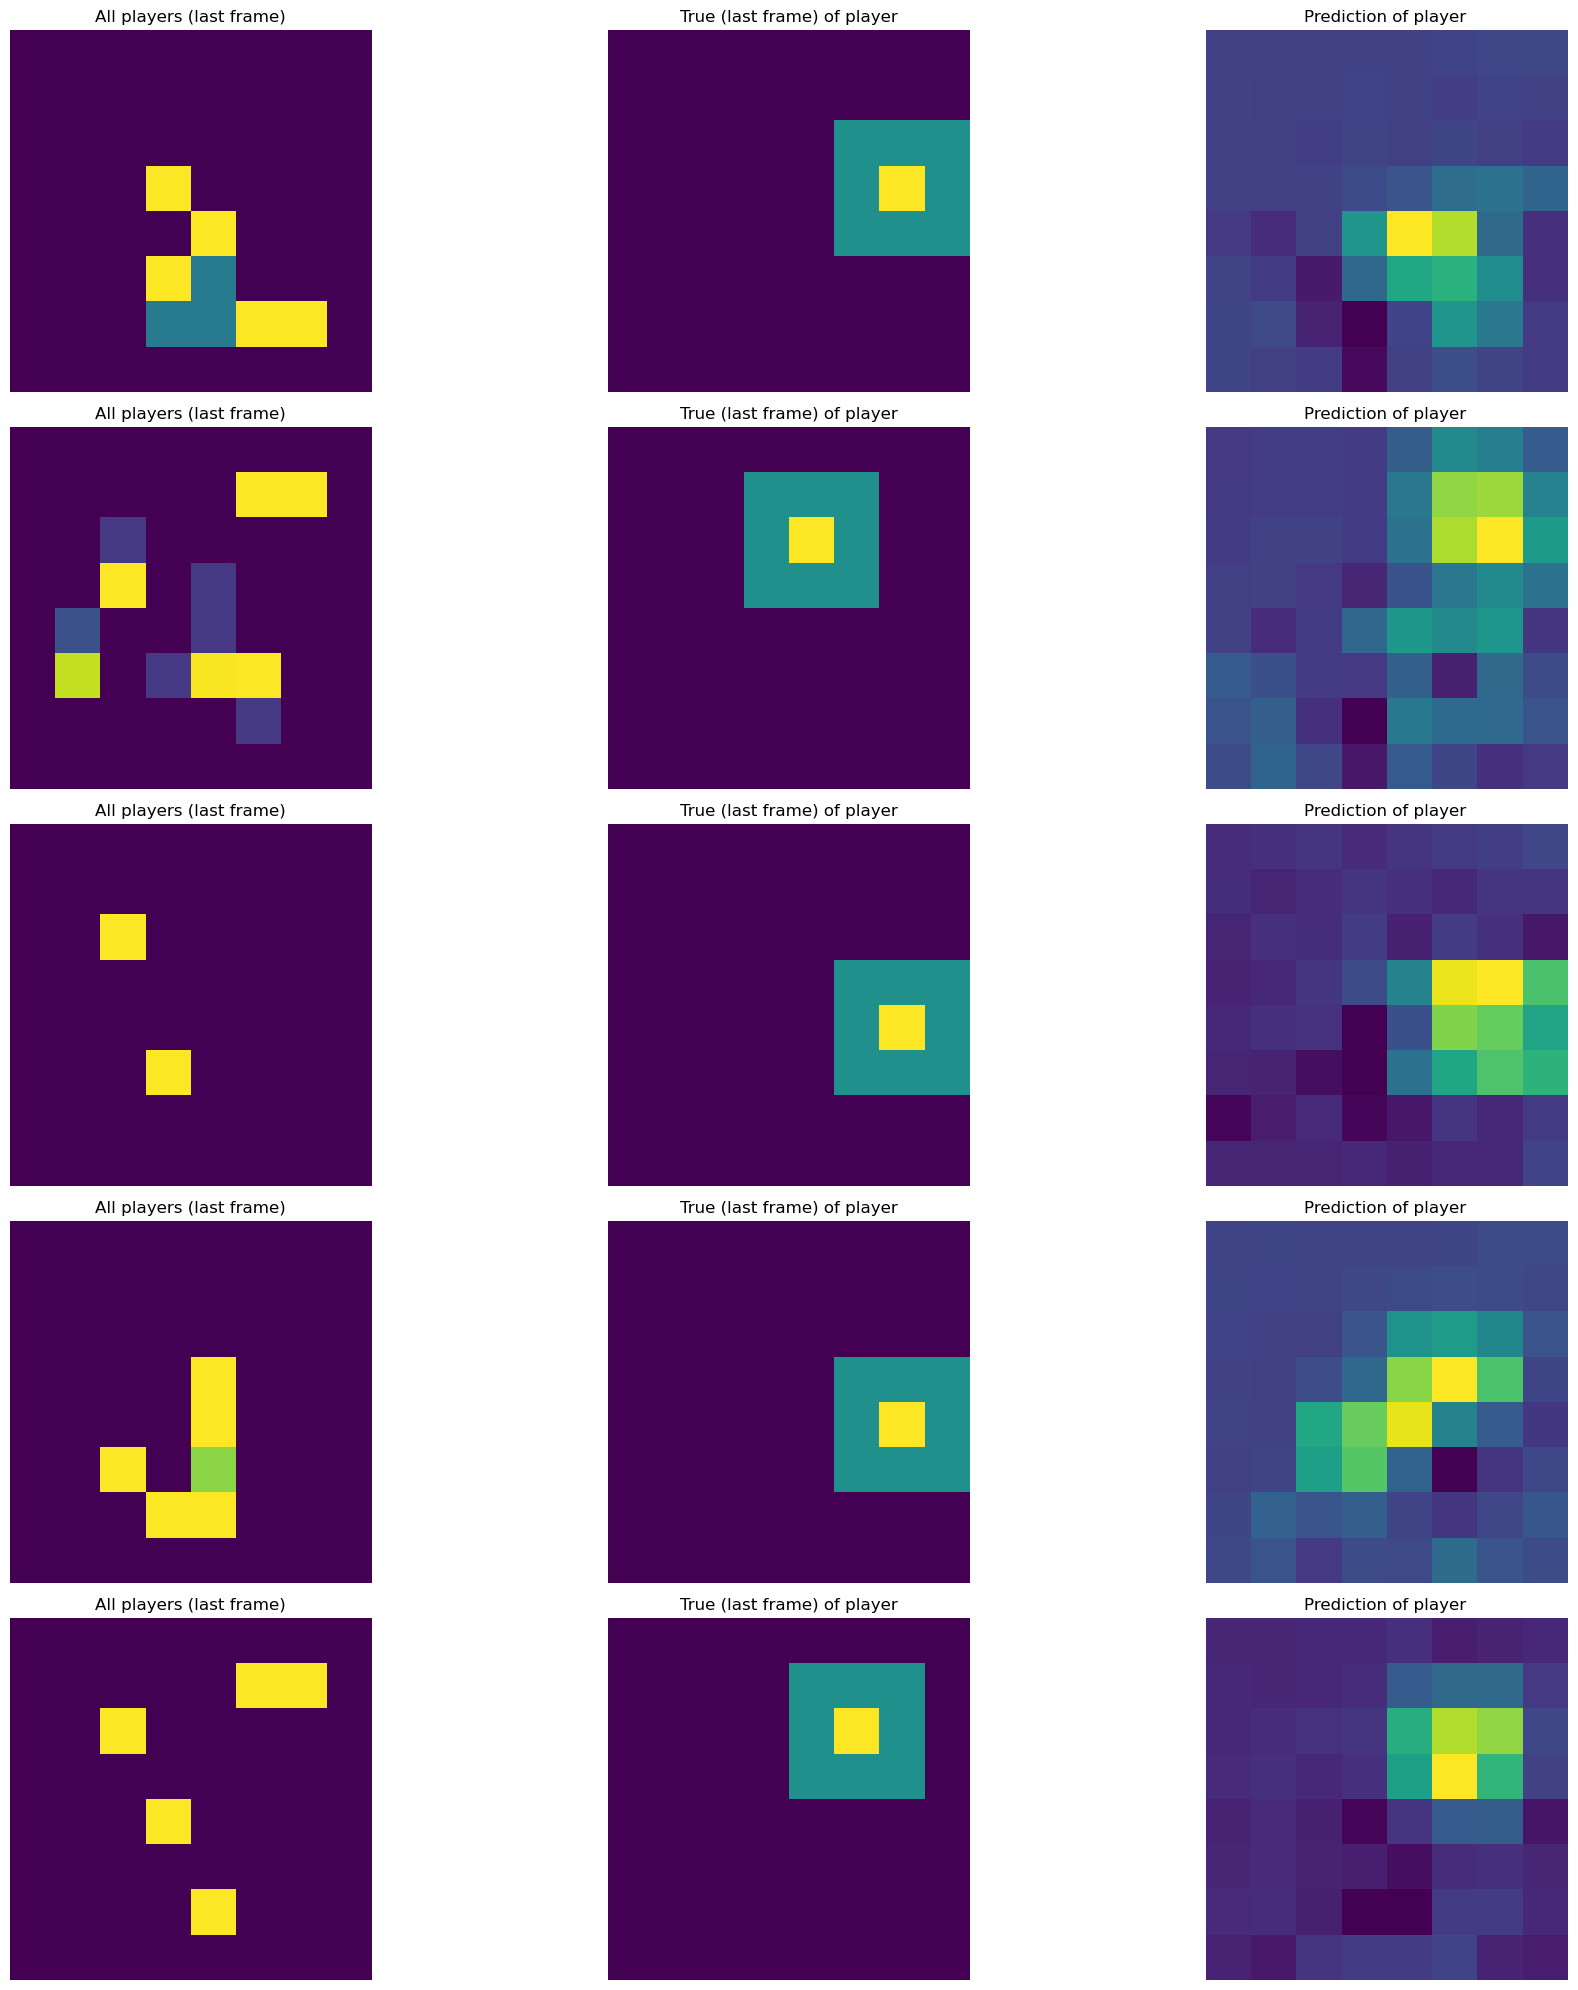

MODELO model1 - ESCENA Scene1
Epoch 1/50
71/71 [==============================] - 4s 29ms/step - loss: 0.0294 - mse: 0.0294 - mae: 0.0955 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1002
Epoch 2/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0254 - mse: 0.0254 - mae: 0.0890 - val_loss: 0.0305 - val_mse: 0.0305 - val_mae: 0.0985
Epoch 3/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0864 - val_loss: 0.0300 - val_mse: 0.0300 - val_mae: 0.0956
Epoch 4/50
71/71 [==============================] - 1s 16ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0837 - val_loss: 0.0303 - val_mse: 0.0303 - val_mae: 0.0961
Epoch 5/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0223 - mse: 0.0223 - mae: 0.0819 - val_loss: 0.0300 - val_mse: 0.0300 - val_mae: 0.0985
Epoch 6/50
71/71 [==============================] - 1s 16ms/step - loss: 0.0215 - mse: 0.0215 - mae: 0.0808 - val_loss: 0.0300 - val_mse: 0.0300 - val_mae:

14/14 [==============================] - 1s 6ms/step


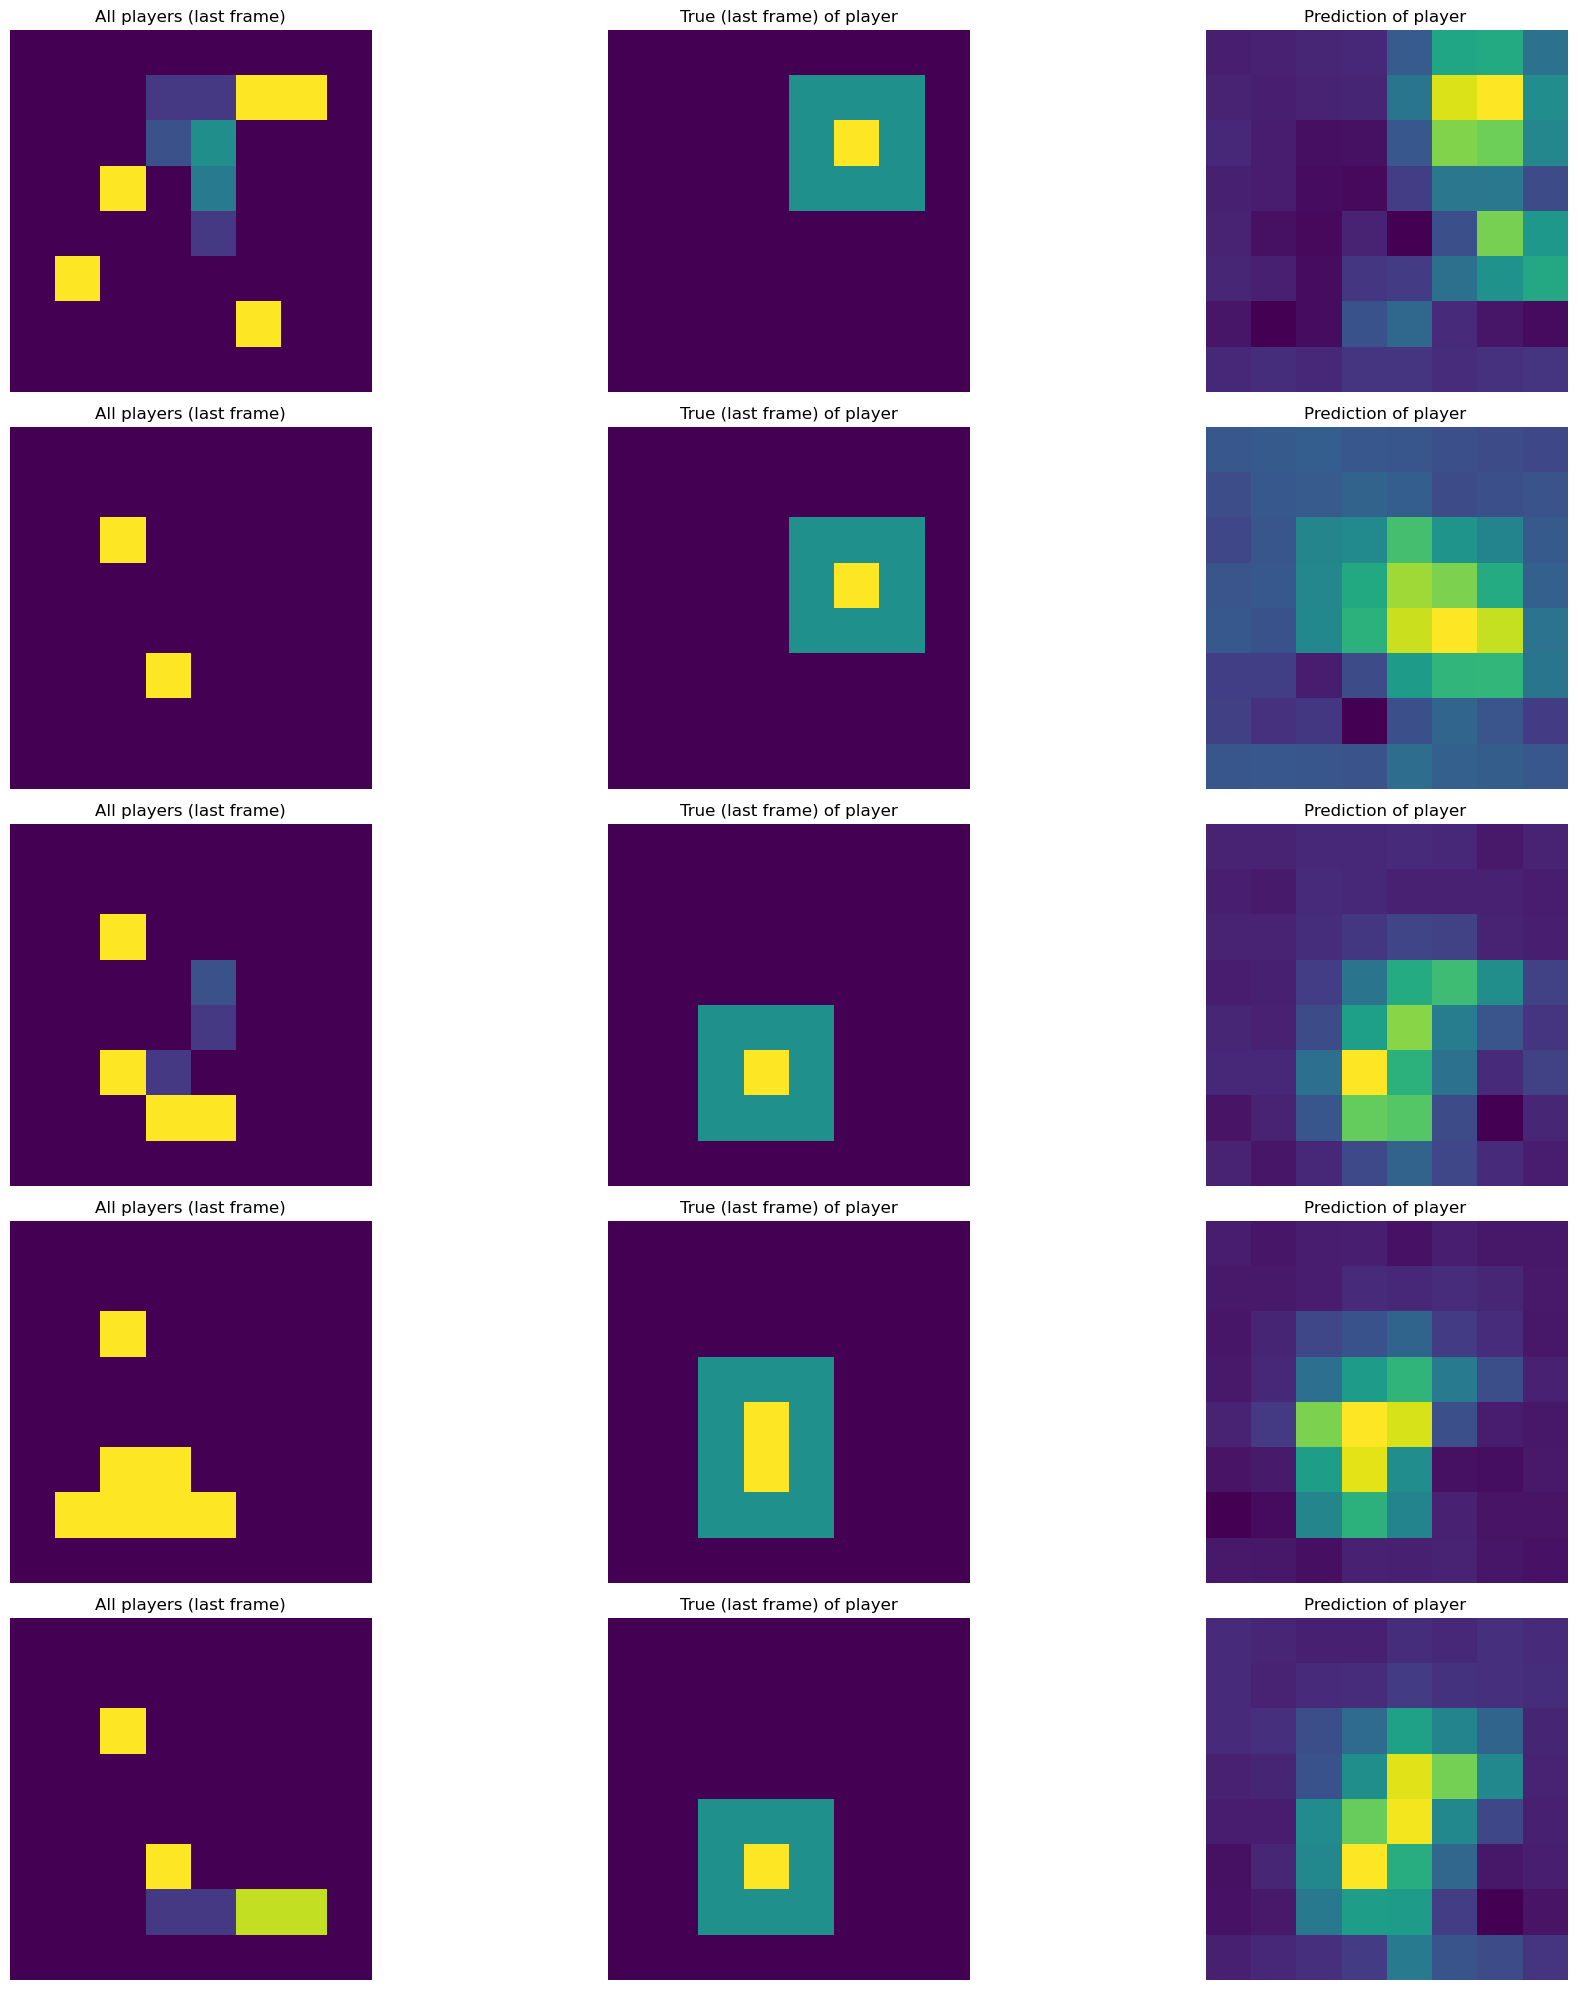

MODELO model2 - ESCENA Scene1
Epoch 1/50
71/71 [==============================] - 5s 50ms/step - loss: 0.0299 - mse: 0.0299 - mae: 0.0963 - val_loss: 0.0306 - val_mse: 0.0306 - val_mae: 0.1018
Epoch 2/50
71/71 [==============================] - 3s 41ms/step - loss: 0.0258 - mse: 0.0258 - mae: 0.0907 - val_loss: 0.0305 - val_mse: 0.0305 - val_mae: 0.0940
Epoch 3/50
71/71 [==============================] - 3s 41ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.0866 - val_loss: 0.0302 - val_mse: 0.0302 - val_mae: 0.0940
Epoch 4/50
71/71 [==============================] - 3s 40ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0835 - val_loss: 0.0311 - val_mse: 0.0311 - val_mae: 0.0953
Epoch 5/50
71/71 [==============================] - 3s 41ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0819 - val_loss: 0.0305 - val_mse: 0.0305 - val_mae: 0.0955
Epoch 6/50
71/71 [==============================] - 3s 40ms/step - loss: 0.0214 - mse: 0.0214 - mae: 0.0797 - val_loss: 0.0301 - val_mse: 0.0301 - val_mae:

14/14 [==============================] - 1s 10ms/step


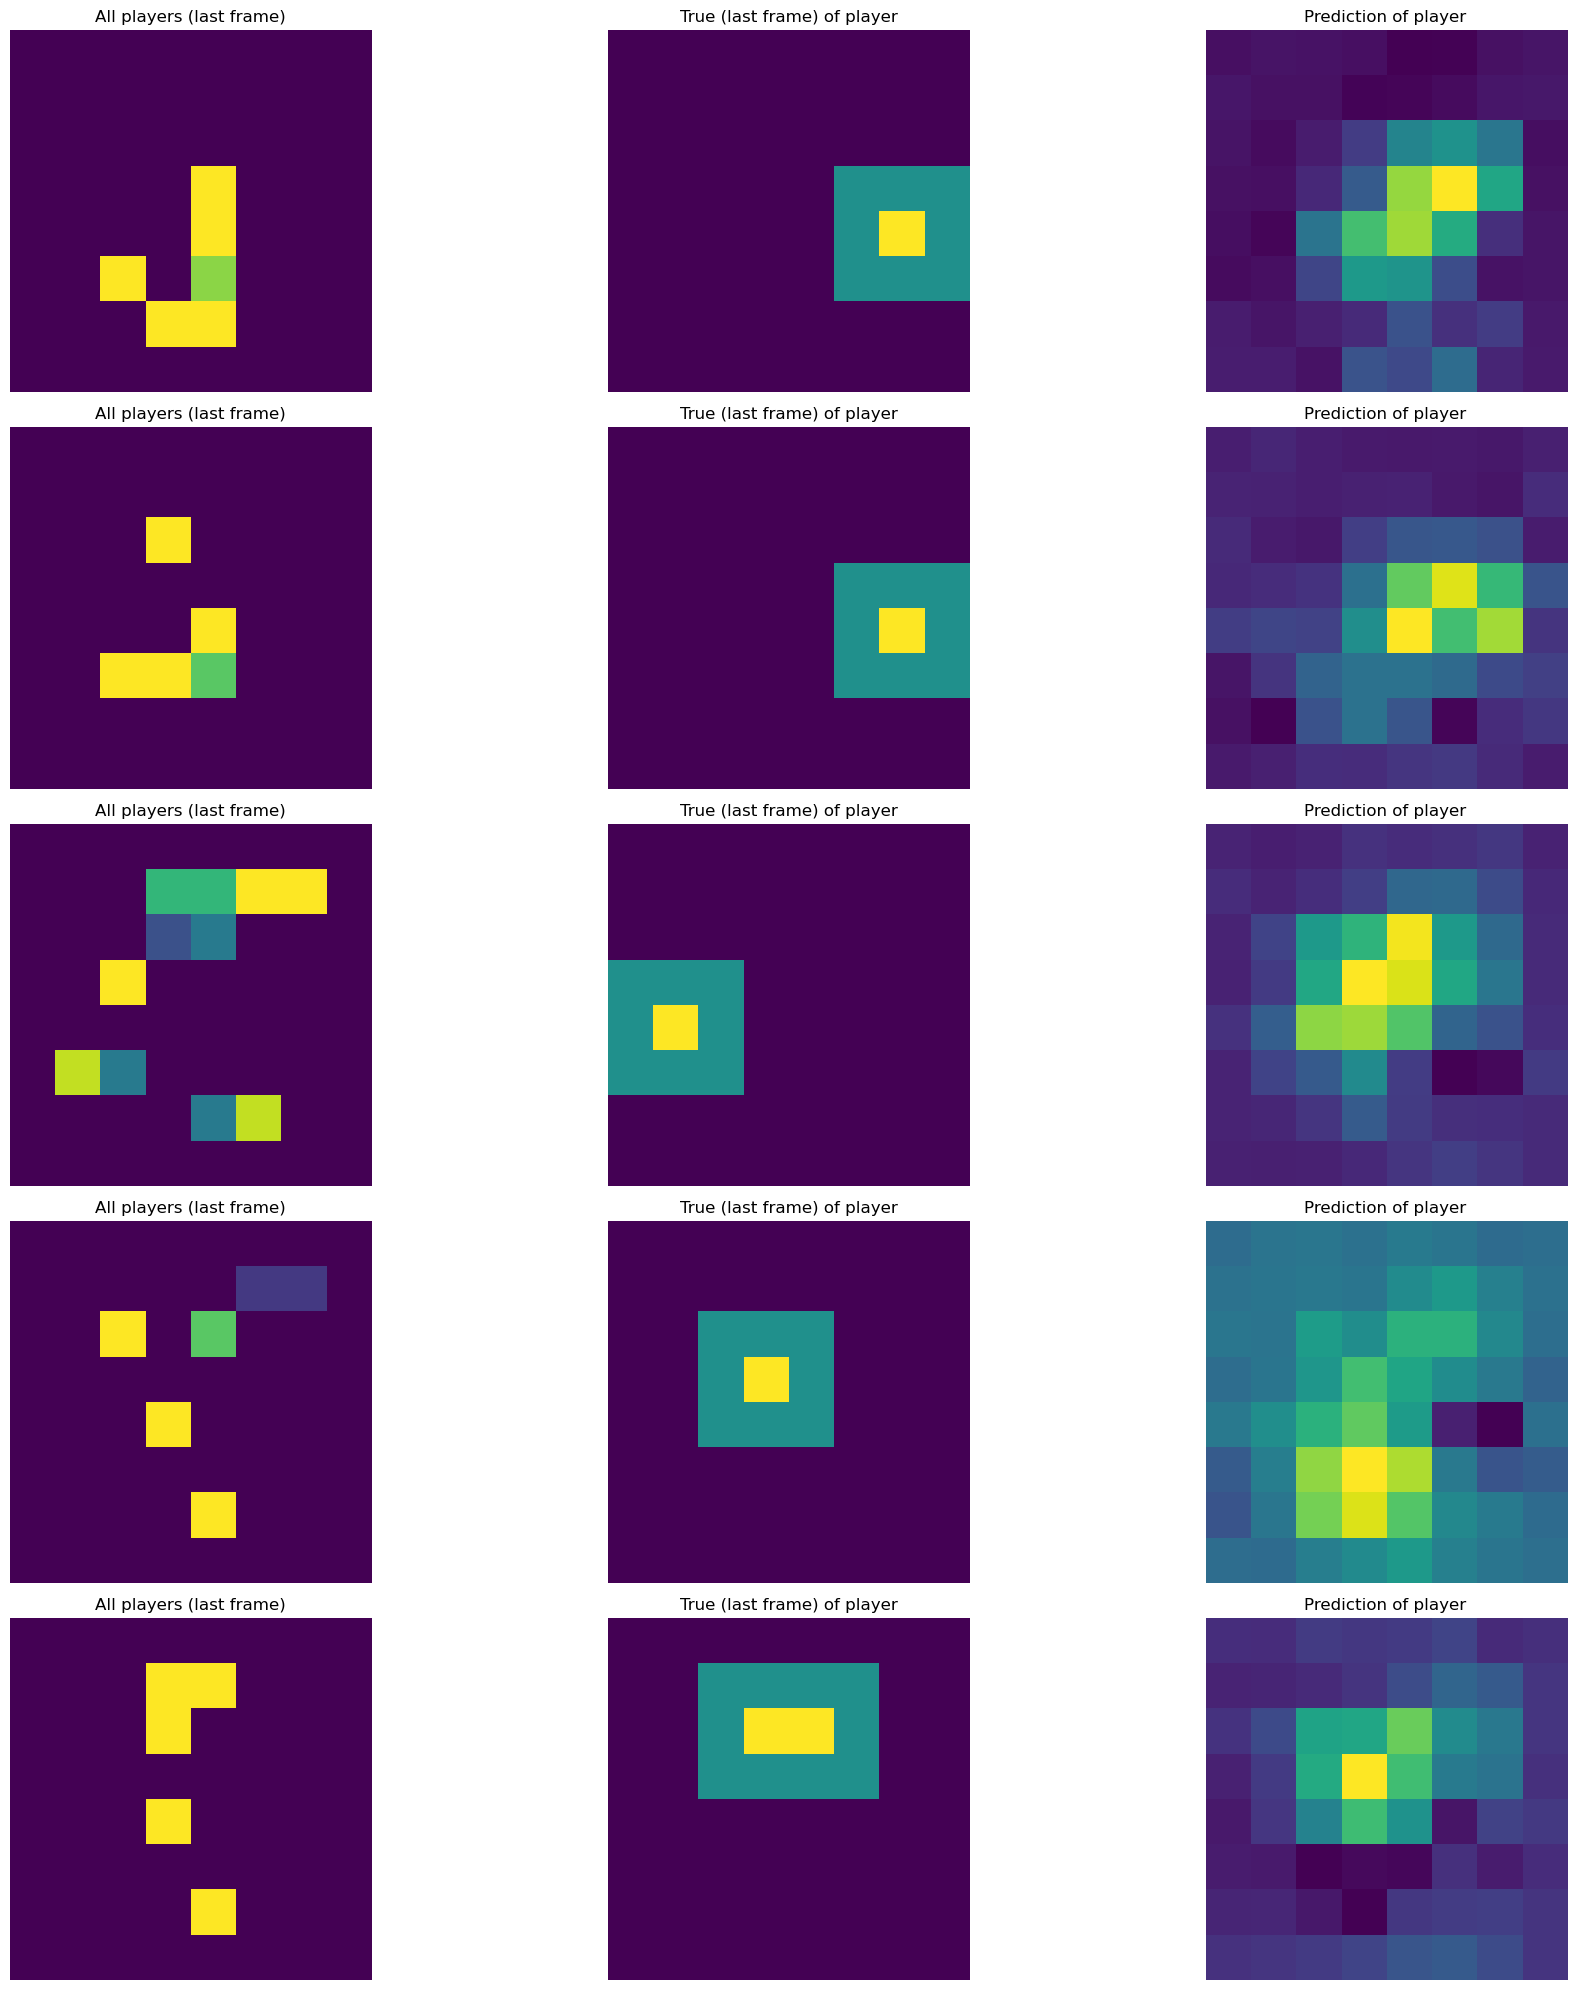

MODELO transf1 - ESCENA Scene1
Epoch 1/50
71/71 [==============================] - 104s 1s/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1096 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.0980
Epoch 2/50
71/71 [==============================] - 101s 1s/step - loss: 0.0265 - mse: 0.0265 - mae: 0.0949 - val_loss: 0.0298 - val_mse: 0.0298 - val_mae: 0.0998
Epoch 3/50
71/71 [==============================] - 101s 1s/step - loss: 0.0250 - mse: 0.0250 - mae: 0.0904 - val_loss: 0.0303 - val_mse: 0.0303 - val_mae: 0.0998
Epoch 4/50
71/71 [==============================] - 101s 1s/step - loss: 0.0234 - mse: 0.0234 - mae: 0.0865 - val_loss: 0.0308 - val_mse: 0.0308 - val_mae: 0.0954
Epoch 5/50
71/71 [==============================] - 101s 1s/step - loss: 0.0228 - mse: 0.0228 - mae: 0.0849 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.0943
Epoch 6/50
71/71 [==============================] - 101s 1s/step - loss: 0.0218 - mse: 0.0218 - mae: 0.0819 - val_loss: 0.0300 - val_mse: 0.0300 - val_mae

14/14 [==============================] - 12s 811ms/step


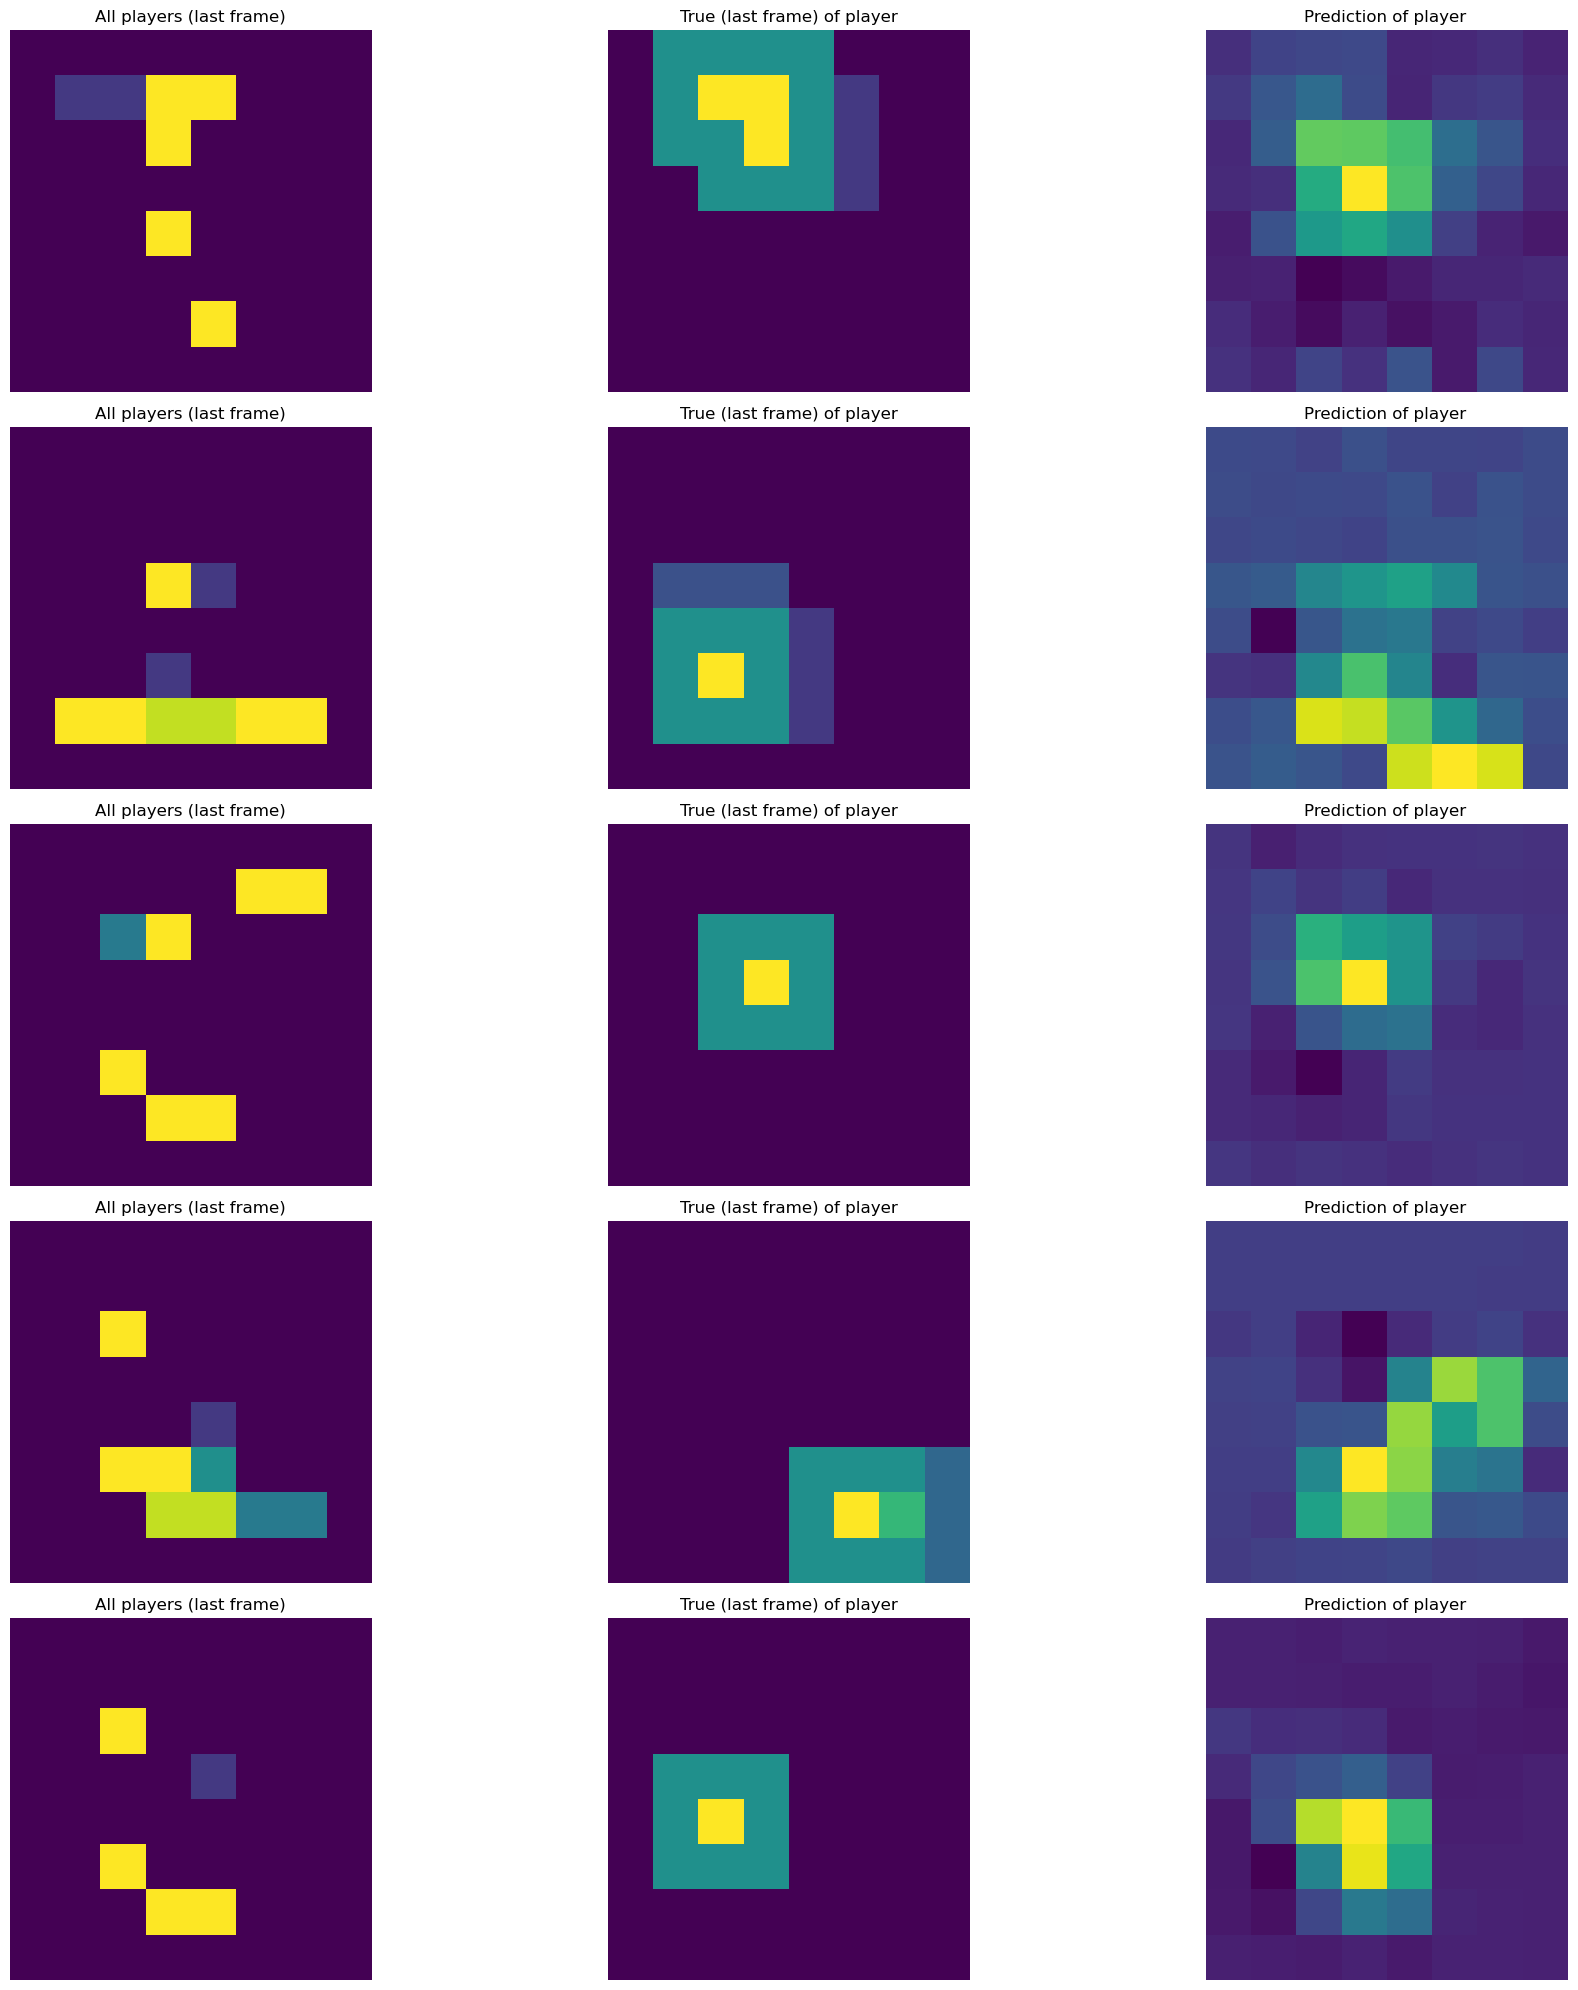

MODELO model0 - ESCENA Scene2
Epoch 1/50
67/67 [==============================] - 14s 129ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1008 - val_loss: 0.0345 - val_mse: 0.0345 - val_mae: 0.1144
Epoch 2/50
67/67 [==============================] - 7s 106ms/step - loss: 0.0290 - mse: 0.0290 - mae: 0.0993 - val_loss: 0.0340 - val_mse: 0.0340 - val_mae: 0.1099
Epoch 3/50
67/67 [==============================] - 7s 104ms/step - loss: 0.0279 - mse: 0.0279 - mae: 0.0949 - val_loss: 0.0328 - val_mse: 0.0328 - val_mae: 0.1037
Epoch 4/50
67/67 [==============================] - 7s 103ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.0930 - val_loss: 0.0341 - val_mse: 0.0341 - val_mae: 0.1070
Epoch 5/50
67/67 [==============================] - 7s 102ms/step - loss: 0.0262 - mse: 0.0262 - mae: 0.0911 - val_loss: 0.0352 - val_mse: 0.0352 - val_mae: 0.1090
Epoch 6/50
67/67 [==============================] - 7s 102ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.0863 - val_loss: 0.0339 - val_mse: 0.0339 - v

16/16 [==============================] - 2s 62ms/step


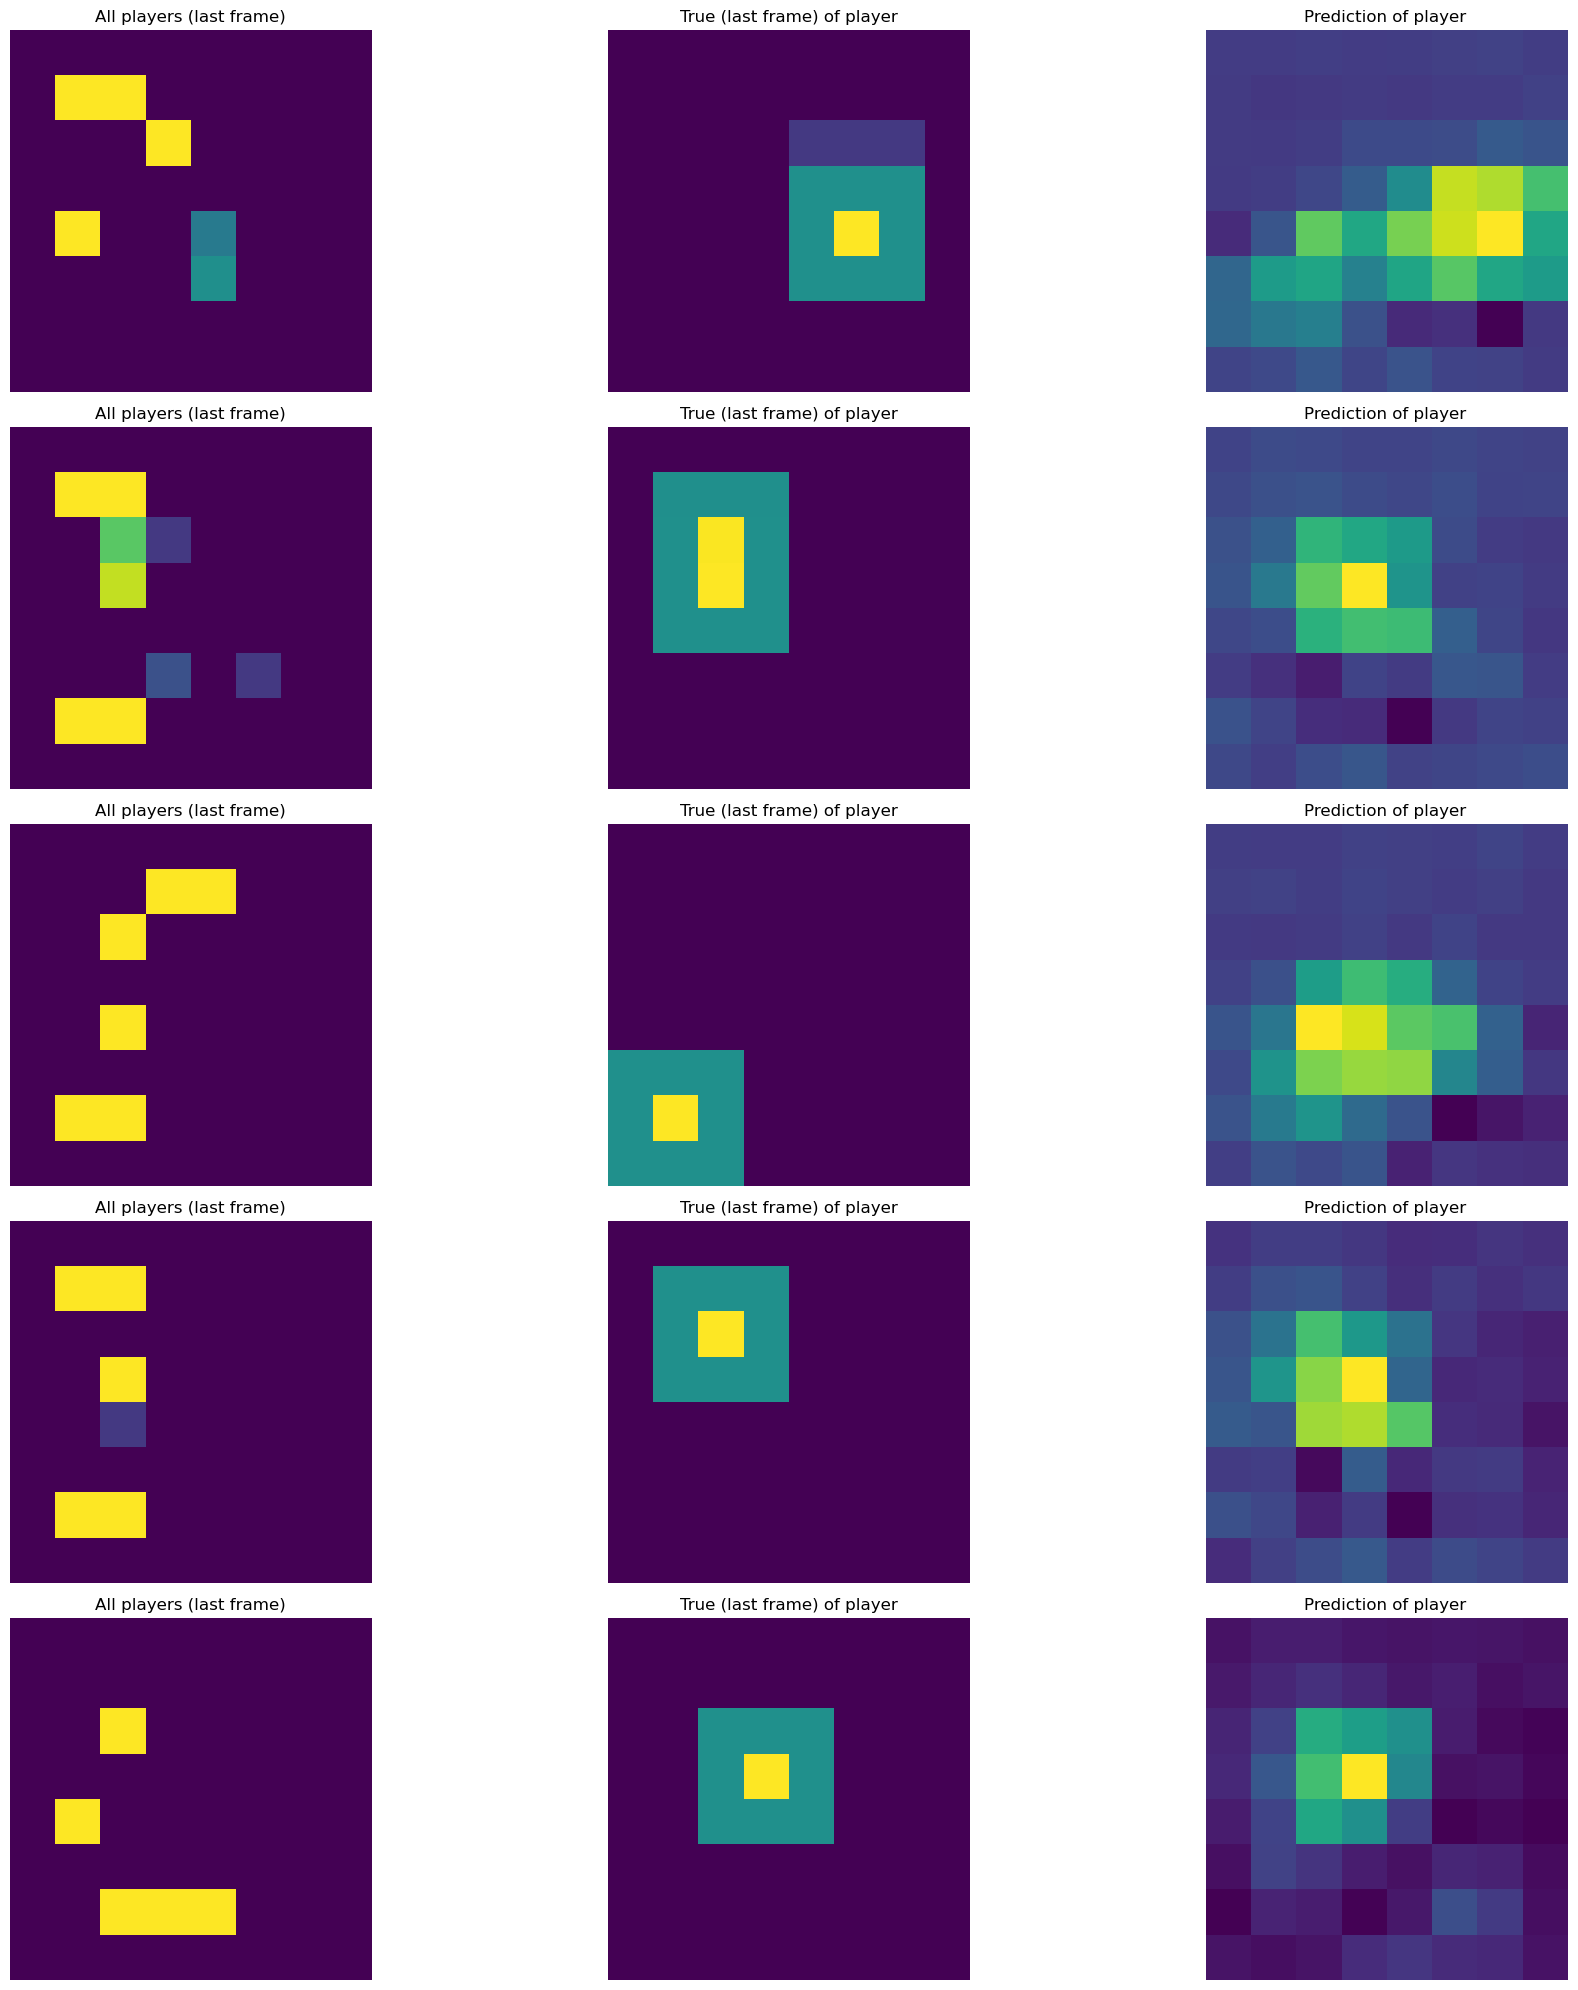

MODELO model1 - ESCENA Scene2
Epoch 1/50
67/67 [==============================] - 9s 105ms/step - loss: 0.0296 - mse: 0.0296 - mae: 0.0944 - val_loss: 0.0336 - val_mse: 0.0336 - val_mae: 0.1050
Epoch 2/50
67/67 [==============================] - 6s 90ms/step - loss: 0.0258 - mse: 0.0258 - mae: 0.0897 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.0979
Epoch 3/50
67/67 [==============================] - 6s 93ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.0856 - val_loss: 0.0345 - val_mse: 0.0345 - val_mae: 0.1007
Epoch 4/50
67/67 [==============================] - 6s 90ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0829 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1018
Epoch 5/50
67/67 [==============================] - 6s 90ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.0814 - val_loss: 0.0332 - val_mse: 0.0332 - val_mae: 0.1018
Epoch 6/50
67/67 [==============================] - 6s 90ms/step - loss: 0.0212 - mse: 0.0212 - mae: 0.0787 - val_loss: 0.0343 - val_mse: 0.0343 - val_mae

16/16 [==============================] - 1s 21ms/step


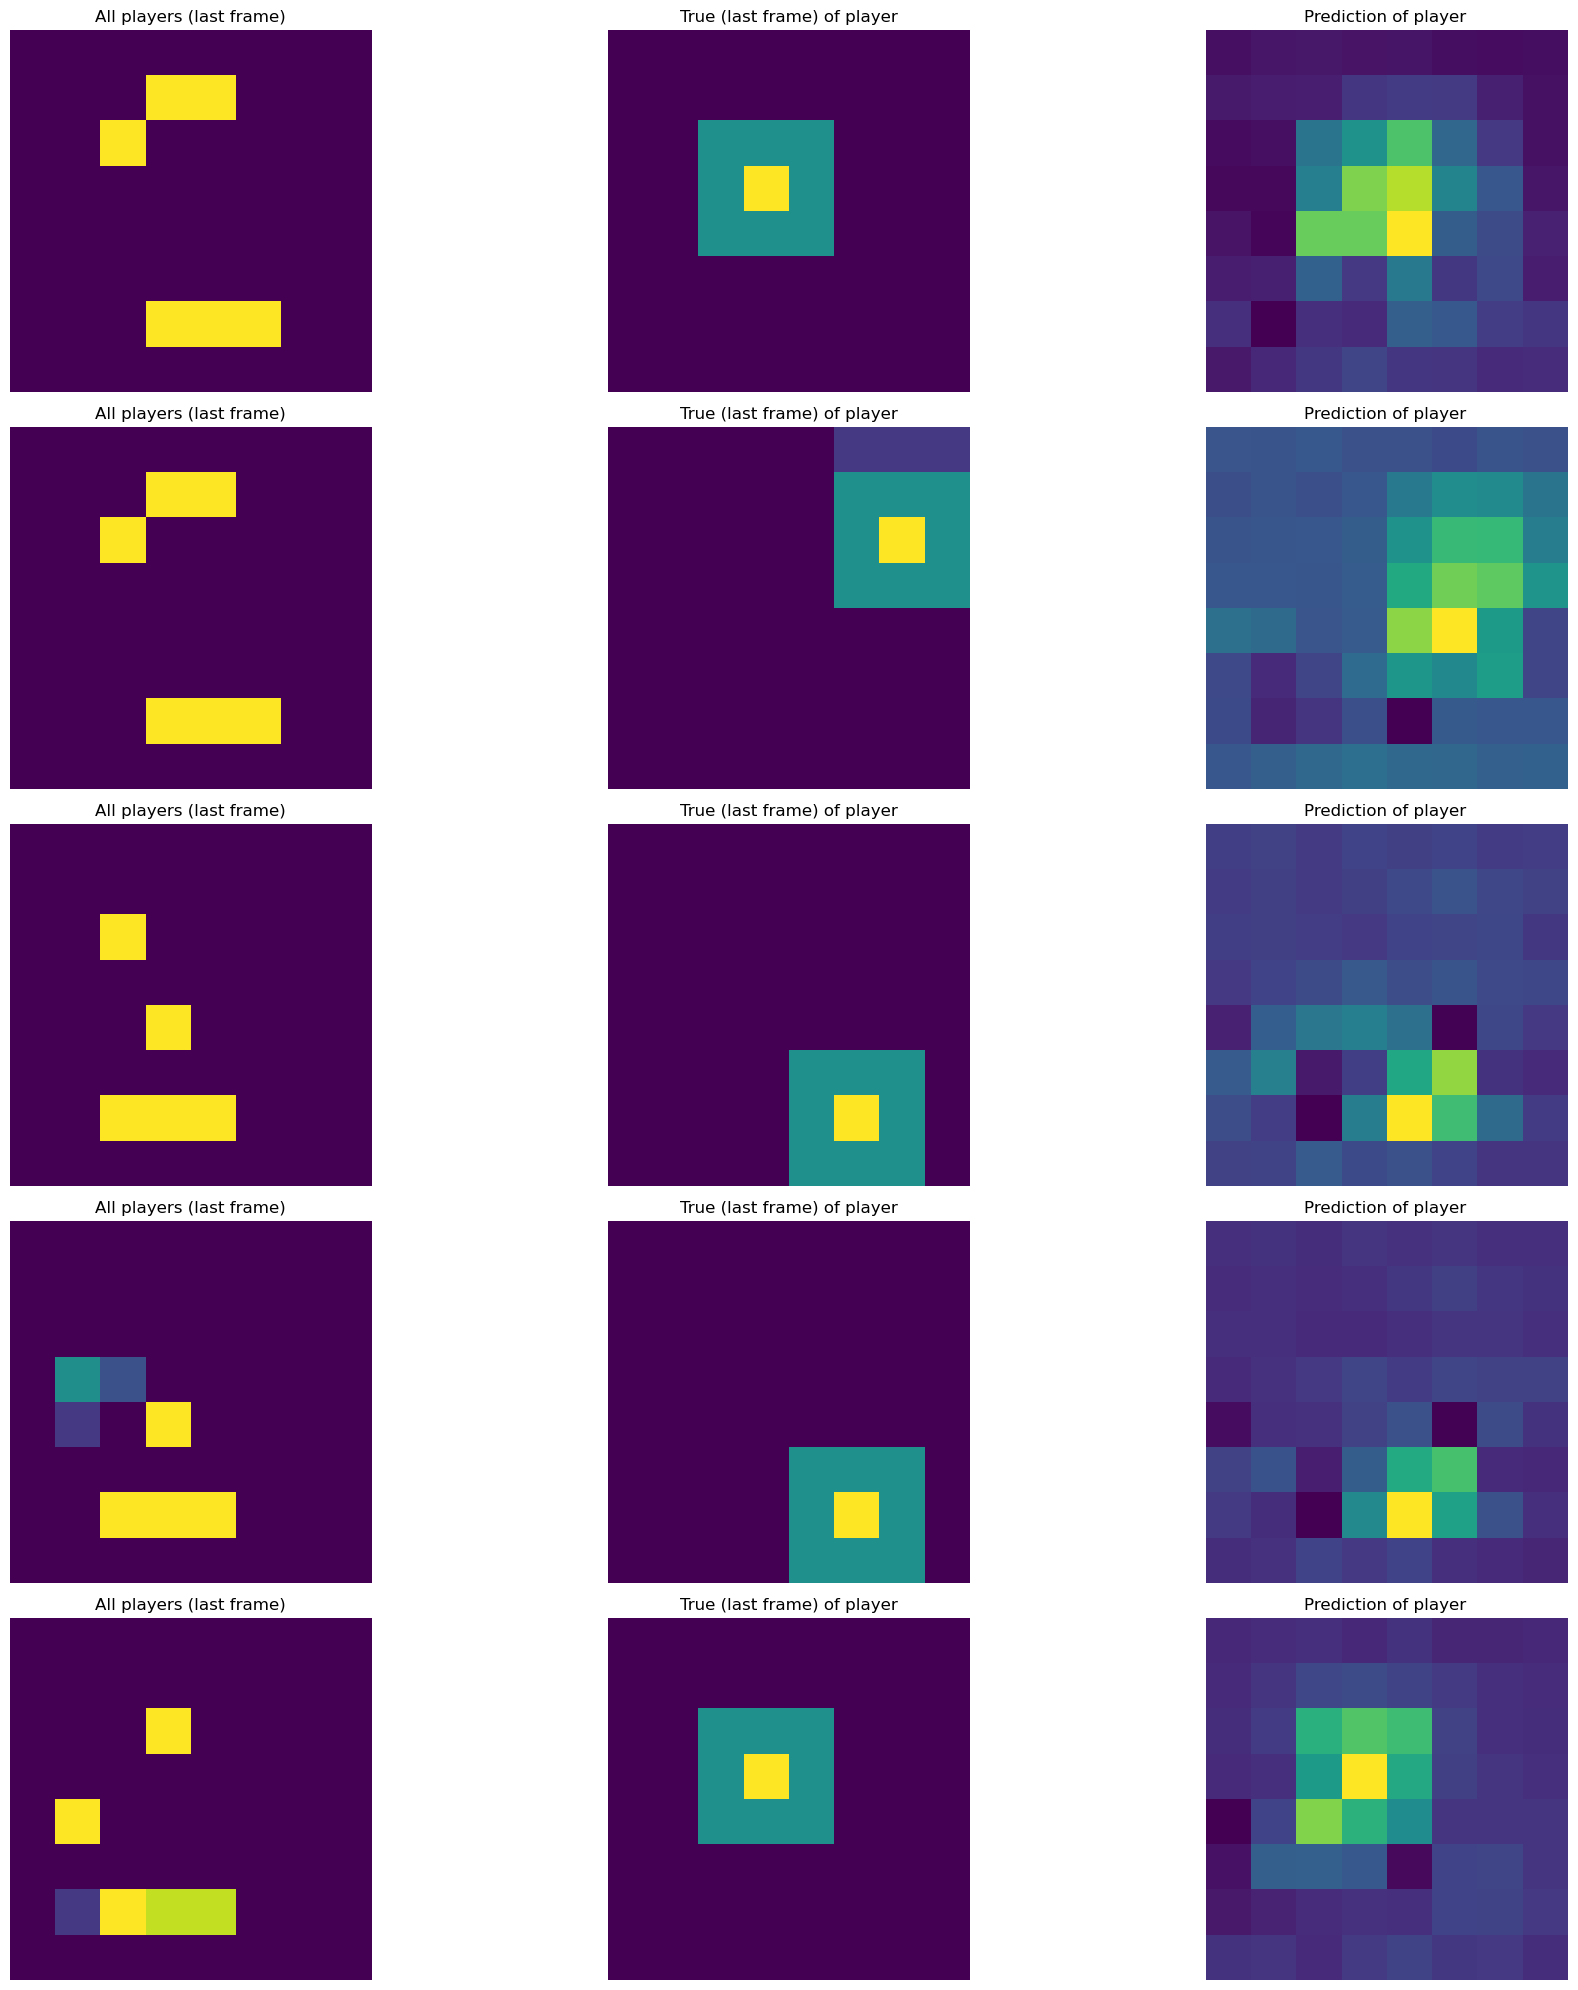

MODELO model2 - ESCENA Scene2
Epoch 1/50
67/67 [==============================] - 14s 179ms/step - loss: 0.0301 - mse: 0.0301 - mae: 0.0955 - val_loss: 0.0335 - val_mse: 0.0335 - val_mae: 0.1034
Epoch 2/50
67/67 [==============================] - 11s 170ms/step - loss: 0.0261 - mse: 0.0261 - mae: 0.0901 - val_loss: 0.0316 - val_mse: 0.0316 - val_mae: 0.0978
Epoch 3/50
67/67 [==============================] - 11s 169ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.0857 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1005
Epoch 4/50
67/67 [==============================] - 11s 170ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0827 - val_loss: 0.0315 - val_mse: 0.0315 - val_mae: 0.0978
Epoch 5/50
67/67 [==============================] - 11s 169ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0806 - val_loss: 0.0312 - val_mse: 0.0312 - val_mae: 0.0949
Epoch 6/50
67/67 [==============================] - 11s 170ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.0785 - val_loss: 0.0314 - val_mse: 0.031

16/16 [==============================] - 2s 72ms/step


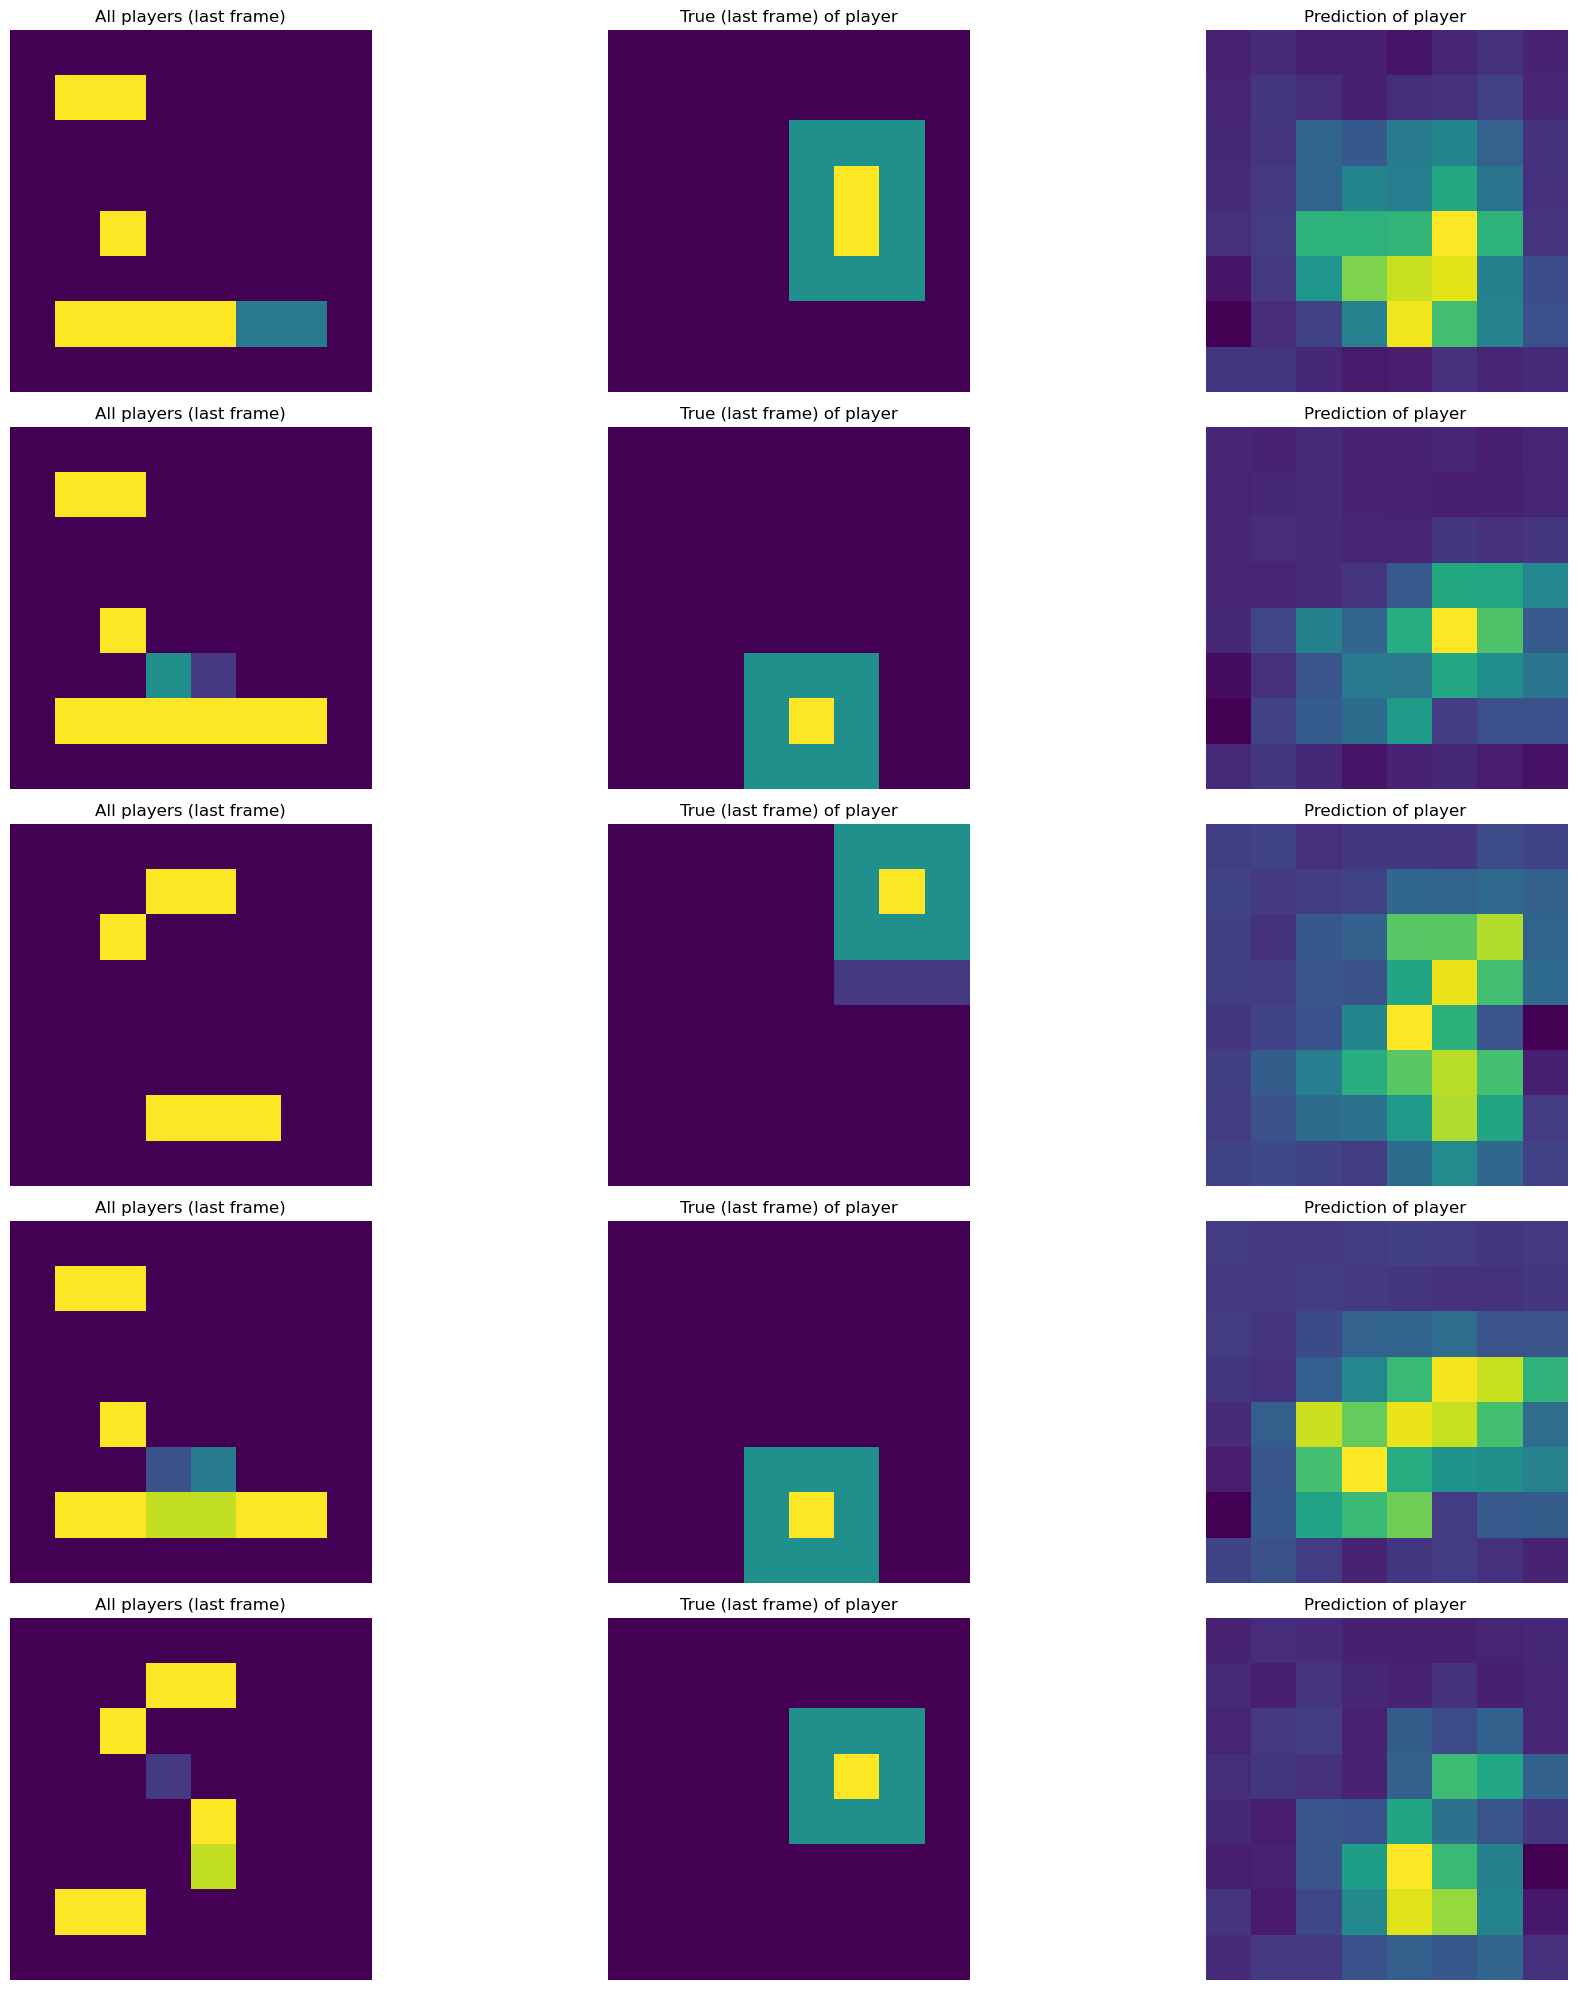

MODELO transf1 - ESCENA Scene2
Epoch 1/50
67/67 [==============================] - 110s 2s/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1081 - val_loss: 0.0328 - val_mse: 0.0328 - val_mae: 0.1048
Epoch 2/50
67/67 [==============================] - 107s 2s/step - loss: 0.0263 - mse: 0.0263 - mae: 0.0933 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.0971
Epoch 3/50
67/67 [==============================] - 107s 2s/step - loss: 0.0248 - mse: 0.0248 - mae: 0.0890 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1007
Epoch 4/50
67/67 [==============================] - 107s 2s/step - loss: 0.0235 - mse: 0.0235 - mae: 0.0858 - val_loss: 0.0331 - val_mse: 0.0331 - val_mae: 0.1006
Epoch 5/50
67/67 [==============================] - 107s 2s/step - loss: 0.0223 - mse: 0.0223 - mae: 0.0823 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.0978
Epoch 6/50
67/67 [==============================] - 107s 2s/step - loss: 0.0217 - mse: 0.0217 - mae: 0.0807 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae

16/16 [==============================] - 15s 924ms/step


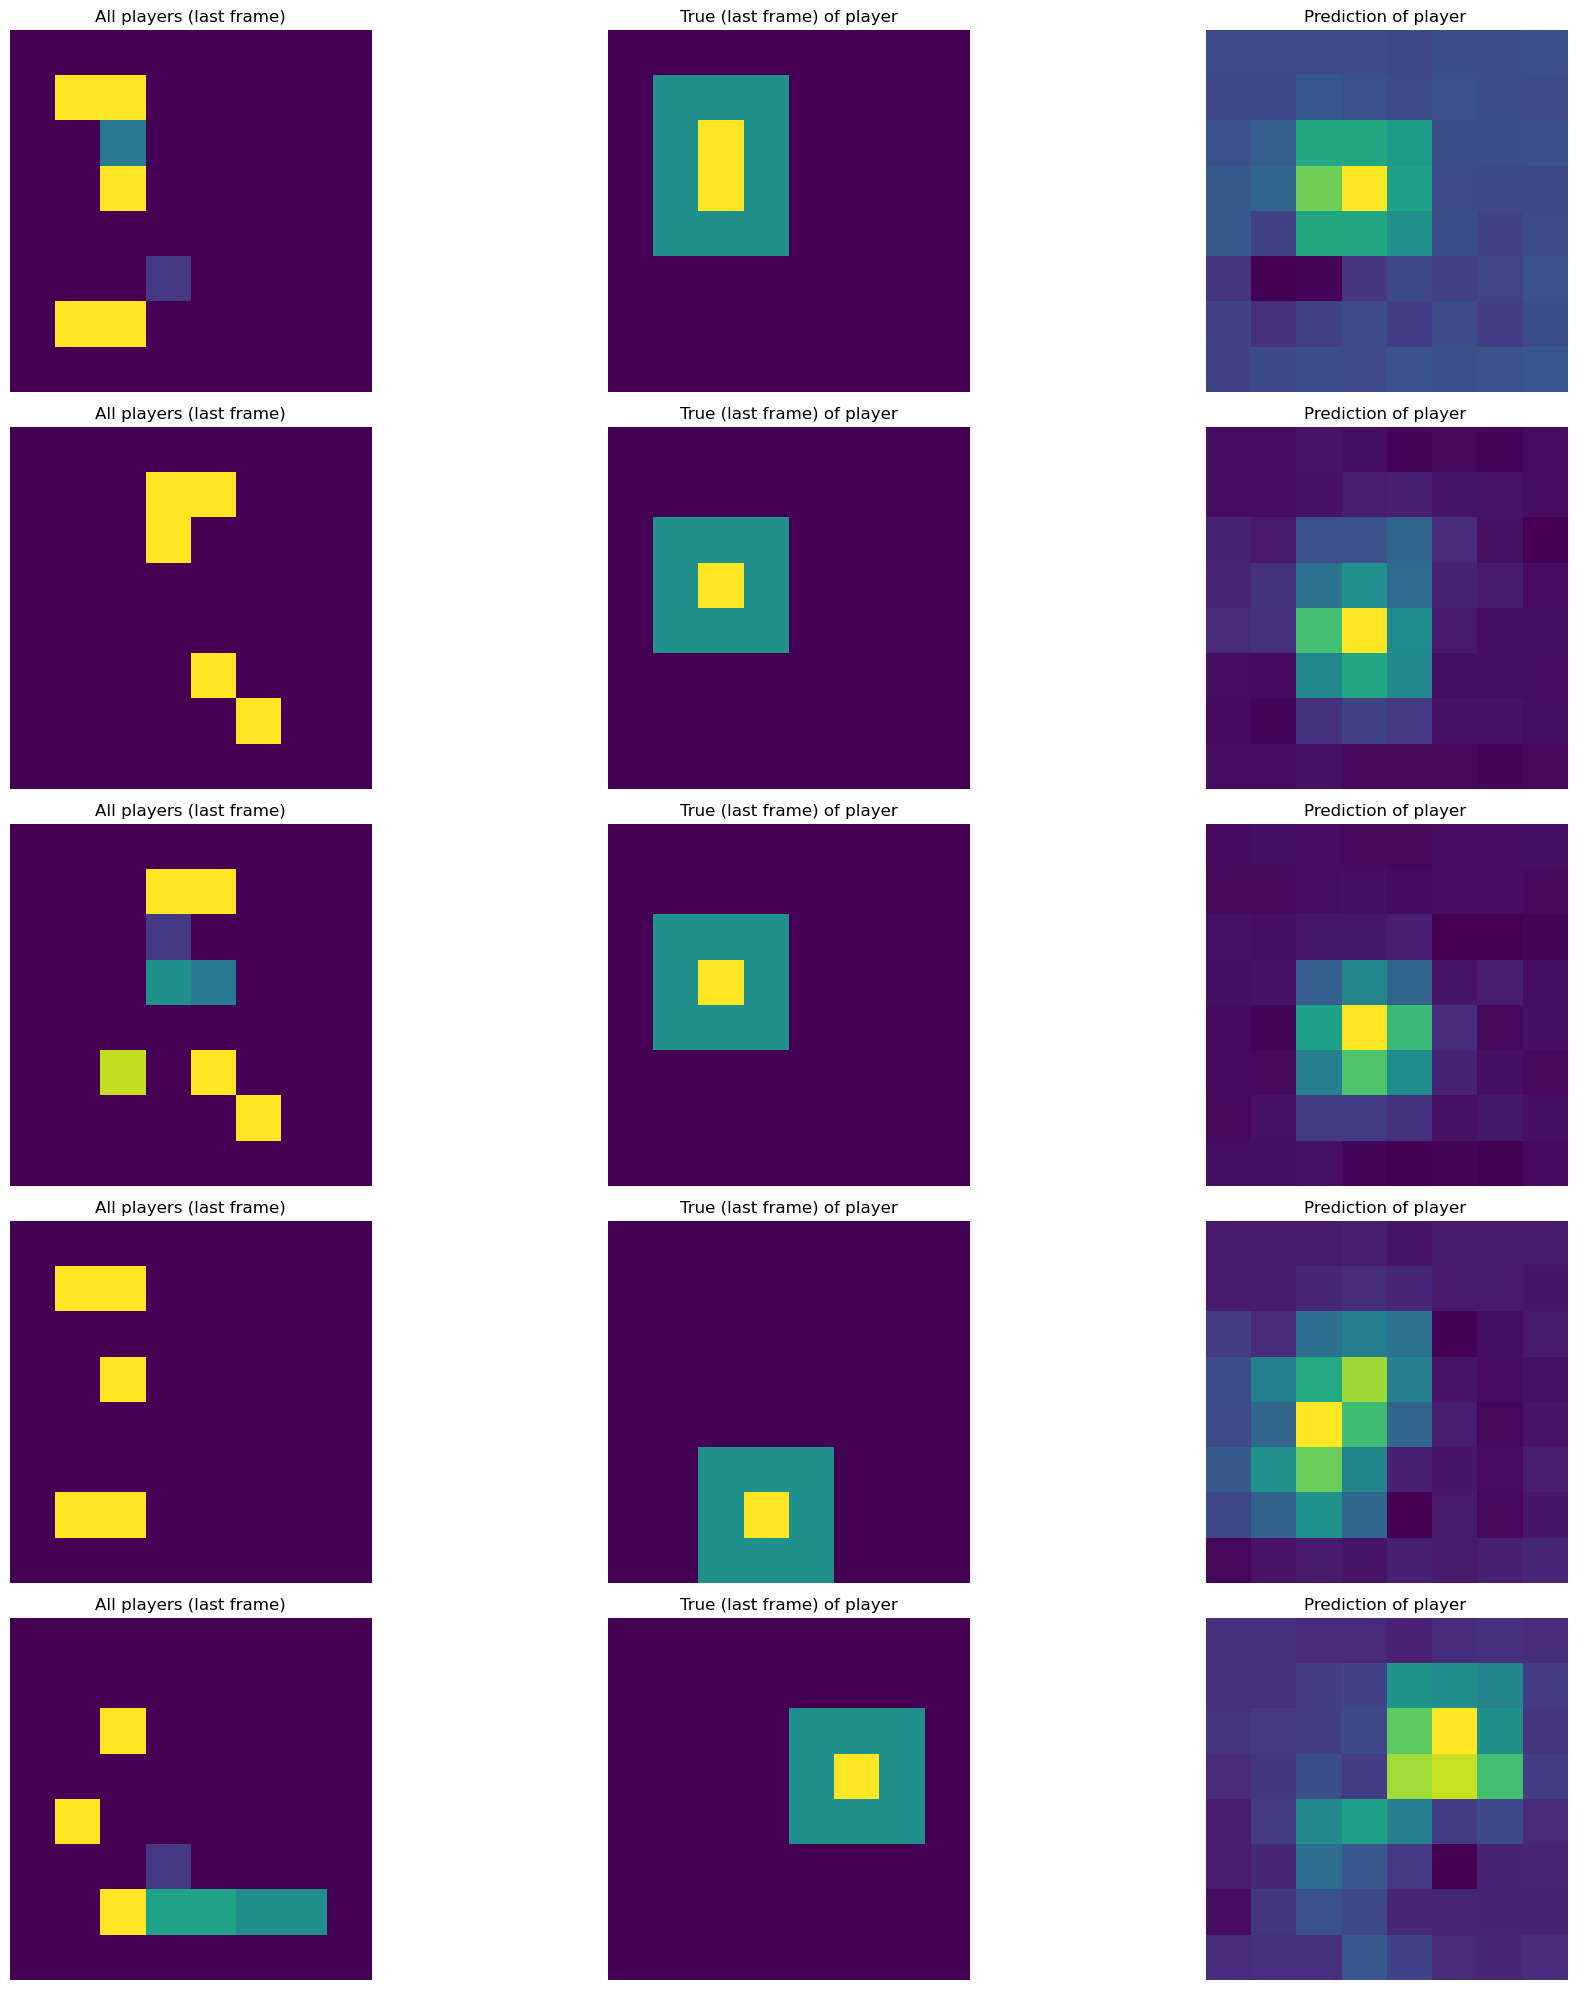

MODELO model0 - ESCENA Scene3
Epoch 1/50
81/81 [==============================] - 20s 177ms/step - loss: 0.0337 - mse: 0.0337 - mae: 0.1058 - val_loss: 0.0264 - val_mse: 0.0264 - val_mae: 0.0969
Epoch 2/50
81/81 [==============================] - 13s 167ms/step - loss: 0.0310 - mse: 0.0310 - mae: 0.1052 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.0947
Epoch 3/50
81/81 [==============================] - 14s 167ms/step - loss: 0.0300 - mse: 0.0300 - mae: 0.1015 - val_loss: 0.0260 - val_mse: 0.0260 - val_mae: 0.0925
Epoch 4/50
81/81 [==============================] - 13s 167ms/step - loss: 0.0292 - mse: 0.0292 - mae: 0.0996 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.0959
Epoch 5/50
81/81 [==============================] - 14s 167ms/step - loss: 0.0288 - mse: 0.0288 - mae: 0.0985 - val_loss: 0.0257 - val_mse: 0.0257 - val_mae: 0.0887
Epoch 6/50
81/81 [==============================] - 13s 167ms/step - loss: 0.0279 - mse: 0.0279 - mae: 0.0965 - val_loss: 0.0244 - val_mse: 0.024

9/9 [==============================] - 1s 70ms/step


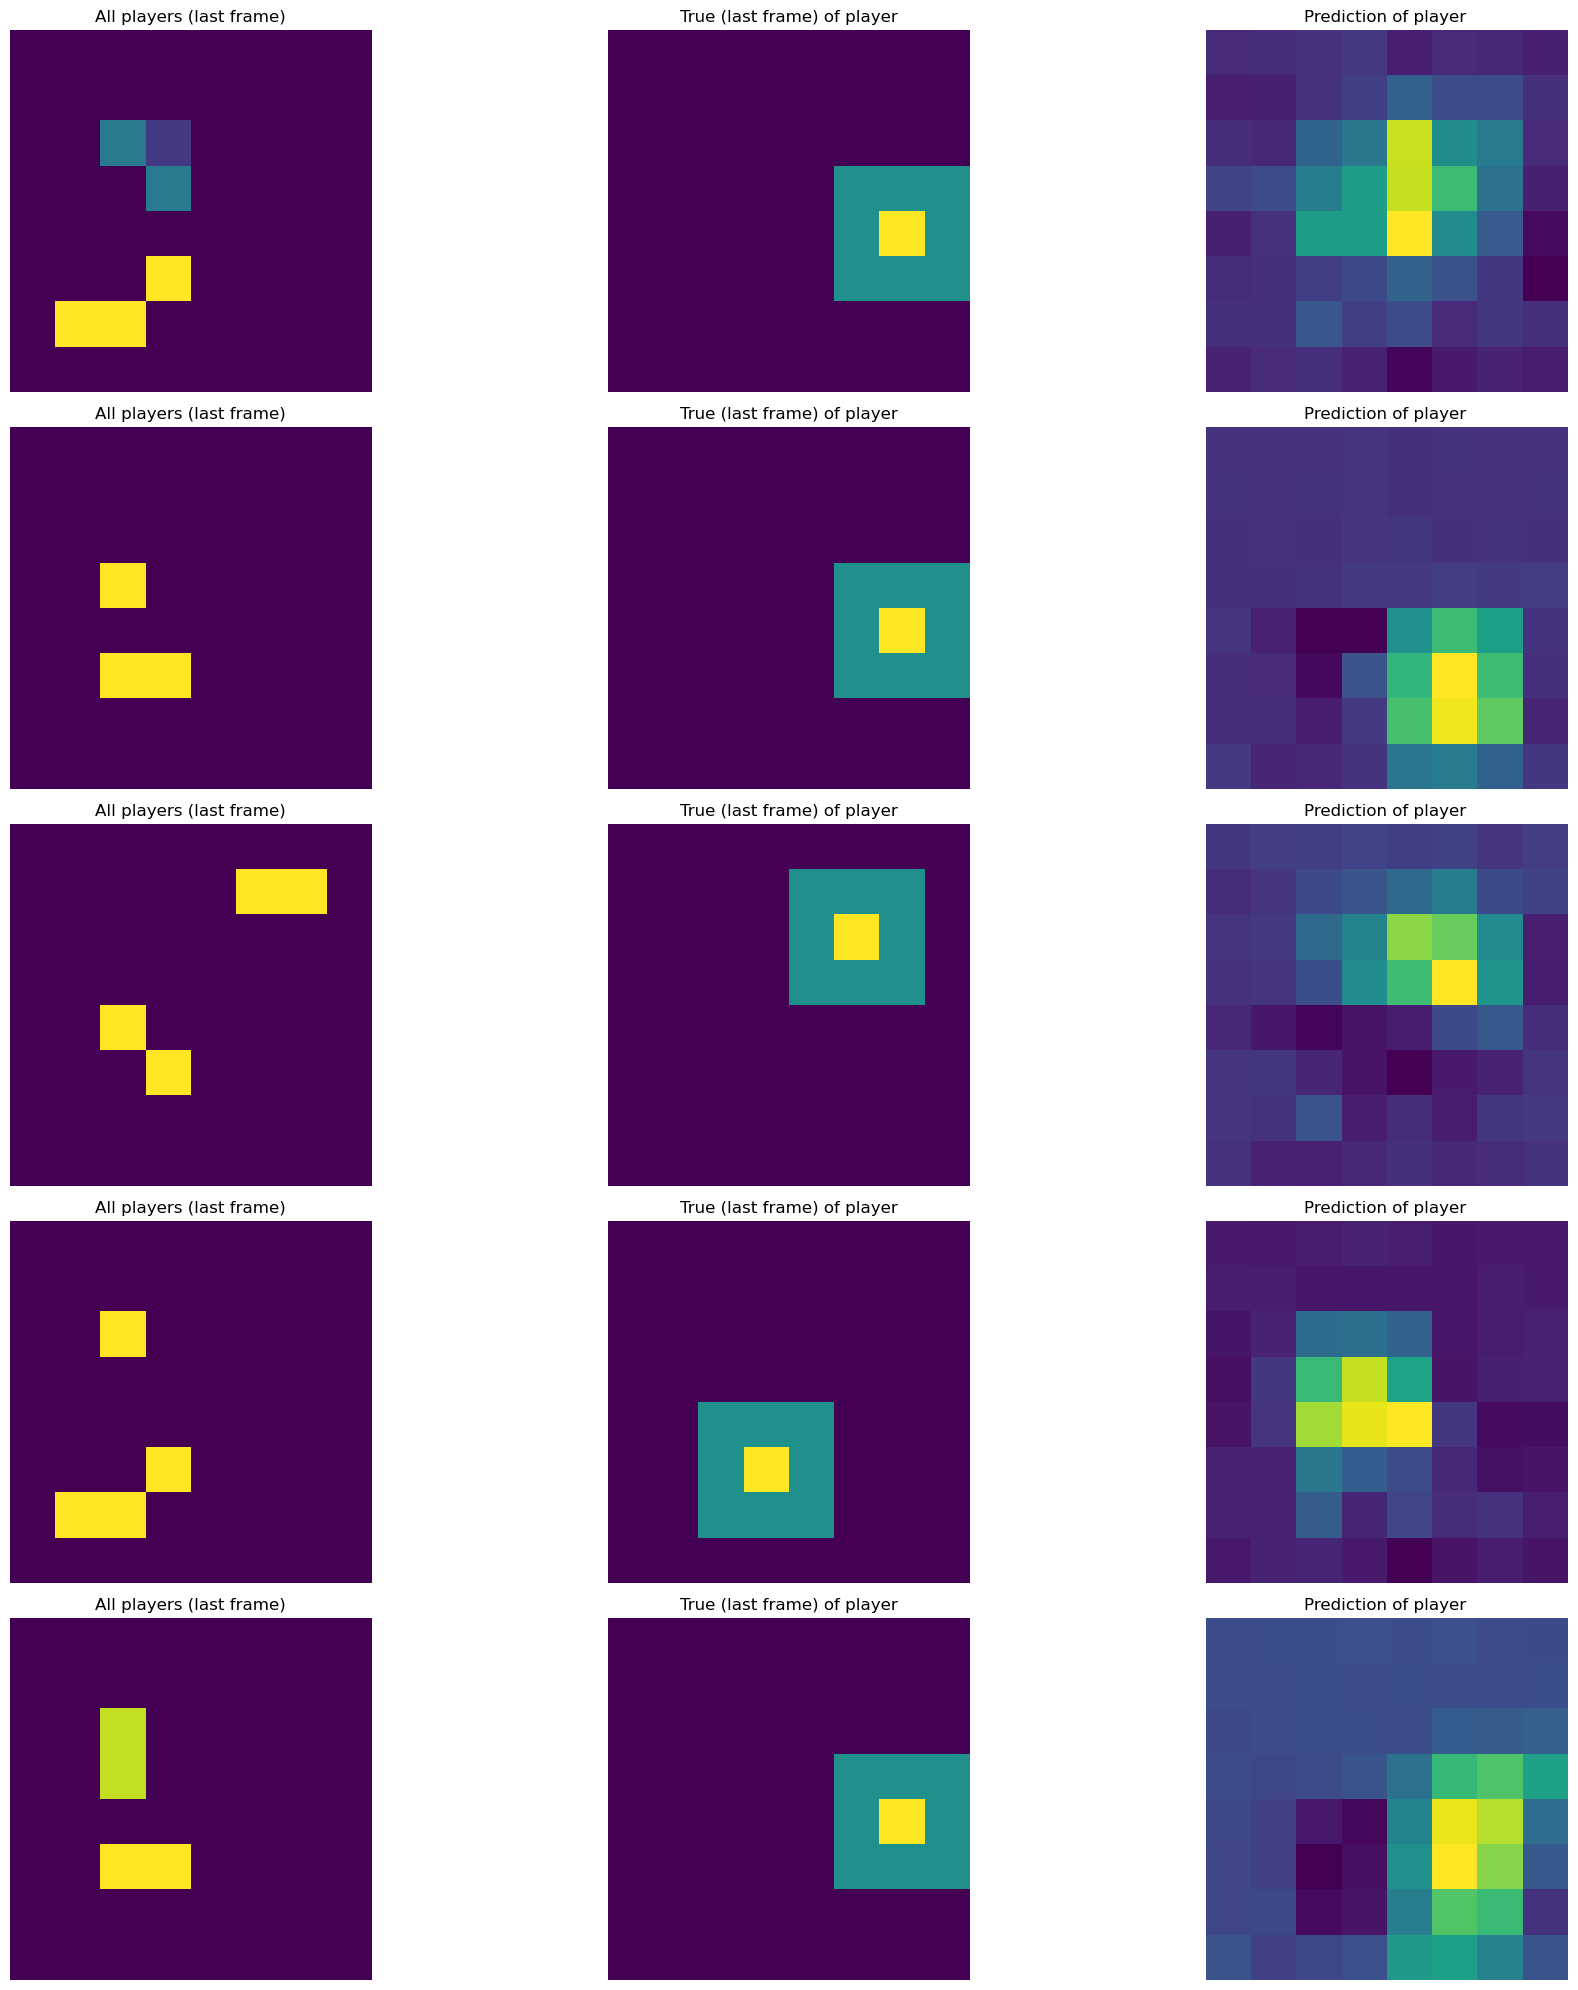

MODELO model1 - ESCENA Scene3
Epoch 1/50
81/81 [==============================] - 11s 119ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1003 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.0935
Epoch 2/50
81/81 [==============================] - 9s 110ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.0937 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.0853
Epoch 3/50
81/81 [==============================] - 9s 110ms/step - loss: 0.0257 - mse: 0.0257 - mae: 0.0899 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.0875
Epoch 4/50
81/81 [==============================] - 9s 110ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.0879 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.0864
Epoch 5/50
81/81 [==============================] - 9s 111ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.0846 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.0891
Epoch 6/50
81/81 [==============================] - 9s 110ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0833 - val_loss: 0.0237 - val_mse: 0.0237 - v

9/9 [==============================] - 1s 25ms/step


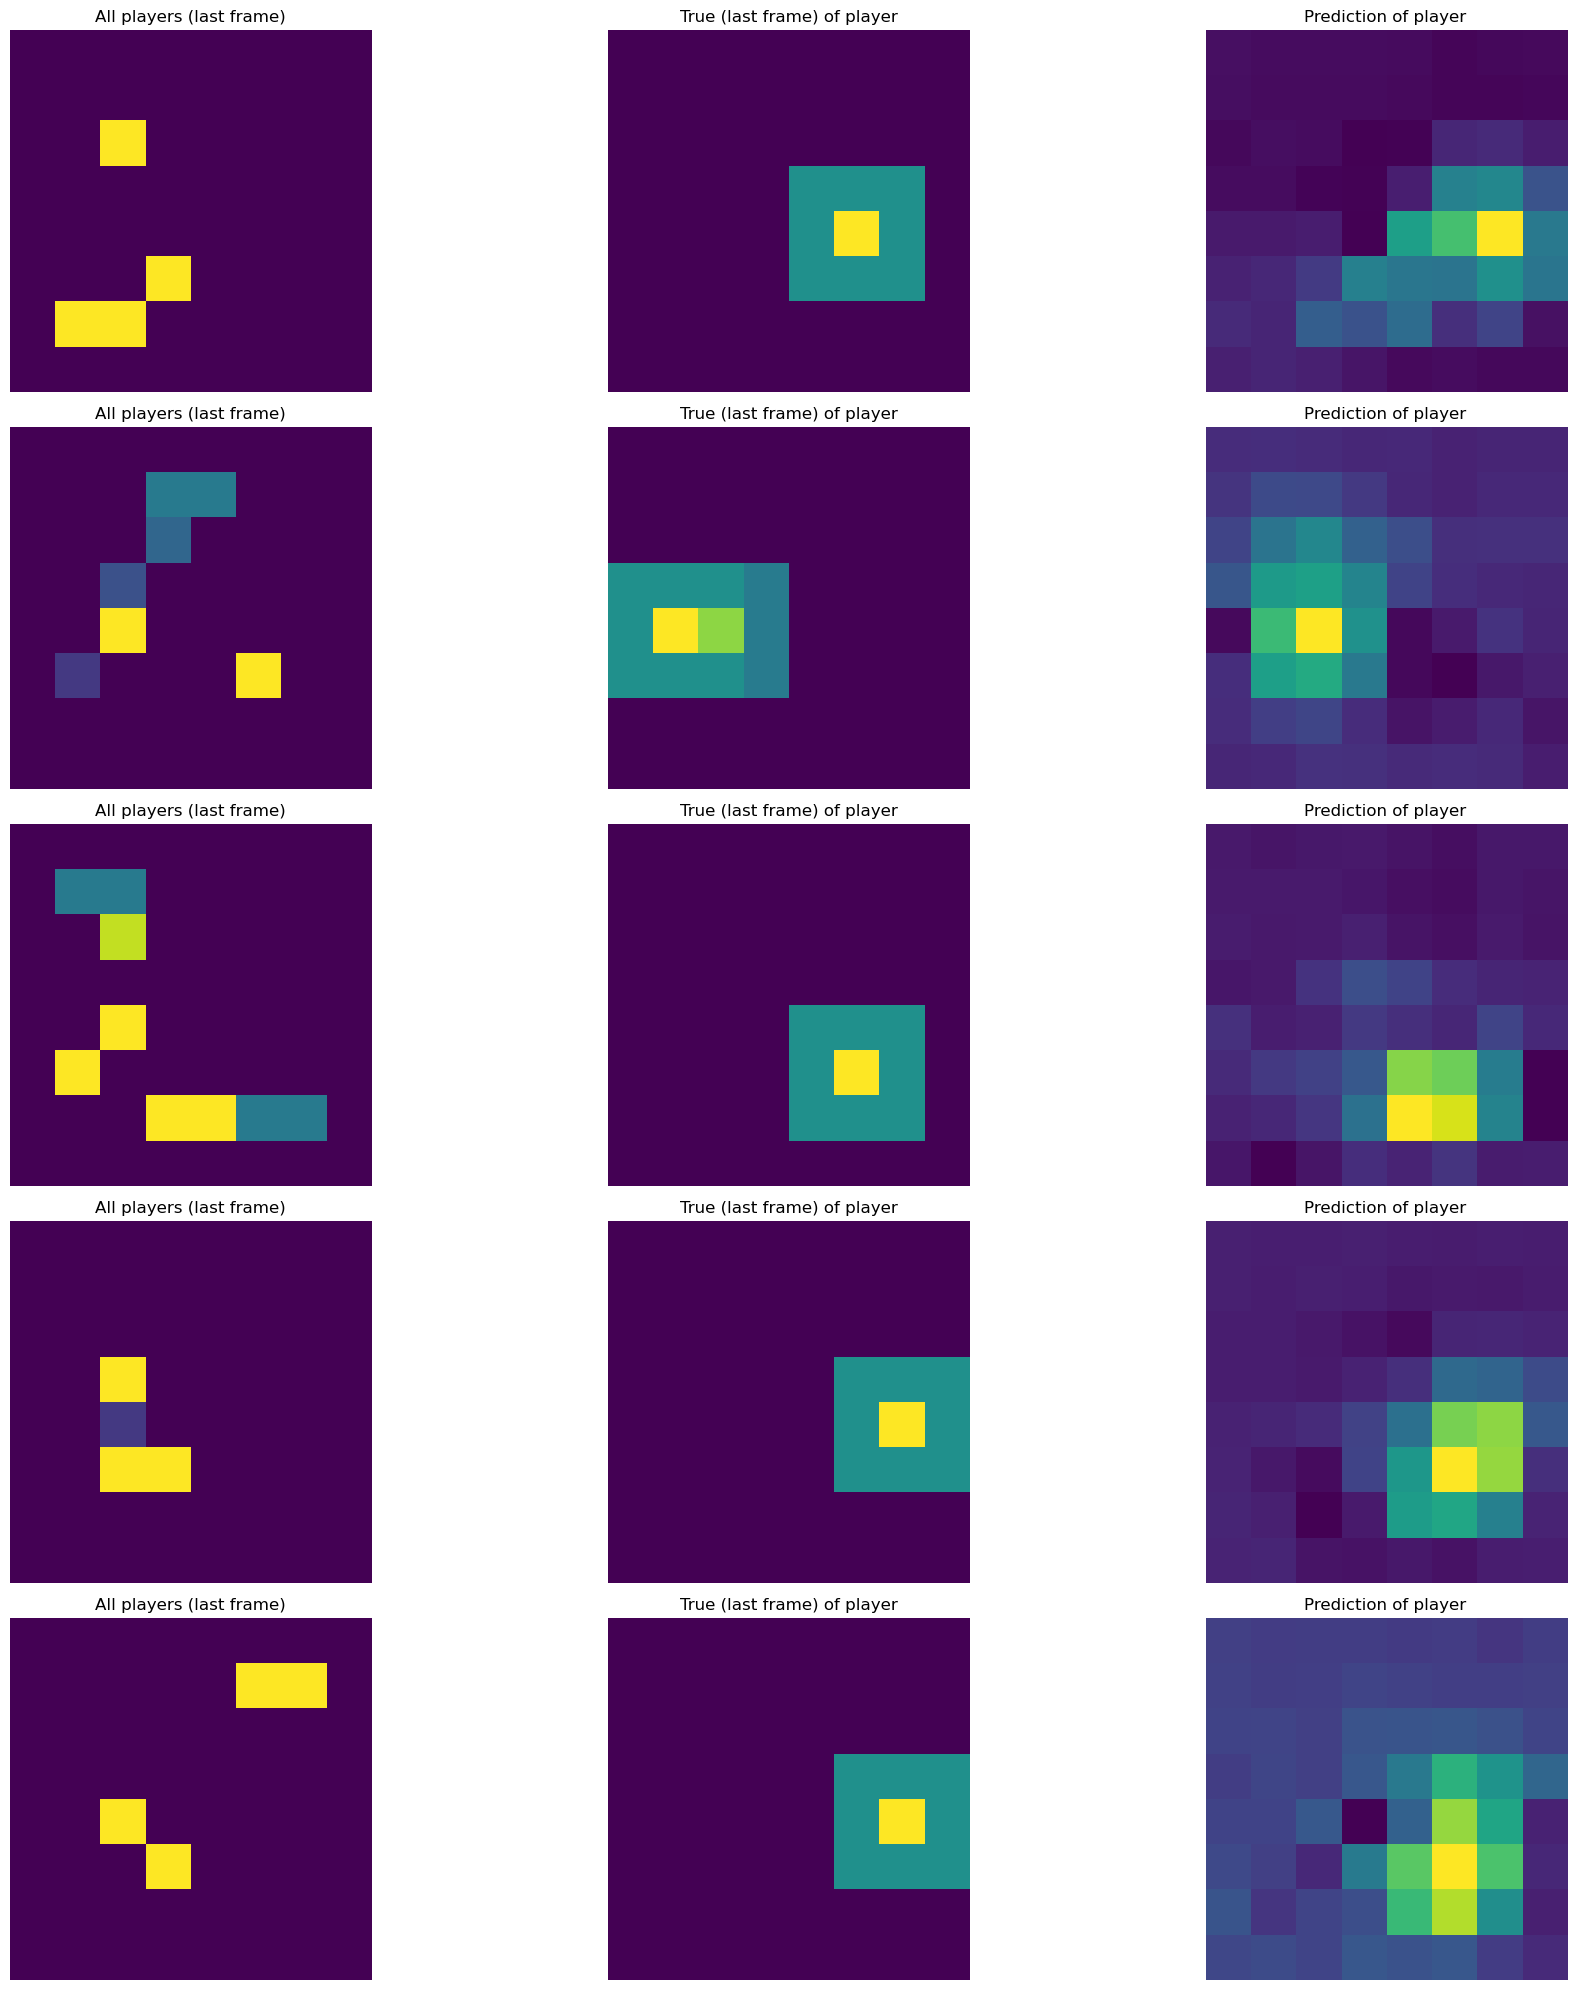

MODELO model2 - ESCENA Scene3
Epoch 1/50
81/81 [==============================] - 17s 184ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1006 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.0889
Epoch 2/50
81/81 [==============================] - 14s 173ms/step - loss: 0.0275 - mse: 0.0275 - mae: 0.0944 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.0893
Epoch 3/50
81/81 [==============================] - 14s 176ms/step - loss: 0.0257 - mse: 0.0257 - mae: 0.0901 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.0933
Epoch 4/50
81/81 [==============================] - 14s 175ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.0873 - val_loss: 0.0227 - val_mse: 0.0227 - val_mae: 0.0846
Epoch 5/50
81/81 [==============================] - 14s 176ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0843 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.0885
Epoch 6/50
81/81 [==============================] - 14s 174ms/step - loss: 0.0220 - mse: 0.0220 - mae: 0.0820 - val_loss: 0.0243 - val_mse: 0.024

9/9 [==============================] - 1s 72ms/step


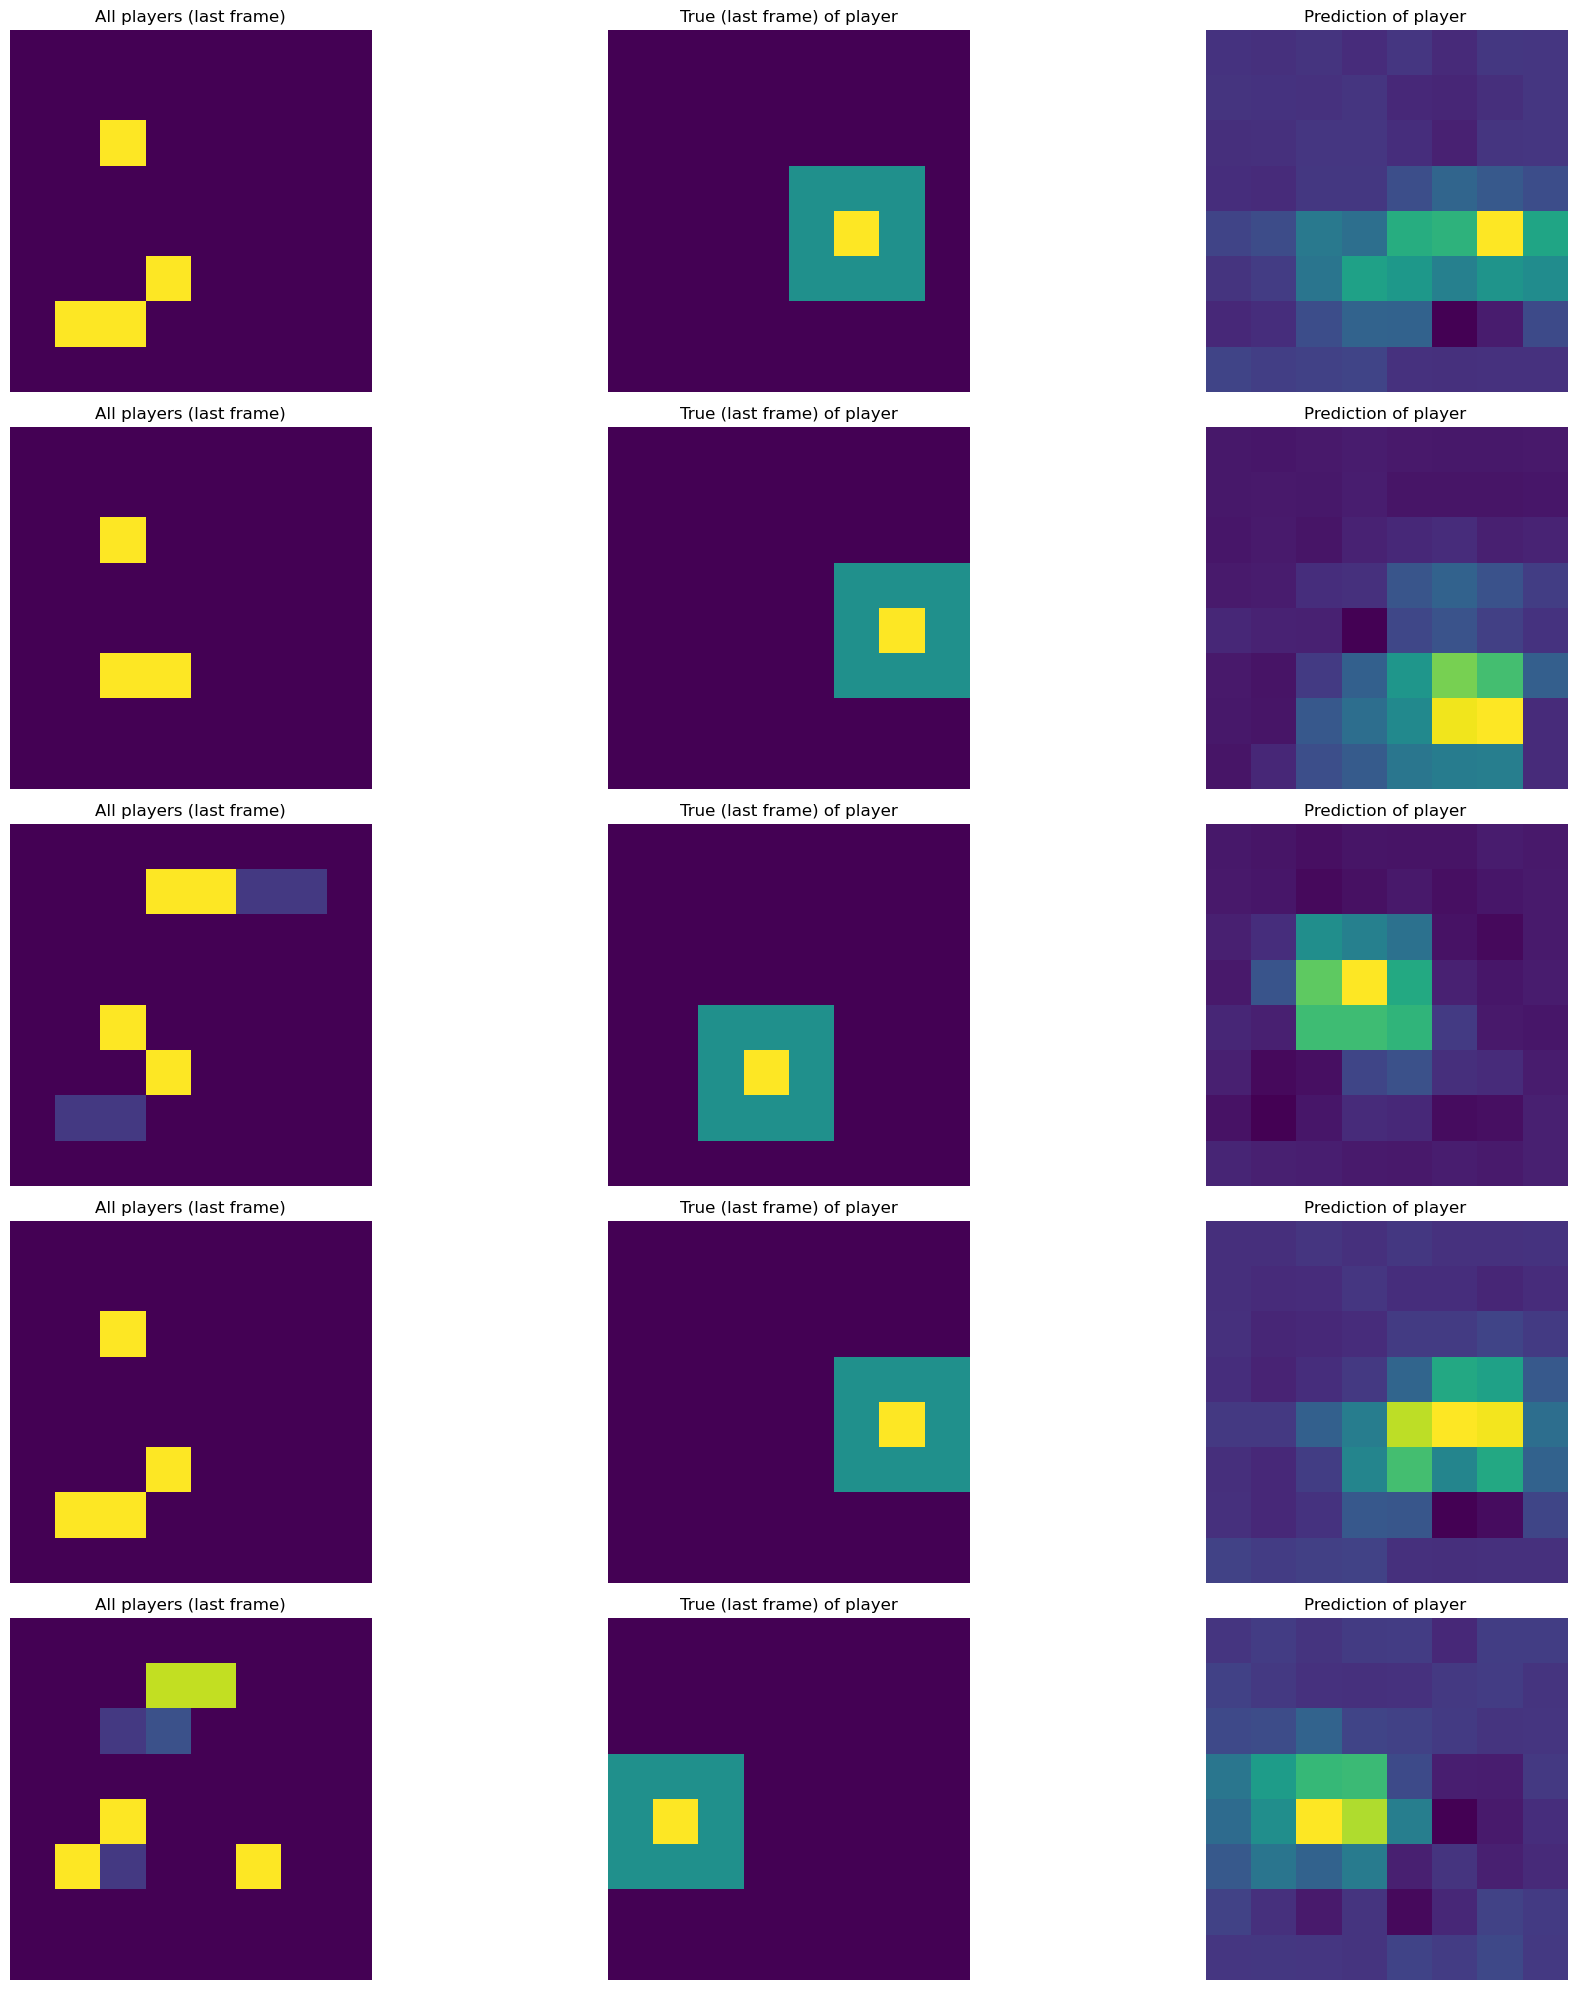

MODELO transf1 - ESCENA Scene3
Epoch 1/50
81/81 [==============================] - 136s 2s/step - loss: 0.0334 - mse: 0.0334 - mae: 0.1119 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.0912
Epoch 2/50
81/81 [==============================] - 135s 2s/step - loss: 0.0277 - mse: 0.0277 - mae: 0.0982 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.0863
Epoch 3/50
81/81 [==============================] - 136s 2s/step - loss: 0.0257 - mse: 0.0257 - mae: 0.0932 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.0854
Epoch 4/50
81/81 [==============================] - 136s 2s/step - loss: 0.0243 - mse: 0.0243 - mae: 0.0895 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.0907
Epoch 5/50
81/81 [==============================] - 136s 2s/step - loss: 0.0234 - mse: 0.0234 - mae: 0.0873 - val_loss: 0.0260 - val_mse: 0.0260 - val_mae: 0.0940
Epoch 6/50
81/81 [==============================] - 136s 2s/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0852 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae

9/9 [==============================] - 10s 1s/step


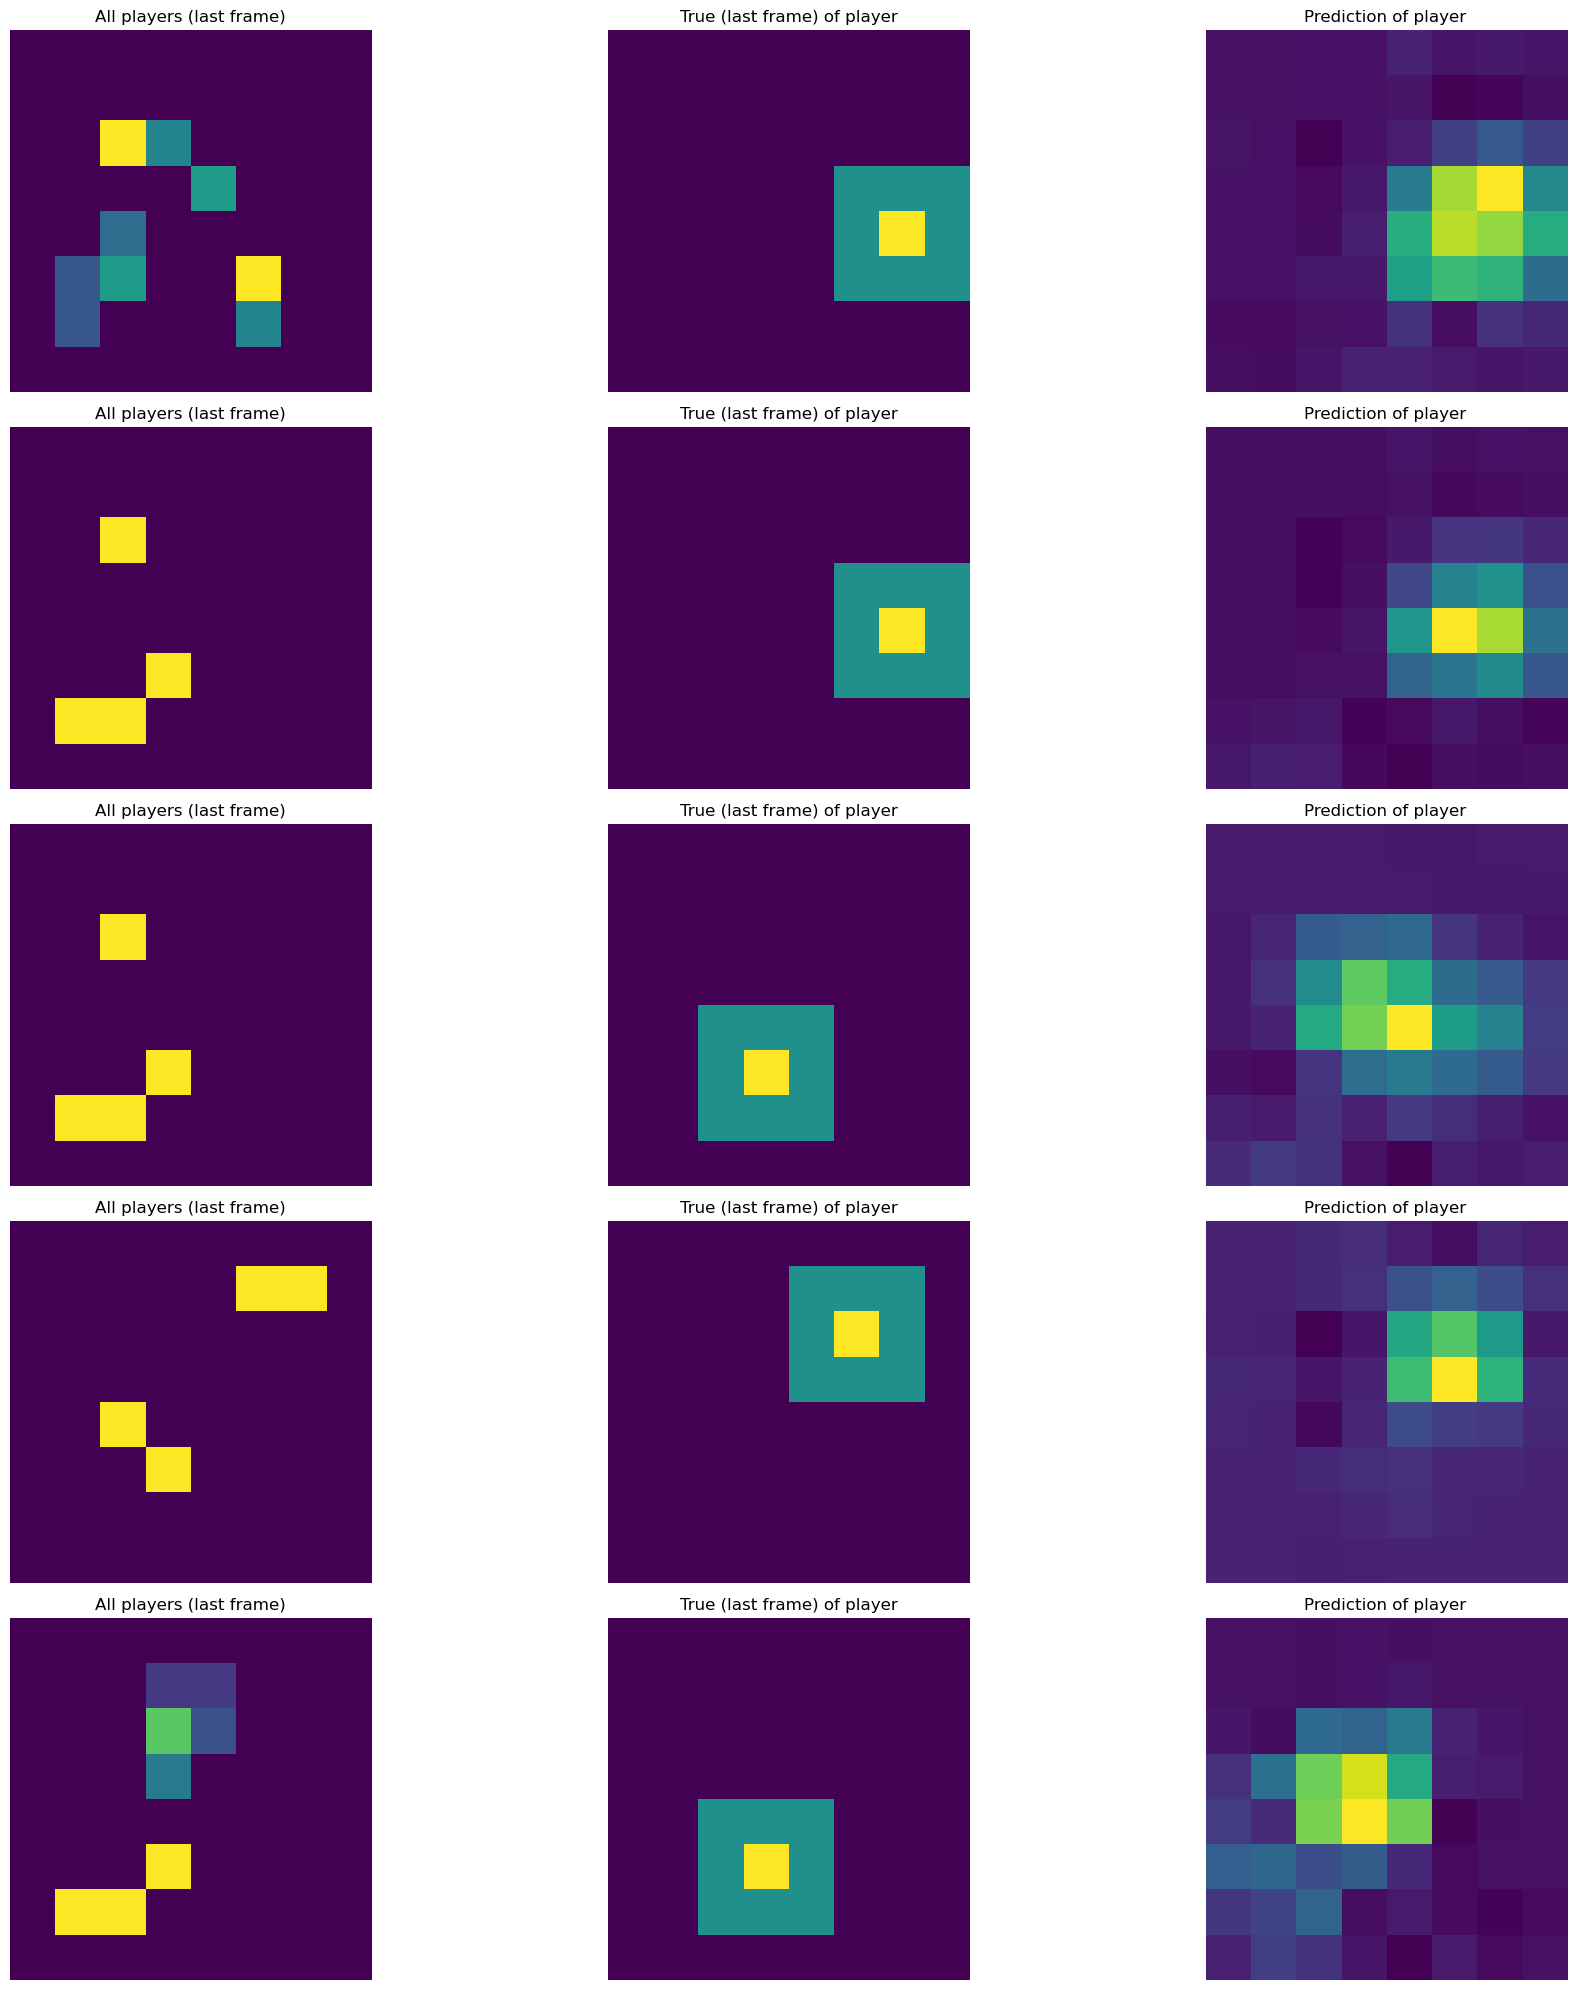

MODELO model0 - ESCENA Scene4
Epoch 1/50
74/74 [==============================] - 19s 194ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1034 - val_loss: 0.0304 - val_mse: 0.0304 - val_mae: 0.1053
Epoch 2/50
74/74 [==============================] - 14s 184ms/step - loss: 0.0306 - mse: 0.0306 - mae: 0.1033 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1054
Epoch 3/50
74/74 [==============================] - 14s 183ms/step - loss: 0.0301 - mse: 0.0301 - mae: 0.1022 - val_loss: 0.0294 - val_mse: 0.0294 - val_mae: 0.1022
Epoch 4/50
74/74 [==============================] - 13s 181ms/step - loss: 0.0293 - mse: 0.0293 - mae: 0.1010 - val_loss: 0.0291 - val_mse: 0.0291 - val_mae: 0.0973
Epoch 5/50
74/74 [==============================] - 13s 181ms/step - loss: 0.0287 - mse: 0.0287 - mae: 0.0979 - val_loss: 0.0305 - val_mse: 0.0305 - val_mae: 0.0928
Epoch 6/50
74/74 [==============================] - 13s 181ms/step - loss: 0.0281 - mse: 0.0281 - mae: 0.0971 - val_loss: 0.0297 - val_mse: 0.029

12/12 [==============================] - 2s 80ms/step


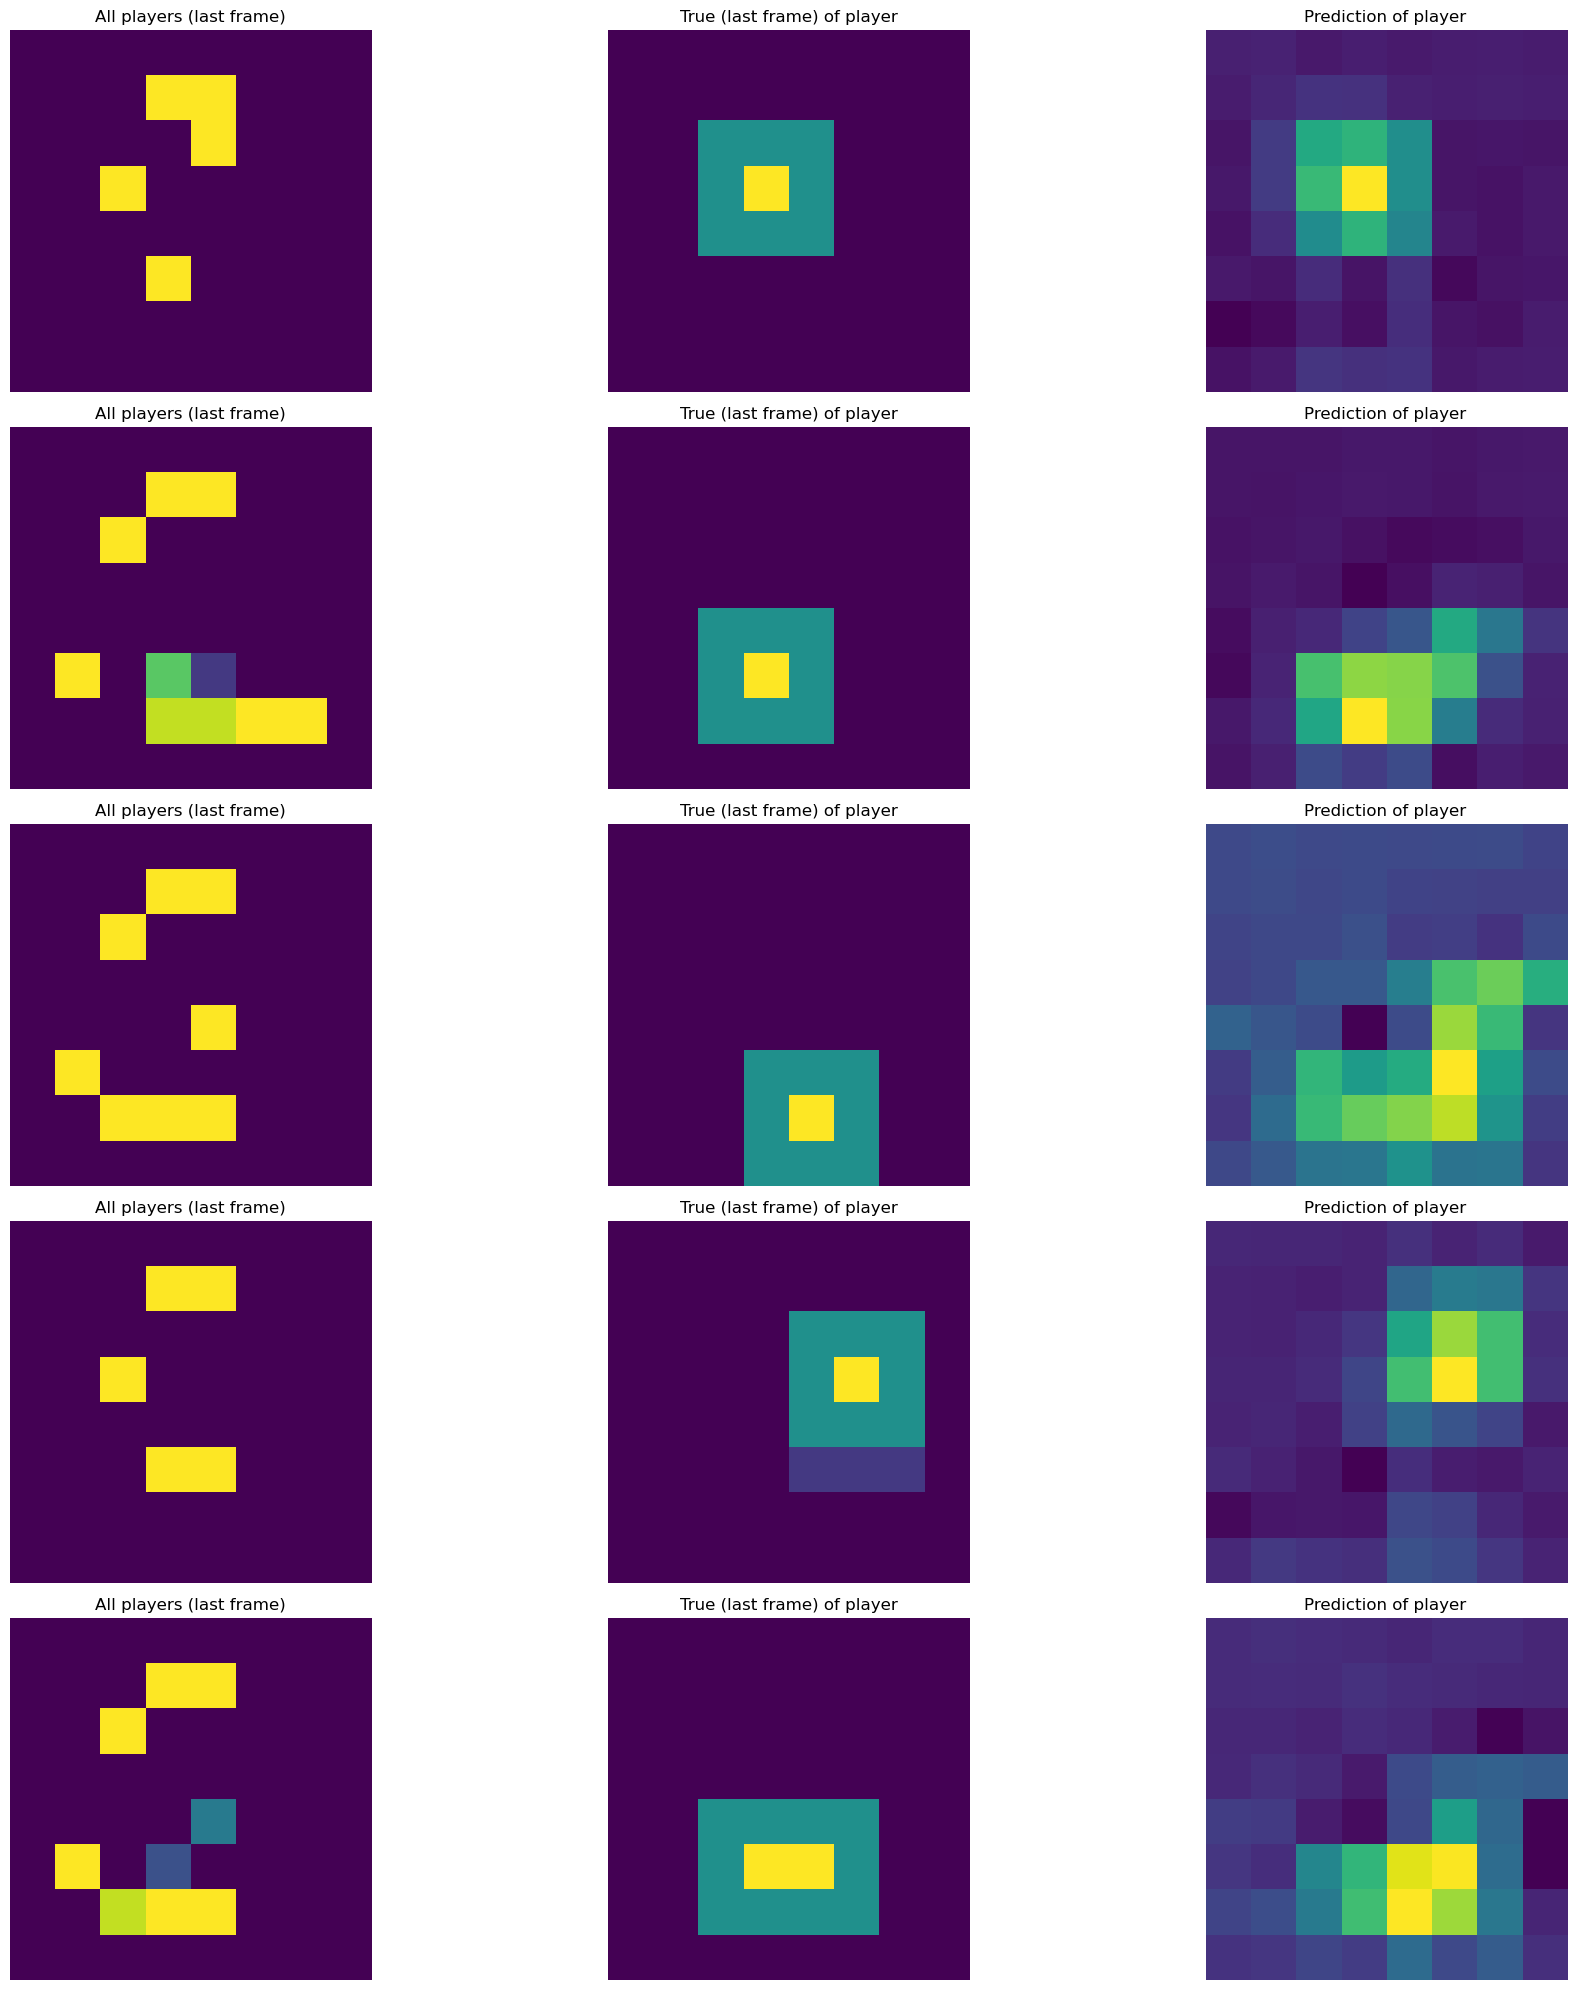

MODELO model1 - ESCENA Scene4
Epoch 1/50
74/74 [==============================] - 10s 118ms/step - loss: 0.0307 - mse: 0.0307 - mae: 0.0989 - val_loss: 0.0285 - val_mse: 0.0285 - val_mae: 0.0978
Epoch 2/50
74/74 [==============================] - 8s 111ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.0944 - val_loss: 0.0290 - val_mse: 0.0290 - val_mae: 0.0932
Epoch 3/50
74/74 [==============================] - 8s 110ms/step - loss: 0.0259 - mse: 0.0259 - mae: 0.0902 - val_loss: 0.0273 - val_mse: 0.0273 - val_mae: 0.0909
Epoch 4/50
74/74 [==============================] - 8s 110ms/step - loss: 0.0244 - mse: 0.0244 - mae: 0.0879 - val_loss: 0.0280 - val_mse: 0.0280 - val_mae: 0.0920
Epoch 5/50
74/74 [==============================] - 8s 111ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.0857 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.0907
Epoch 6/50
74/74 [==============================] - 8s 111ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.0836 - val_loss: 0.0281 - val_mse: 0.0281 - v

12/12 [==============================] - 1s 26ms/step


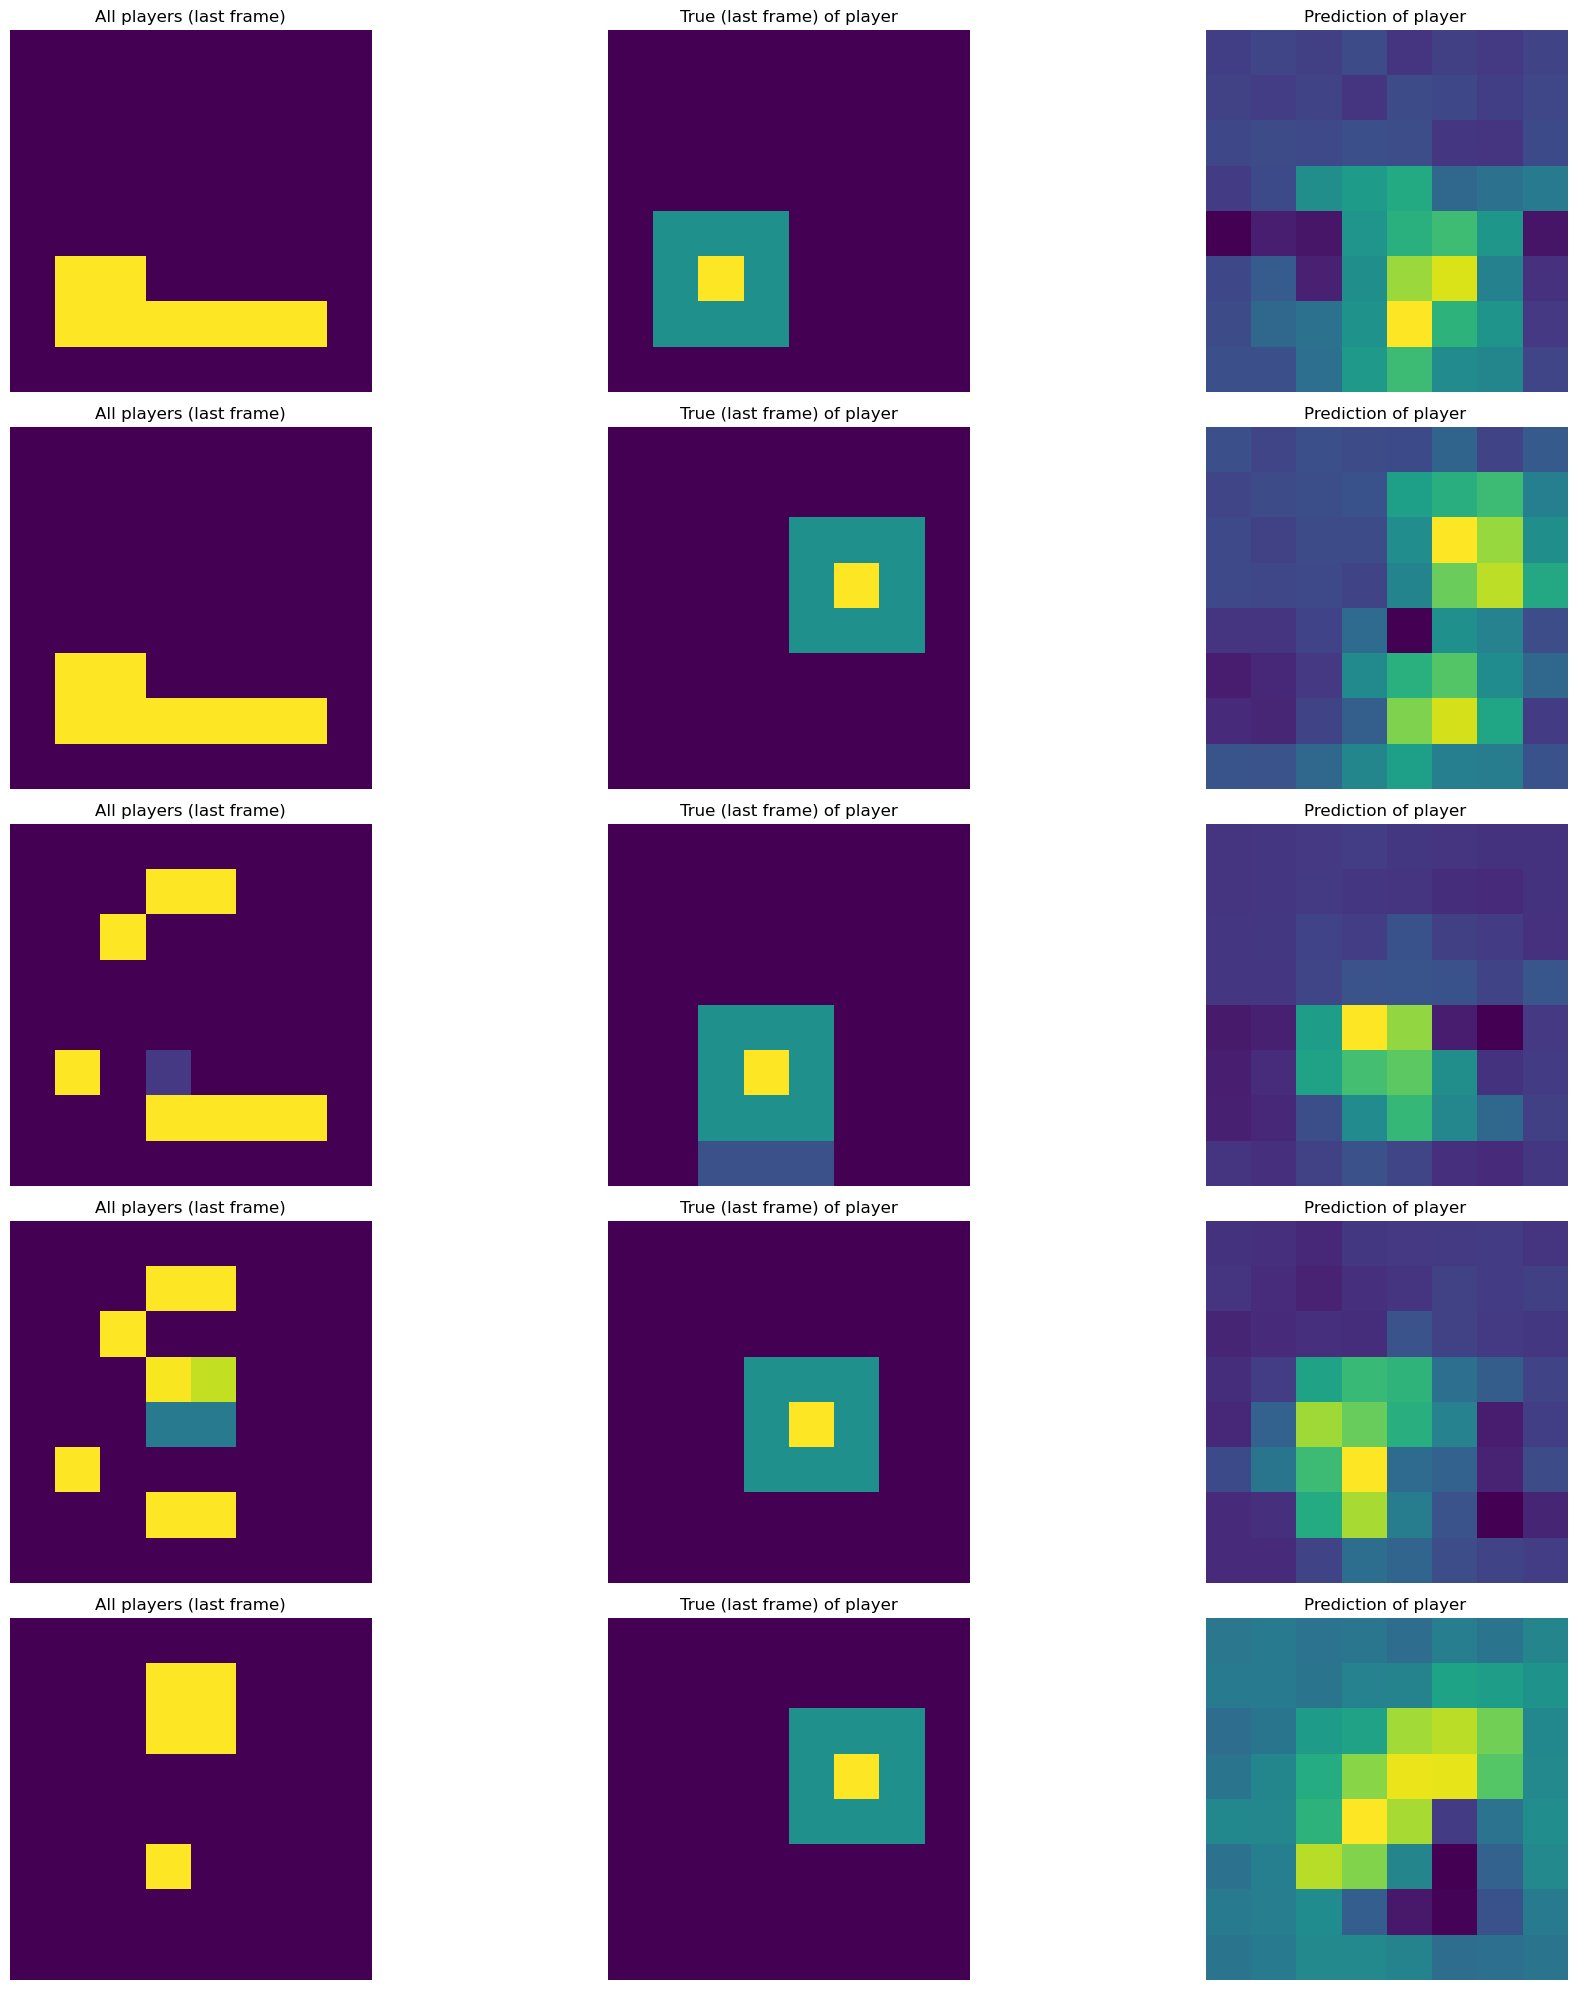

MODELO model2 - ESCENA Scene4
Epoch 1/50
74/74 [==============================] - 17s 200ms/step - loss: 0.0310 - mse: 0.0310 - mae: 0.0994 - val_loss: 0.0301 - val_mse: 0.0301 - val_mae: 0.0936
Epoch 2/50
74/74 [==============================] - 14s 187ms/step - loss: 0.0277 - mse: 0.0277 - mae: 0.0953 - val_loss: 0.0284 - val_mse: 0.0284 - val_mae: 0.0929
Epoch 3/50
74/74 [==============================] - 14s 187ms/step - loss: 0.0260 - mse: 0.0260 - mae: 0.0901 - val_loss: 0.0267 - val_mse: 0.0267 - val_mae: 0.0940
Epoch 4/50
74/74 [==============================] - 14s 188ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.0884 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.0890
Epoch 5/50
74/74 [==============================] - 14s 188ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.0856 - val_loss: 0.0264 - val_mse: 0.0264 - val_mae: 0.0885
Epoch 6/50
74/74 [==============================] - 14s 187ms/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0832 - val_loss: 0.0273 - val_mse: 0.027

12/12 [==============================] - 2s 85ms/step


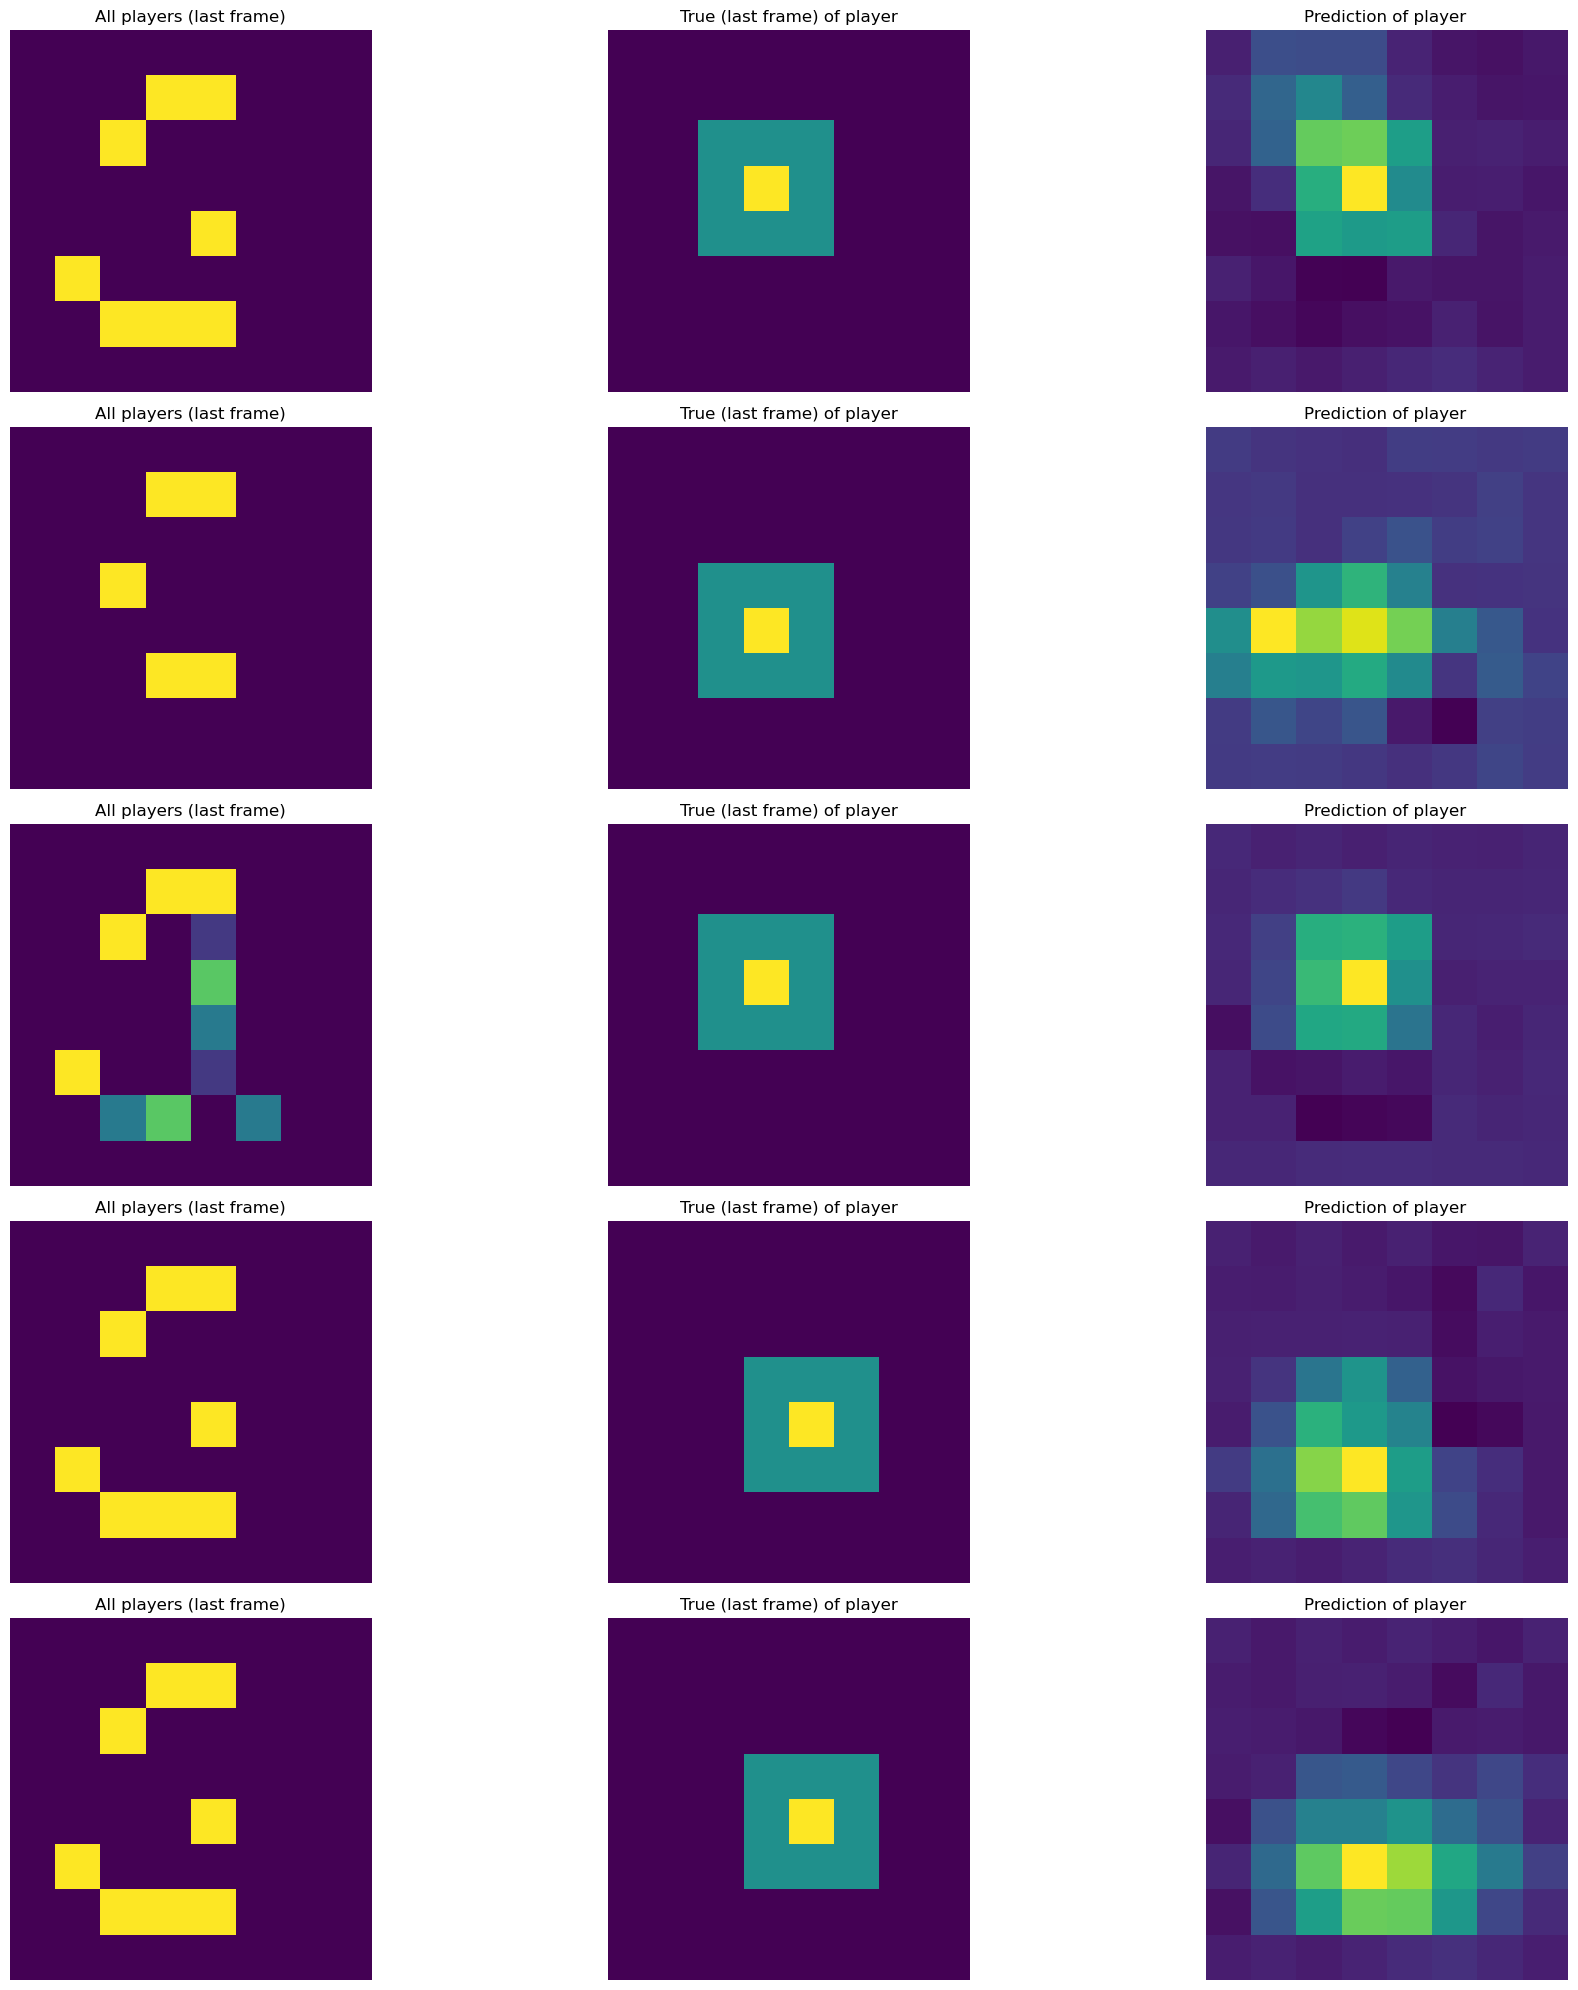

MODELO transf1 - ESCENA Scene4
Epoch 1/50
74/74 [==============================] - 131s 2s/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1109 - val_loss: 0.0315 - val_mse: 0.0315 - val_mae: 0.0967
Epoch 2/50
74/74 [==============================] - 128s 2s/step - loss: 0.0285 - mse: 0.0285 - mae: 0.0992 - val_loss: 0.0286 - val_mse: 0.0286 - val_mae: 0.0933
Epoch 3/50
74/74 [==============================] - 130s 2s/step - loss: 0.0271 - mse: 0.0271 - mae: 0.0950 - val_loss: 0.0265 - val_mse: 0.0265 - val_mae: 0.0931
Epoch 4/50
74/74 [==============================] - 130s 2s/step - loss: 0.0254 - mse: 0.0254 - mae: 0.0913 - val_loss: 0.0281 - val_mse: 0.0281 - val_mae: 0.0873
Epoch 5/50
74/74 [==============================] - 130s 2s/step - loss: 0.0245 - mse: 0.0245 - mae: 0.0885 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.0886
Epoch 6/50
74/74 [==============================] - 130s 2s/step - loss: 0.0237 - mse: 0.0237 - mae: 0.0860 - val_loss: 0.0266 - val_mse: 0.0266 - val_mae

12/12 [==============================] - 14s 1s/step


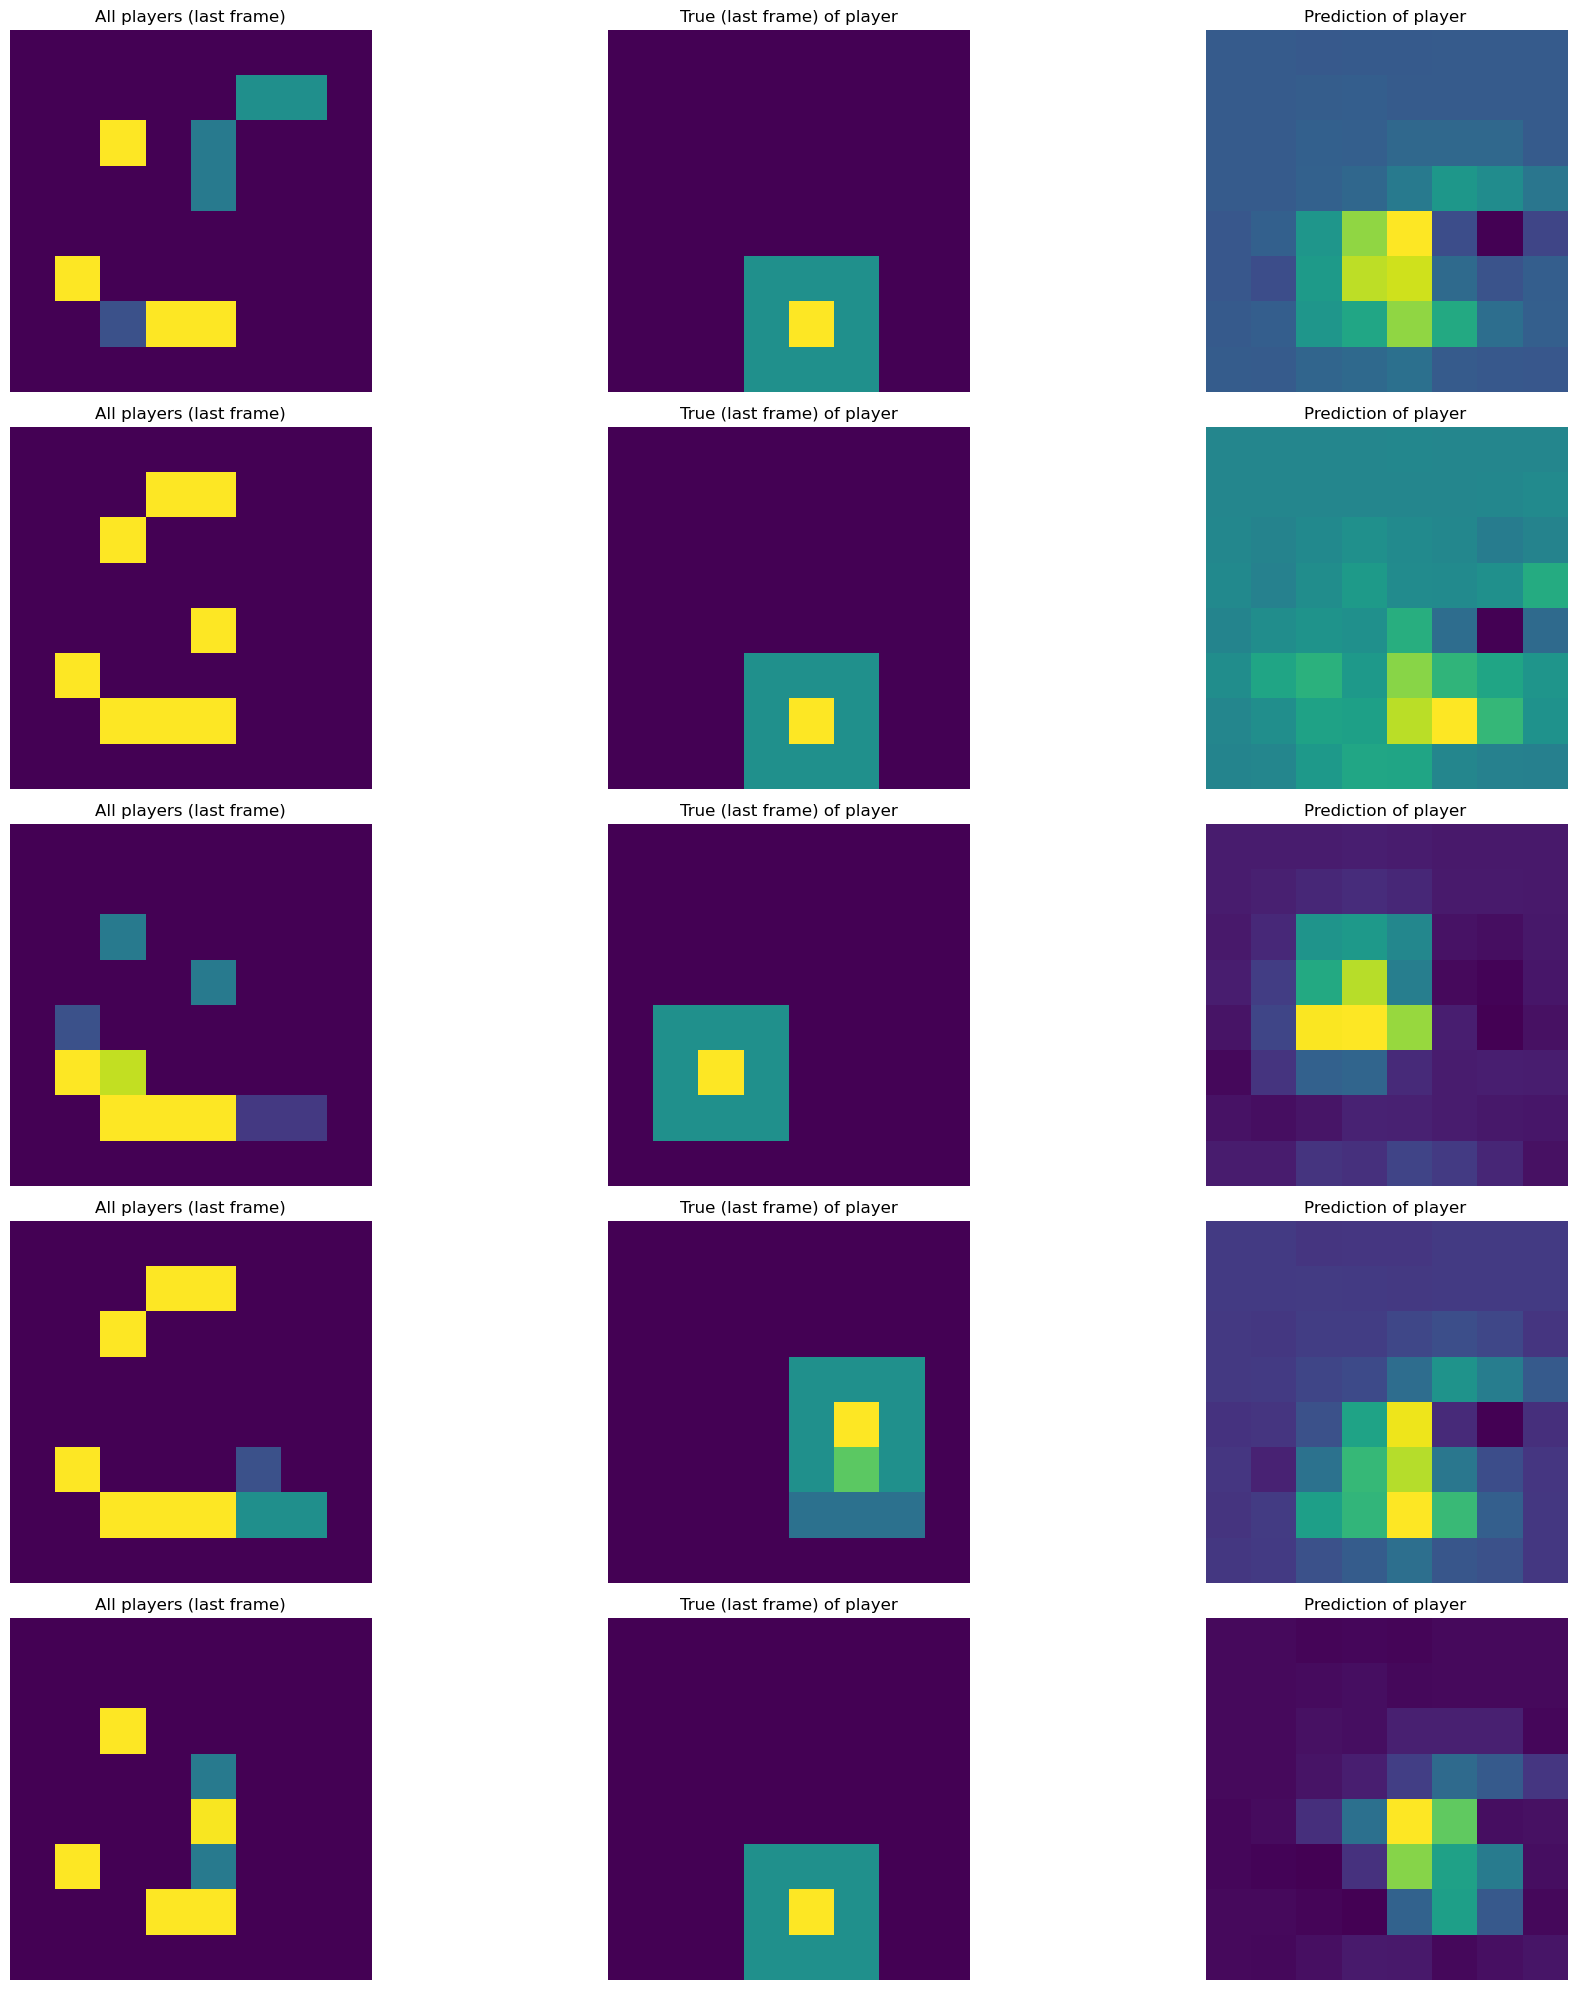

Resultados por escena:
Escena Scene1:
Modelo model0 - MSE: 0.0278, MAE: 0.0884, Tiempo: 98.73s
Modelo model1 - MSE: 0.0276, MAE: 0.0892, Tiempo: 61.65s
Modelo model2 - MSE: 0.0270, MAE: 0.0854, Tiempo: 152.01s
Modelo transf1 - MSE: 0.0266, MAE: 0.0767, Tiempo: 4650.43s

Escena Scene2:
Modelo model0 - MSE: 0.0272, MAE: 0.0875, Tiempo: 354.98s
Modelo model1 - MSE: 0.0325, MAE: 0.0994, Tiempo: 305.83s
Modelo model2 - MSE: 0.0296, MAE: 0.0924, Tiempo: 588.00s
Modelo transf1 - MSE: 0.0311, MAE: 0.0885, Tiempo: 5302.01s

Escena Scene3:
Modelo model0 - MSE: 0.0205, MAE: 0.0742, Tiempo: 691.71s
Modelo model1 - MSE: 0.0237, MAE: 0.0821, Tiempo: 455.48s
Modelo model2 - MSE: 0.0252, MAE: 0.0859, Tiempo: 719.22s
Modelo transf1 - MSE: 0.0240, MAE: 0.0755, Tiempo: 6790.16s

Escena Scene4:
Modelo model0 - MSE: 0.0264, MAE: 0.0840, Tiempo: 684.07s
Modelo model1 - MSE: 0.0268, MAE: 0.0860, Tiempo: 418.71s
Modelo model2 - MSE: 0.0254, MAE: 0.0832, Tiempo: 705.81s
Modelo transf1 - MSE: 0.0256, MAE: 0.079

In [19]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

# Assuming you have a function to calculate binary cross-entropy (log loss)
def binary_cross_entropy(y_true, y_pred):
    """
    Calcula la Binary Cross-Entropy (BCE) asegurando que y_true y y_pred sean válidos.
    Soporta etiquetas no binarias (soft labels).
    """
    # Asegurar que los valores de y_pred estén entre 0 y 1
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Asegurar que los valores de y_true estén en el rango [0,1]
    y_true = np.clip(y_true, 0, 1)

    # Fórmula BCE: -(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    bce = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return np.mean(bce)

np.random.seed(42)

# Lista de identificadores de modelo
model_ids = ["model0","model1","model2","transf1"] 


# Estructuras para almacenar resultados y tiempos de ejecución
mse_results = {model_id: [] for model_id in model_ids}
bce_results = {model_id: [] for model_id in model_ids} #binary cross entropy
mae_results = {model_id: [] for model_id in model_ids}
training_times = {model_id: [] for model_id in model_ids}
total_execution_time = {model_id: 0 for model_id in model_ids}

print(np.unique(S))

escenas_seleccionadas=np.unique(S)
#escenas_seleccionadas=escenas_seleccionadas[3:]
print("Para esta ejecución se han seleccionada las escenas: ")
print(escenas_seleccionadas)

for ixs, sc in enumerate(escenas_seleccionadas):
    # Índices para entrenamiento y prueba
    train_indices = np.where(S != sc)[0]
    test_indices = np.where(S == sc)[0]
    np.random.shuffle(train_indices)

    XYT_train = XYT[train_indices]
    rssiT_train = rssiT[train_indices]
    YT_train = YT[train_indices]

    XYT_test = XYT[test_indices]
    rssiT_test = rssiT[test_indices]
    YT_test = YT[test_indices]
    
    for model_id in model_ids:
        print(f"MODELO {model_id} - ESCENA {sc}")
        
        model = load_model(f"{model_id}.h5")

        start_time = time.time()

        history = model.fit([XYT_train, rssiT_train], YT_train,
                                  batch_size=16,
                                  validation_data=([XYT_test, rssiT_test], YT_test),
                                  epochs=50)
        end_time = time.time()
        training_time = end_time - start_time
        
        YT_prediction = model.predict([XYT_test, rssiT_test])

        plottingRandom(XYT_test, YT_test, YT_prediction)

        mse = mean_squared_error(YT_test.flatten(), YT_prediction.flatten())
        mae = mean_absolute_error(YT_test.flatten(), YT_prediction.flatten())
        bce = binary_cross_entropy(YT_test.flatten(), YT_prediction.flatten())

        mse_results[model_id].append(mse)
        mae_results[model_id].append(mae)
        bce_results[model_id].append(bce)
        
       
        training_times[model_id].append(training_time)
        total_execution_time[model_id] += training_time

# Calculando promedios y mostrando resultados

print("Resultados por escena:")
for i, sc in enumerate(escenas_seleccionadas):
    print(f"Escena {sc}:")
    for model_id in model_ids:
        print(f"Modelo {model_id} - MSE: {mse_results[model_id][i]:.4f}, MAE: {mae_results[model_id][i]:.4f}, Tiempo: {training_times[model_id][i]:.2f}s")
    print("")
    
print("RESUMEN RESULTADOS:")
for model_id in model_ids:
    average_mse = np.mean(mse_results[model_id])
    average_mae = np.mean(mae_results[model_id])
    average_bce = np.mean(bce_results[model_id])
    print(f"Modelo {model_id}:")
    print(f"Tiempo de ejecución total: {total_execution_time[model_id]:.2f} segundos")
    print(f"MSE promedio: {average_mse:.4f}")
    print(f"MAE promedio: {average_mae:.4f}\n")
    print(f"BCE promedio: {average_bce:.4f}\n")


In [20]:
ts.sort()
print(ts)

[1710619575, 1710619576, 1710619577, 1710619578, 1710619579, 1710619580, 1710619581, 1710619582, 1710619583, 1710619584, 1710619585, 1710619586, 1710619587, 1710619588, 1710619589, 1710619590, 1710619591, 1710619592, 1710619593, 1710619594, 1710619595, 1710619596, 1710619597, 1710619598, 1710619599, 1710619600, 1710619601, 1710619602, 1710619603, 1710619604, 1710619605, 1710619606, 1710619607, 1710619608, 1710619609, 1710619610, 1710619611, 1710619612, 1710619613, 1710619614, 1710619615, 1710619616, 1710619617, 1710619618, 1710619619, 1710619620, 1710619621, 1710619622, 1710619623, 1710619624, 1710619625, 1710619626, 1710619627, 1710619628, 1710619629, 1710619630, 1710619631, 1710619632, 1710619633, 1710619634, 1710619635, 1710619636, 1710619637, 1710619638, 1710619639, 1710619640, 1710619641, 1710619642, 1710619643, 1710619644, 1710619645, 1710619646, 1710619647, 1710619648, 1710619649, 1710619650, 1710619651, 1710619652, 1710619653, 1710619654, 1710619655, 1710619656, 1710619657, 171